model load

In [39]:
import torch
checkpoint = torch.load('/Users/sonhyeongjin/Desktop/project/kaist/exp/model1_stage1.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])


# model 1 data load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

# S&P 500 섹터 지수 심볼 리스트
symbols = [   
    "^GSPC", # S&P 500
    
]


# 데이터 다운로드
data = yf.download(symbols, start="1999-01-01", end="2022-07-17")#interval='1wk'

[*********************100%%**********************]  1 of 1 completed


In [3]:
daily_data = data['Adj Close']
daily_return = daily_data.pct_change().dropna()

(array([1.000e+00, 6.000e+00, 1.300e+01, 1.260e+02, 1.961e+03, 3.616e+03,
        1.730e+02, 1.800e+01, 3.000e+00, 4.000e+00]),
 array([-0.11984055, -0.09627646, -0.07271237, -0.04914828, -0.02558418,
        -0.00202009,  0.021544  ,  0.04510809,  0.06867219,  0.09223628,
         0.11580037]),
 <BarContainer object of 10 artists>)

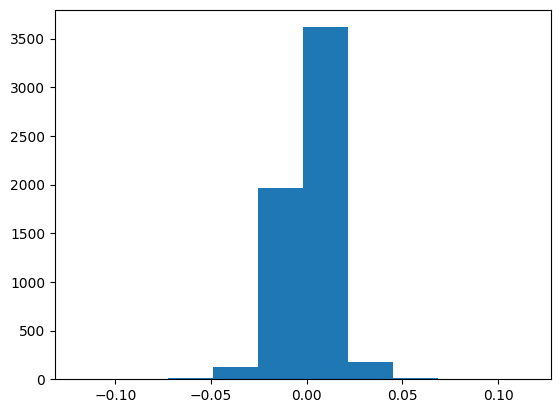

In [4]:
plt.hist(daily_return)

In [5]:
data_2 = data

In [6]:
data_2

Open         High          Low        Close    Adj Close  \
Date                                                                          
1999-01-04  1229.229980  1248.810059  1219.099976  1228.099976  1228.099976   
1999-01-05  1228.099976  1246.109985  1228.099976  1244.780029  1244.780029   
1999-01-06  1244.780029  1272.500000  1244.780029  1272.339966  1272.339966   
1999-01-07  1272.339966  1272.339966  1257.680054  1269.729980  1269.729980   
1999-01-08  1269.729980  1278.239990  1261.819946  1275.089966  1275.089966   
...                 ...          ...          ...          ...          ...   
2022-07-11  3880.939941  3880.939941  3847.219971  3854.429932  3854.429932   
2022-07-12  3851.949951  3873.409912  3802.360107  3818.800049  3818.800049   
2022-07-13  3779.669922  3829.439941  3759.070068  3801.780029  3801.780029   
2022-07-14  3763.989990  3796.409912  3721.560059  3790.379883  3790.379883   
2022-07-15  3818.000000  3863.620117  3817.179932  3863.159912  3863.159912   

                Volume  
Date                    
1999-01-04   877000000  
1999-01-05   775000000  
1999-01-06   986900000  
1999-01-07   863000000  
1999-01-08   937800000  
...                ...  
2022-07-11  3423480000  
2022-07-12  3817210000  
2022-07-13  4109390000  
2022-07-14  4199690000  
2022-07-15  4143800000  

[5922 rows x 6 columns]

In [7]:
def adjust_values(value):
    # 값이 -10에서 10 사이의 범위를 넘어가는 경우를 고려하여 클리핑
    clipped_value = np.clip(value, -10, 10)
    # 0.1 간격으로 반올림
    adjusted_value = round(clipped_value * 100) / 100.0
    return adjusted_value

# 데이터프레임에 함수 적용
data = pd.DataFrame(daily_return*100)
data['adjusted_value'] = data['Adj Close'].apply(adjust_values)
data['squared_difference'] = (data['Adj Close'] - data['adjusted_value']) ** 2
data['Open'] = data_2['Open']
data['High'] = data_2['High']
data['Low'] = data_2['Low']
data['Volume'] = data_2['Volume']

In [8]:
data['squared_difference'].mean() #잔차 제곱이 12정도로 엄청크진 않다. 25년 데이터임 

0.0012000334560626326

In [9]:
data['Adj Close']

Date
1999-01-05    1.358200
1999-01-06    2.214041
1999-01-07   -0.205133
1999-01-08    0.422136
1999-01-11   -0.879151
                ...   
2022-07-11   -1.152746
2022-07-12   -0.924388
2022-07-13   -0.445690
2022-07-14   -0.299863
2022-07-15    1.920125
Name: Adj Close, Length: 5921, dtype: float64

In [10]:
data

Adj Close  adjusted_value  squared_difference         Open  \
Date                                                                     
1999-01-05   1.358200            1.36        3.240046e-06  1228.099976   
1999-01-06   2.214041            2.21        1.632729e-05  1244.780029   
1999-01-07  -0.205133           -0.21        2.369059e-05  1272.339966   
1999-01-08   0.422136            0.42        4.561824e-06  1269.729980   
1999-01-11  -0.879151           -0.88        7.215000e-07  1275.089966   
...               ...             ...                 ...          ...   
2022-07-11  -1.152746           -1.15        7.541297e-06  3880.939941   
2022-07-12  -0.924388           -0.92        1.925342e-05  3851.949951   
2022-07-13  -0.445690           -0.45        1.857393e-05  3779.669922   
2022-07-14  -0.299863           -0.30        1.866223e-08  3763.989990   
2022-07-15   1.920125            1.92        1.560899e-08  3818.000000   

                   High          Low      Volume  
Date                                              
1999-01-05  1246.109985  1228.099976   775000000  
1999-01-06  1272.500000  1244.780029   986900000  
1999-01-07  1272.339966  1257.680054   863000000  
1999-01-08  1278.239990  1261.819946   937800000  
1999-01-11  1276.219971  1253.339966   818000000  
...                 ...          ...         ...  
2022-07-11  3880.939941  3847.219971  3423480000  
2022-07-12  3873.409912  3802.360107  3817210000  
2022-07-13  3829.439941  3759.070068  4109390000  
2022-07-14  3796.409912  3721.560059  4199690000  
2022-07-15  3863.620117  3817.179932  4143800000  

[5921 rows x 7 columns]

In [11]:
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, ttest_ind
def calculate_moments(data):
    mean = np.mean(data)
    variance = np.var(data)
    skewness = skew(data)
    kurt = kurtosis(data)
    return mean, variance, skewness, kurt
def plot_histogram_with_moments_and_ttest(Train_value_list, Vaildationict_value_list):

    Train_moments = calculate_moments(Train_value_list)
    Vaildation_moments = calculate_moments(Vaildationict_value_list)
    print(f"Train Data Moments:")
    print(f"Mean: {Train_moments[0]}, Variance: {Train_moments[1]}, Skewness: {Train_moments[2]}, Kurtosis: {Train_moments[3]}")
    print("Test Data Moments:")
    print(f"Mean: {Vaildation_moments[0]}, Variance: {Vaildation_moments[1]}, Skewness: {Vaildation_moments[2]}, Kurtosis: {Vaildation_moments[3]}")

    # 히스토그램 플롯
    plt.figure(figsize=(14, 8))

    # 실제 값 히스토그램
    plt.hist(Train_value_list, bins=20, alpha=0.5, label='Train Data', color='blue')

    # 예측 값 히스토그램
    plt.hist(Vaildationict_value_list, bins=20, alpha=0.5, label='Test Data', color='orange')

    # 적률 텍스트 추가
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)

    # 실제 값 적률
    plt.text(0.05, 0.55, f"Train Data Moments:\nMean: {Train_moments[0]:.4f}\nVariance: {Train_moments[1]:.4f}\nSkewness: {Train_moments[2]:.4f}\nKurtosis: {Train_moments[3]:.4f}",
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=props)

    # 예측 값 적률
    plt.text(0.75, 0.55, f"Test Data Moments:\nMean: {Vaildation_moments[0]:.4f}\nVariance: {Vaildation_moments[1]:.4f}\nSkewness: {Vaildation_moments[2]:.4f}\nKurtosis: {Vaildation_moments[3]:.4f}",
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=props)

    # 두 분포의 평균 차이에 대한 t-검정
    t_stat, p_value = ttest_ind(Train_value_list, Vaildationict_value_list, equal_var=False)
    print(f"T-statistic: {t_stat}, P-value: {p_value}")

    # 가설 검증 결과 추가
    plt.text(0.05, 0.35, f"T-statistic: {t_stat:.4f}\nP-value: {p_value:.4f}",
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=props)

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Train Data and Test Data with Hypothesis Test')
    plt.legend()
    plt.show()

# 예시 사용법



## EDA 
데이터는 8:2로 스플릿 할 예정이다
## 전체적인 데이터 분포가 얼마나 비슷한가?
## 상승과 하강을 잘 맞추는가? -> 혼동행렬
## 전반적인 값이 비슷한가? -> MSE로 측정

In [12]:
past_data = data.iloc[:int(len(data)*0.8),:]['Adj Close']
post_data = data.iloc[int(len(data)*0.8):,:]['Adj Close']

Train Data Moments:
Mean: 0.023061881255211414, Variance: 1.4746721177144086, Skewness: -0.0058487754940726635, Kurtosis: 8.396336977482557
Test Data Moments:
Mean: 0.04309135899375285, Variance: 1.7985663078652598, Skewness: -0.6303709882119619, Kurtosis: 14.037452527836184
T-statistic: -0.4681496887420676, P-value: 0.6397375127430354


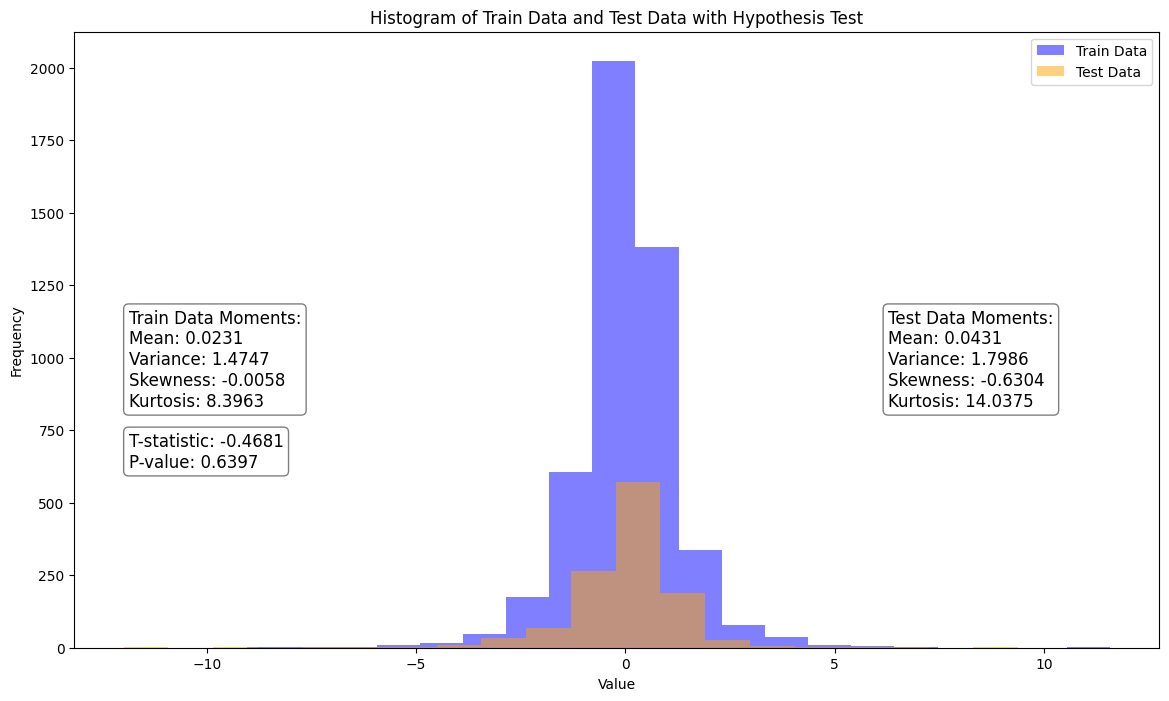

In [13]:
plot_histogram_with_moments_and_ttest(past_data,post_data)

위까지는 그냥 기간 데이터이고 아래부터는 학습데이터
학습데이터는 기간평균수익률을 사용함

In [14]:

Train_data = []
Validation_data = []

# 과거 20일 평균과 이후 5일 평균 계산
for i in range(len(past_data) - 60):
    
    Train_data.append(np.mean(past_data[i+40:i+45]))
for i in range(len(post_data) - 60):
    
    Validation_data.append(np.mean(post_data[i+40:i+45]))

Train_data = np.array(Train_data)
Validation_data = np.array(Validation_data)

Train Data Moments:
Mean: 0.022300520865030683, Variance: 0.2440874987683195, Skewness: -0.6177585610642108, Kurtosis: 6.234553425171649
Test Data Moments:
Mean: 0.03865535247340382, Variance: 0.2970614107601948, Skewness: -0.9723921883005742, Kurtosis: 6.974361849540443
T-statistic: -0.9193030718950946, P-value: 0.3580759017583175


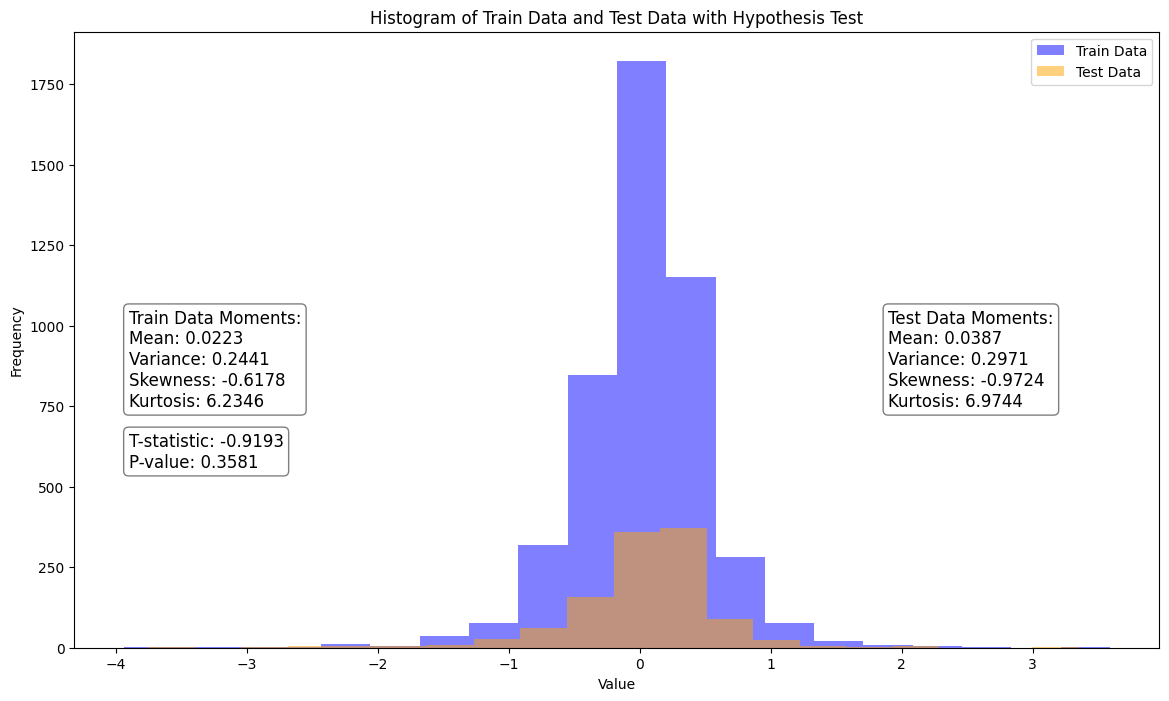

In [15]:
plot_histogram_with_moments_and_ttest(Train_data,Validation_data)

Test MSE: 0.2693
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     13.81
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           0.000204
Time:                        16:58:27   Log-Likelihood:                -3339.6
No. Observations:                4688   AIC:                             6683.
Df Residuals:                    4686   BIC:                             6696.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0258      0.007   

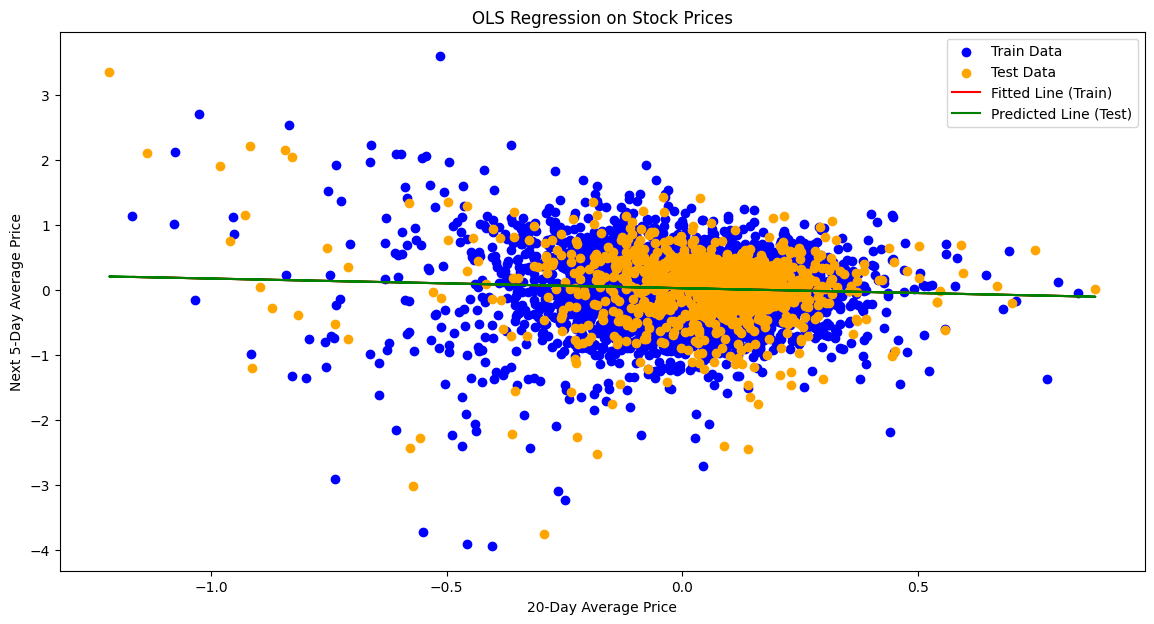

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 예제 데이터 생성 (실제 data_1['Adj Close'].values로 교체)

# 데이터 준비
prices = data['Adj Close'].values
X = []
Y = []

# 과거 20일 평균과 이후 5일 평균 계산
for i in range(len(prices) - 60):
    X.append(np.mean(prices[i:i+30]))
    Y.append(np.mean(prices[i+30:i+35]))

X = np.array(X)
Y = np.array(Y)

# 데이터 분할 (8:2 비율)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# 회귀 모델 학습
X_train = X_train.reshape(-1, 1)  # 2D 배열로 변환
X_train = sm.add_constant(X_train)  # 상수항 추가
model = sm.OLS(Y_train, X_train)
results = model.fit()

# 테스트 데이터에 대한 예측
X_test = X_test.reshape(-1, 1)  # 2D 배열로 변환
X_test = sm.add_constant(X_test)  # 상수항 추가
Y_pred = results.predict(X_test)

# MSE 계산
mse = mean_squared_error(Y_test, Y_pred)
print(f"Test MSE: {mse:.4f}")

# 회귀 결과 요약 출력
print(results.summary())

# 산점도 및 회귀선 플롯 그리기
plt.figure(figsize=(14, 7))

# 훈련 데이터 산점도
plt.scatter(X_train[:, 1], Y_train, label='Train Data', color='blue')
# 테스트 데이터 산점도
plt.scatter(X_test[:, 1], Y_test, label='Test Data', color='orange')

# 회귀선 시각화
plt.plot(X_train[:, 1], results.fittedvalues, label='Fitted Line (Train)', color='red')
plt.plot(X_test[:, 1], Y_pred, label='Predicted Line (Test)', color='green')

plt.xlabel('20-Day Average Price')
plt.ylabel('Next 5-Day Average Price')
plt.title('OLS Regression on Stock Prices')
plt.legend()
plt.show()

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import moment

# 예제 데이터프레임 생성 (여기서는 간단히 예제 데이터 생성)

prices = data['Adj Close'].values

X = []
Y = []

# 과거 40일 평균과 이후 20일 평균 계산
for i in range(len(prices) - 60):
    past_40_days = prices[i:i+40]
    next_20_days = prices[i+40:i+60]

    mean_40 = np.mean(past_40_days)
    mean_20 = np.mean(next_20_days)
    var_40 = moment(past_40_days, moment=2)
    skew_40 = moment(past_40_days, moment=3)
    kurt_40 = moment(past_40_days, moment=4)

    # 입력 데이터에 1차부터 4차 적률값 추가
    X.append([mean_40, var_40, skew_40, kurt_40])
    Y.append(mean_20)

X = np.array(X)
Y = np.array(Y)

# 데이터 분할 (8:2 비율)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


In [18]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# 예제 데이터 생성
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# ARIMAX 모델 학습
model = SARIMAX(Y_train, order=(1, 1, 1), exog=X_train)
model_fit = model.fit(disp=False)

# 예측
forecast = model_fit.get_forecast(steps=len(X_test), exog=X_test)
predictions = forecast.predicted_mean
conf_int = forecast.conf_int()

# 결과 시각화


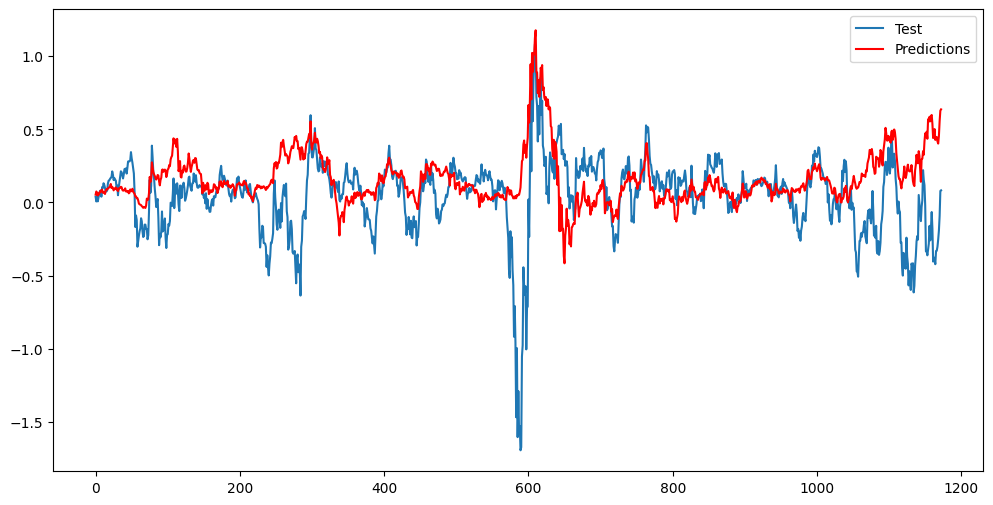

0.09726026862526961

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(Y_test, label='Test')
plt.plot(predictions, label='Predictions', color='red')
plt.legend()
plt.show()
mean_squared_error(predictions,Y_test)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from scipy.stats import moment
import ta
prices = data['Adj Close'].values

# TA 지표 추가
data['MA_20'] = ta.trend.sma_indicator(data['Adj Close'], window=20)
data['RSI'] = ta.momentum.rsi(data['Adj Close'], window=14)
data['MACD'] = ta.trend.macd(data['Adj Close'])

# 결측값 제거
data.dropna(inplace=True)

prices = data['Adj Close'].values
X = []
Y = []

# 과거 40일 평균과 이후 20일 평균 계산 및 1차부터 4차 적률값 계산
for i in range(len(prices) - 60):
    past_40_days = prices[i:i+40]
    next_20_days = prices[i+40:i+60]

    mean_40 = np.mean(past_40_days)
    mean_20 = np.mean(next_20_days)
    var_40 = moment(past_40_days, moment=2)
    skew_40 = moment(past_40_days, moment=3)
    kurt_40 = moment(past_40_days, moment=4)

    # 입력 데이터에 1차부터 4차 적률값 및 TA 지표 추가
    ma_20 = data['MA_20'].iloc[i+39]  # 20일 이동 평균
    rsi = data['RSI'].iloc[i+39]      # RSI
    macd = data['MACD'].iloc[i+39]    # MACD

    X.append([mean_40, var_40, skew_40, kurt_40, ma_20, rsi, macd])
    Y.append(mean_20)

X = np.array(X)
Y = np.array(Y)

# 데이터 분할 (8:2 비율)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# 데이터 전처리 (LSTM 입력 형식으로 변환)
# LSTM 입력 형식: [samples, time steps, features]
X_train_tensors = torch.Tensor(X_train).unsqueeze(1)  # [samples, time steps, features]
X_test_tensors = torch.Tensor(X_test).unsqueeze(1)
Y_train_tensors = torch.Tensor(Y_train).unsqueeze(1)  # [samples, 1]
Y_test_tensors = torch.Tensor(Y_test).unsqueeze(1)

# DataLoader 생성
train_dataset = TensorDataset(X_train_tensors, Y_train_tensors)
test_dataset = TensorDataset(X_test_tensors, Y_test_tensors)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, num_layers=2):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.init_weights()

    def init_weights(self):
        for name, param in self.lstm.named_parameters():
            if 'weight' in name:
                nn.init.xavier_normal_(param)
            elif 'bias' in name:
                nn.init.zeros_(param)
        nn.init.xavier_normal_(self.fc.weight)
        nn.init.zeros_(self.fc.bias)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        out, _ = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

# 모델 인스턴스 생성
input_dim = X_train.shape[1]
hidden_dim = 50
output_dim = 1
num_layers = 5

model = LSTMModel(input_dim, hidden_dim, output_dim, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습
epochs = 60
for epoch in range(epochs):
    model.train()
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = criterion(y_pred.squeeze(), y_batch.squeeze())
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}')

# 예측
model.eval()
with torch.no_grad():
    predictions = []
    for x_batch, _ in test_loader:
        y_pred = model(x_batch)
        predictions.append(y_pred.item())

# 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index[len(data) - len(Y_test):], Y_test, label='Actual')
plt.plot(data.index[len(data) - len(Y_test):], predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('LSTM Model Predictions vs Actual Prices')
plt.legend()
plt.show()

KeyboardInterrupt: 

In [18]:
mean_squared_error(Y_test,predictions)

0.09726026862526961

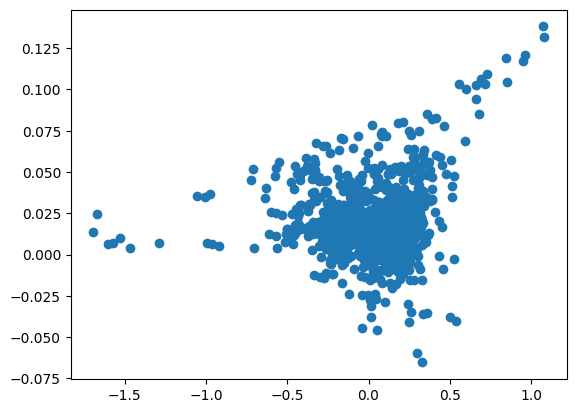

In [19]:
plt.scatter(Y_test, Y_pred)

## 상승과 하강을 비교하자

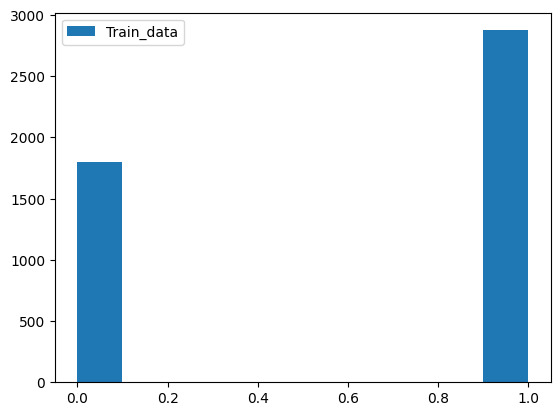

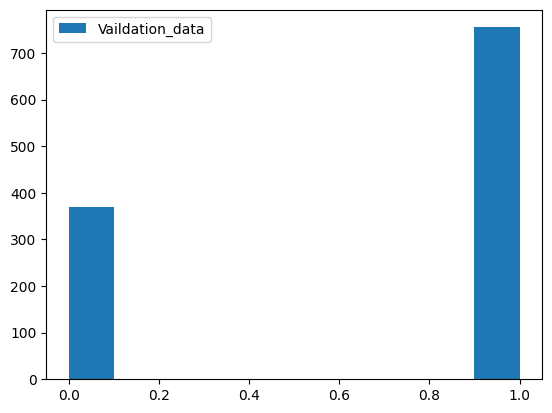

In [20]:
def convert_plus_minus(list):
    convert_list = []
    for i in list:
        if i >0:
            convert_list.append(1)
        else:
            convert_list.append(0)
    return np.array(convert_list)

def correct_ratio(list1,list2):
    array1= convert_plus_minus(list1)
    array2 = convert_plus_minus(list2)
    ratio = sum((array1-array2) == 0)/len(array1)
    array3 = array1 - array2
    return abs(array3), ratio
plt.hist(convert_plus_minus(Train_data),label='Train_data')

plt.legend()
plt.show()
plt.hist(convert_plus_minus(Validation_data),label='Vaildation_data')
plt.legend()
plt.show()


## 모델이 충분히 학습하지 못하는 것 같음
batch size에 따라 학습이 급격하게 변하였음 시계열 데이터의 주기성과 관련있지 않을까?

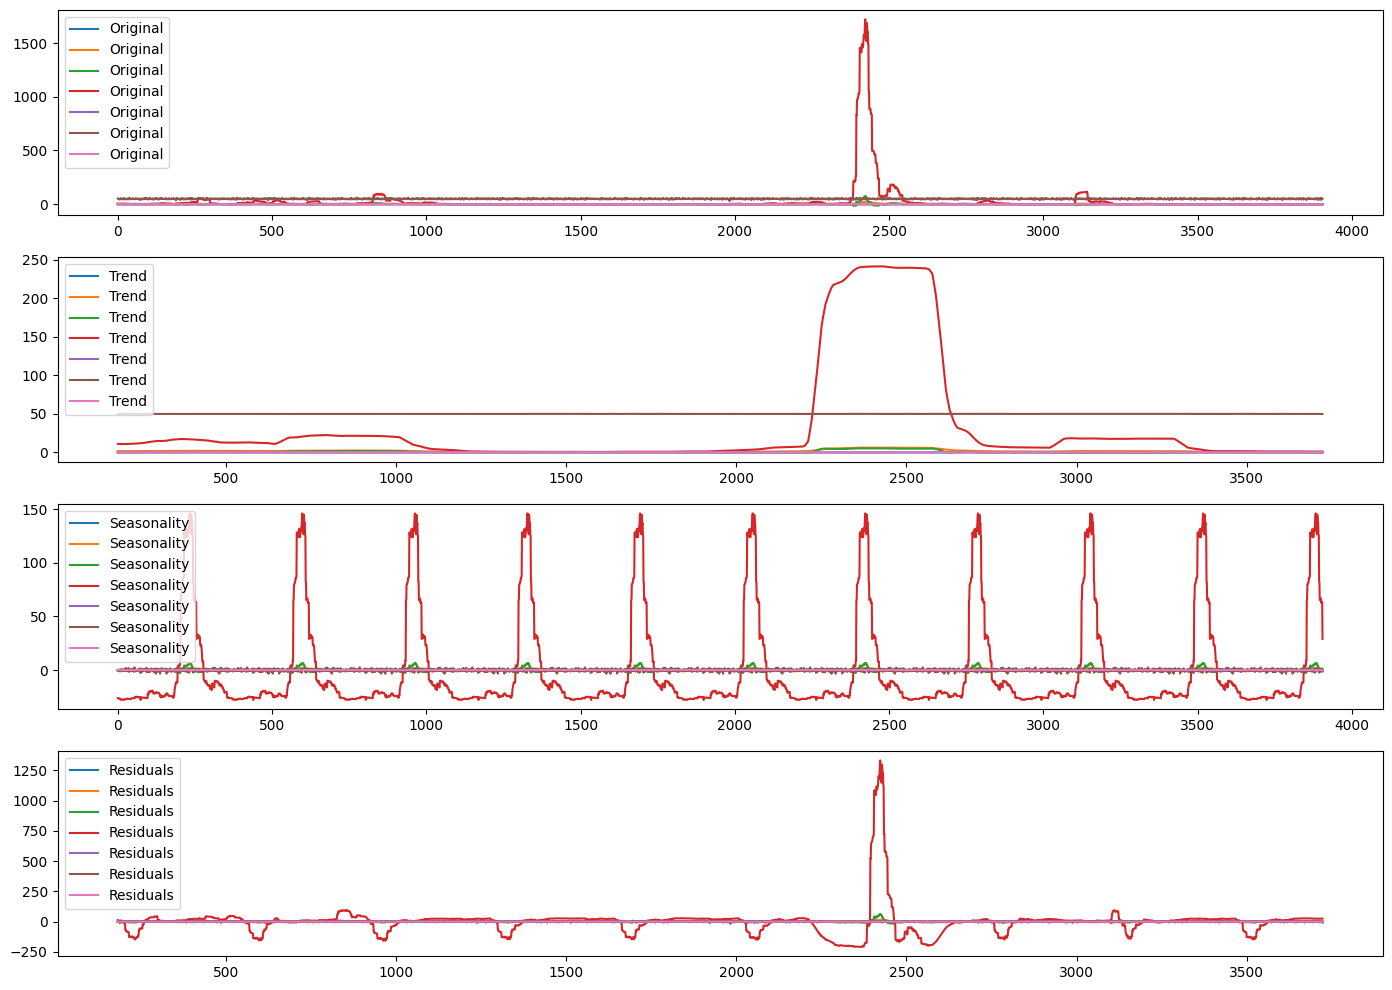

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 예제 시계열 데이터 생성 (실제 데이터를 사용하세요)


# 시계열 데이터프레임 생성
time_series_train = X[:int(len(X)*0.8)]

# 시계열 분해
decomposition = seasonal_decompose(time_series_train, model='additive', period=365)

# 분해 결과
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# 분해된 구성 요소 시각화
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(time_series_train, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

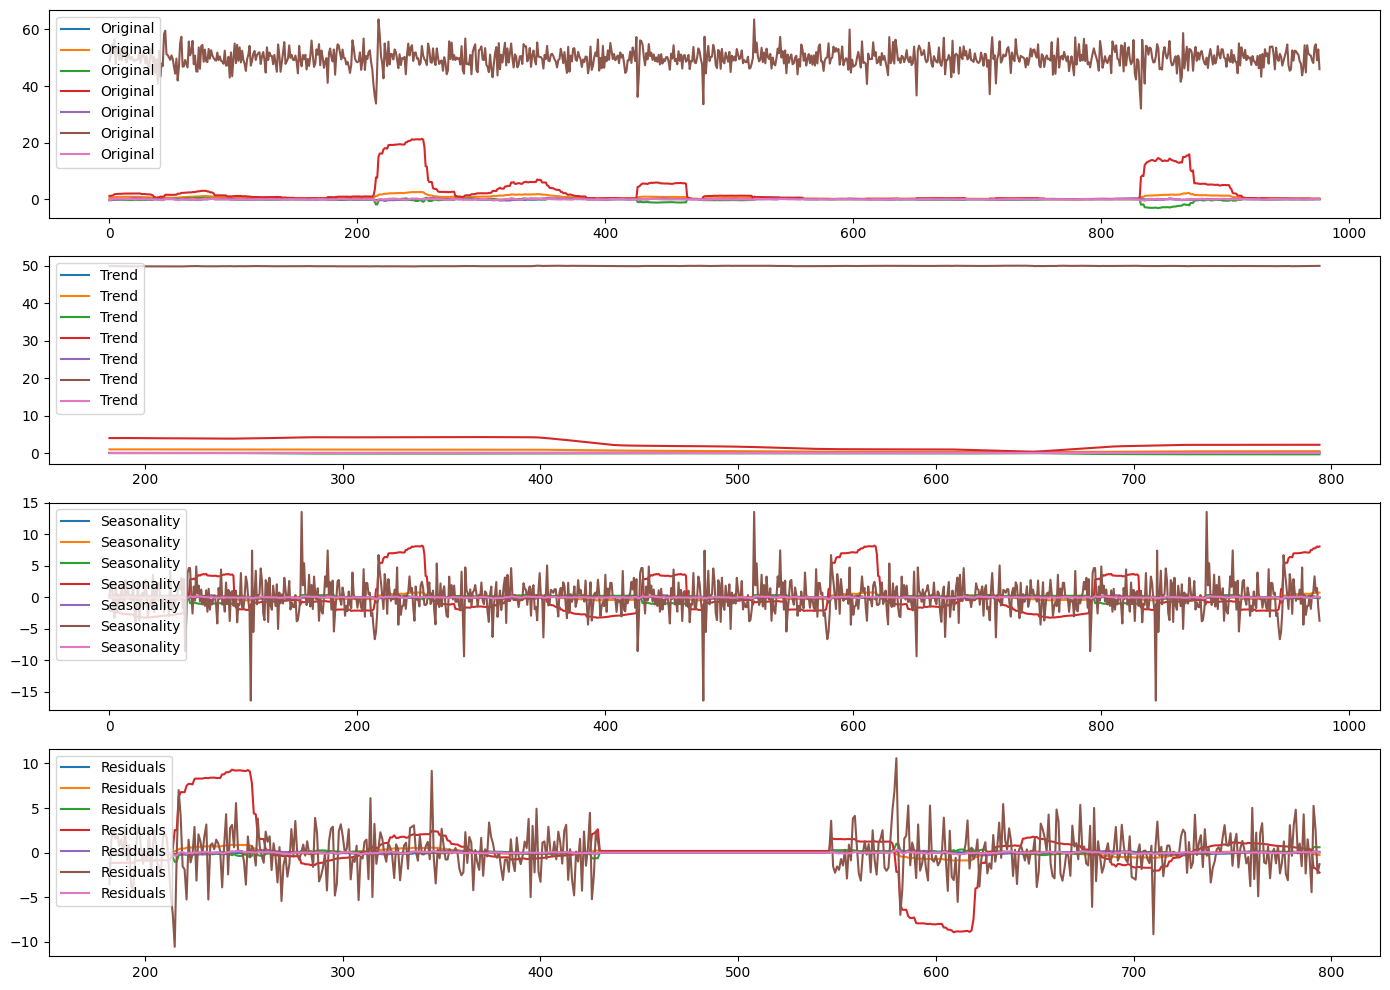

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 예제 시계열 데이터 생성 (실제 데이터를 사용하세요)


# 시계열 데이터프레임 생성
time_series_vail = X[int(len(X)*0.8):]

# 시계열 분해
decomposition = seasonal_decompose(time_series_vail, model='additive', period=365)

# 분해 결과
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# 분해된 구성 요소 시각화
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(time_series_vail, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

ValueError: x is required to have ndim 1 but has ndim 2

<Figure size 1200x600 with 0 Axes>

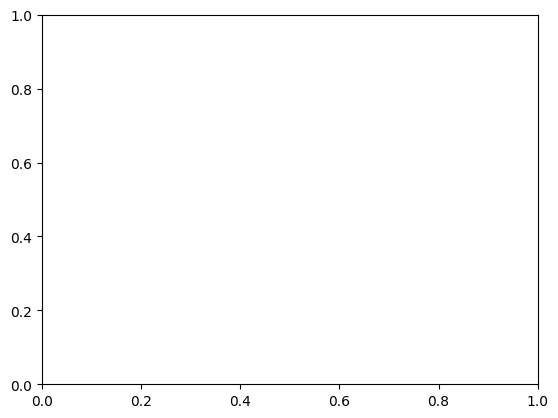

In [23]:
from statsmodels.graphics.tsaplots import plot_acf

# 자기상관 함수 시각화
plt.figure(figsize=(12, 6))
plot_acf(time_series_train, lags=64)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.show()

ValueError: x is required to have ndim 1 but has ndim 2

<Figure size 1200x600 with 0 Axes>

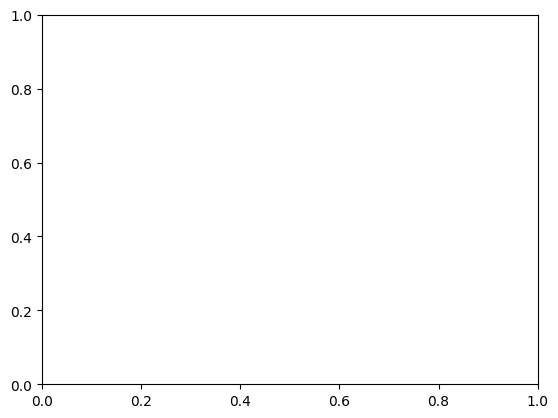

In [24]:
from statsmodels.graphics.tsaplots import plot_acf

# 자기상관 함수 시각화
plt.figure(figsize=(12, 6))
plot_acf(time_series_vail, lags=64)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.show()

ValueError: x is required to have ndim 1 but has ndim 2

<Figure size 1000x600 with 0 Axes>

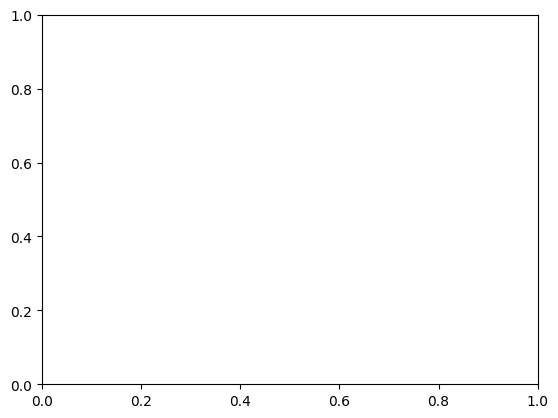

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf

# PACF 시각화
plt.figure(figsize=(10, 6))
plot_pacf(time_series_train, lags=64)
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

ValueError: x is required to have ndim 1 but has ndim 2

<Figure size 1000x600 with 0 Axes>

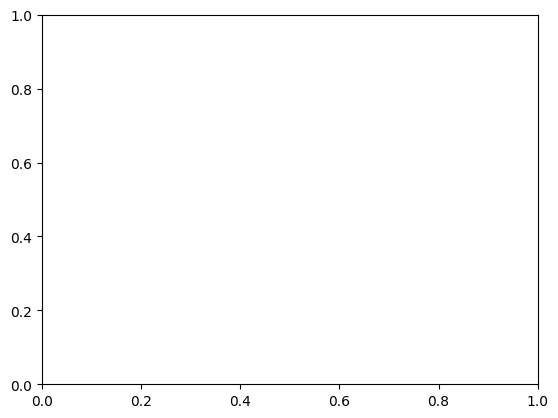

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf

# PACF 시각화
plt.figure(figsize=(10, 6))
plot_pacf(time_series_vail, lags=64)
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

------

## training

In [12]:
data_1 = data


In [13]:
def adjust_values(value):
    # 값이 -10에서 10 사이의 범위를 넘어가는 경우를 고려하여 클리핑
    clipped_value = np.clip(abs(value), 0, 10)
    # 0.1 간격으로 반올림
    adjusted_value = round(clipped_value * 100) / 100.0
    return adjusted_value

In [14]:
def convert_to_text(value):
    integer_part = int(value)
    decimal_part = int((value - integer_part) * 100)  # 소수점 이하 두 자리까지
    if integer_part == 0:
        text = f"{integer_part} point {decimal_part:02d}"
    else:
        text = f"{integer_part} point {decimal_part:02d}"
    return text + " percent"

In [15]:
import itertools
import torch
import torch.nn.functional as F
import numpy as np
from transformers import AutoTokenizer, AutoModelForMaskedLM, AdamW
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tqdm import tqdm

class model_base:
    def __init__(self, model, tokenizer, device='mps'):
        self.model = model
        self.tokenizer = tokenizer
        self.device = device
        self.model.to(device)
    
    def convert_tokens_to_value(self, tokens):
        try:
            increase_or_decrease = tokens[0]
            integer_part = int(tokens[1])
            decimal_part = int(tokens[2])
            value = integer_part + decimal_part / 100.0
            if increase_or_decrease == 'decrease':
                value = -value
            return value
        except:
            return 100
    def extract_true_value(self, true_label):
        true_label_tokens = true_label.split()
        increase_or_decrease = true_label_tokens[-6]
        integer_part = int(true_label_tokens[-4])
        decimal_part = int(true_label_tokens[-2])
        true_value = integer_part + decimal_part / 100.0
        if increase_or_decrease == 'decrease':
            true_value = -true_value
        return true_value

    def calculate_mse(self, predicted_tokens, true_label):
        print(predicted_tokens,true_label)
        predicted_value = self.convert_tokens_to_value(predicted_tokens)
    
        true_value = self.convert_tokens_to_value(true_label)
        # except:
        #     true_value = self.convert_tokens_to_value(true_label)
        mse = mean_squared_error([true_value], [predicted_value])
        return mse, predicted_value, true_value

    def calculate_return(self, data):
        return sum(data) / len(data)

    def calculate_cumulative_returns(self, returns):
        return np.cumsum(returns)

    def predict_masked_token(self, input_ids, attention_mask, top_n=5):
        self.model.eval()

        with torch.no_grad():
            outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits

        mask_token_indices = (input_ids == self.tokenizer.mask_token_id).nonzero(as_tuple=True)[1]

        probabilities = []
        tokens = []
        for idx in mask_token_indices:
            mask_logits = logits[0, idx, :]
            mask_probs = F.softmax(mask_logits, dim=-1)
            top_probs, top_indices = torch.topk(mask_probs, top_n)
            probabilities.append(top_probs.tolist())
            tokens.append(self.tokenizer.convert_ids_to_tokens(top_indices))

        combinations = list(itertools.product(*tokens))
        combination_probs = []

        for combo in combinations:
            prob = 1
            for i, token in enumerate(combo):
                token_idx = tokens[i].index(token)
                prob *= probabilities[i][token_idx]
            combination_probs.append((combo, prob))

        combination_probs.sort(key=lambda x: x[1], reverse=True)

        return combination_probs[:5], list(zip(tokens, probabilities))

    def fill_mask_with_top_combinations(self, input_text, top_combinations):
        inputs = self.tokenizer(input_text, return_tensors="pt", padding="max_length", max_length=100, truncation=True)
        input_ids = inputs["input_ids"].squeeze().tolist()

        mask_token_indices = [i for i, token in enumerate(input_ids) if token == self.tokenizer.mask_token_id]
        filled_sentences = []

        for combination in top_combinations:
            tokens = combination[0]
            filled_sentence_ids = input_ids[:]
            for idx, mask_idx in enumerate(mask_token_indices):
                filled_sentence_ids[mask_idx] = self.tokenizer.convert_tokens_to_ids(tokens[idx])
            filled_sentence = self.tokenizer.decode(filled_sentence_ids, skip_special_tokens=True)
            filled_sentences.append(filled_sentence)

        return filled_sentences

    def evaluate(self, test_dataloader):
        mse_total = 0
        start_value_predict = 1
        start_value_true = 1
        predict_value_list = []
        true_value_list = []
        mse_list = []
        top_combinations_list = []
        filled_sentences_list = []
        predict_cum_list = []
        true_cum_list = []

        for batch in tqdm(test_dataloader, desc="Evaluating"):
            input_ids, attention_mask, label = [x.to(self.device) for x in batch]
            top_combinations, individual_probs = self.predict_masked_token(input_ids,attention_mask)
            top_combinations_list.append(top_combinations)
            predicted_token = top_combinations[0][0]  # 가장 높은 확률 조합 사용
            
            filled_sentences = self.fill_mask_with_top_combinations(input_text, top_combinations[:5])
            filled_sentences_list.append(filled_sentences)
            
            mse, predicted_value, true_value = self.calculate_mse(predicted_token, label)
            mse_total += mse * 0.01 #왜 0.01
            start_value_predict *= (1 + predicted_value * 0.01)
            start_value_true *= (1 + true_value * 0.01)
            true_cum_list.append(start_value_true)
            predict_cum_list.append(start_value_predict)
            mse_list.append(mse_total)
            predict_value_list.append(predicted_value)
            true_value_list.append(true_value)
        
        return {
            "mse_total": mse_total,
            "true_value_list": true_value_list,
            "predict_value_list": predict_value_list,
            "mse_list": mse_list,
            "top_combinations_list": top_combinations_list,
            "filled_sentences_list": filled_sentences_list,
            "predict_cum_list":predict_cum_list,
            "true_cum_list":true_cum_list
        }

    def convert_top1_to_value(self, top5_combinations):
        if top5_combinations:
            top1_combination = top5_combinations[0][0]  # 첫 번째 조합의 토큰들
            increase_or_decrease = top1_combination[0]
            integer_part = int(top1_combination[1])
            decimal_part = int(top1_combination[2])
            value = integer_part + decimal_part / 100.0
            if increase_or_decrease == 'decrease':
                value = -value
        return value

    def plot_cumulative_returns(self, true_value_list, predict_value_list, mse_list):
        plt.figure(figsize=(12, 6))
        plt.plot(true_value_list, label='True Cumulative Returns')
        plt.plot(predict_value_list, label='Predicted Cumulative Returns', linestyle='--')
        plt.plot(mse_list, label='Cumulative MSE', linestyle='-.')
        plt.xlabel('Time')
        plt.ylabel('Cumulative Returns')
        plt.title('True vs Predicted Cumulative Returns')
        plt.legend()
        plt.show()

    def train(self, train_dataloader,test_dataloader, optimizer, epochs):
        train_losses = []
        test_losses = []
        test_mse_list = []

        for epoch in range(epochs):
            # Training
            self.model.train()
            epoch_train_loss = 0
            for batch in tqdm(train_dataloader, desc=f"Training Epoch {epoch+1}"):
                input_ids, attention_mask, labels = [x.to(self.device) for x in batch]

                optimizer.zero_grad()

                outputs = self.model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss

                loss.backward()
                optimizer.step()
                
                epoch_train_loss += loss.item()

            avg_epoch_train_loss = epoch_train_loss / len(train_dataloader)
            train_losses.append(avg_epoch_train_loss)
            print(f"Epoch {epoch+1} Train Loss: {avg_epoch_train_loss}")

            # Evaluation
            self.model.eval()
            epoch_test_loss = 0
            mse_total = 0
            with torch.no_grad():
                for batch in tqdm(test_dataloader, desc=f"Evaluating Epoch {epoch+1}"):
                    input_ids, attention_mask, labels = [x.to(self.device) for x in batch]

                    outputs = self.model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                    logits = outputs.logits

                    mask_token_indices = (input_ids == self.tokenizer.mask_token_id).nonzero(as_tuple=True)[1]
                    predicted_tokens = []
                    label_token = []
                    for mask_token_index in mask_token_indices:
                        mask_token_logits = logits[0, mask_token_index, :]
                        top_token_id = torch.argmax(mask_token_logits, dim=-1).item()
                        predicted_token = tokenizer.decode([top_token_id])
                        label_token_id = labels[0][mask_token_index]
                        label_decode = tokenizer.decode([label_token_id])
                        predicted_tokens.append(predicted_token)
                        label_token.append(label_decode)
                    loss = outputs.loss

                    epoch_test_loss += loss.item()

                    # MSE 계
                    mse, predicted_value, true_value = self.calculate_mse(predicted_tokens, label_token)
                    mse_total += mse

            avg_epoch_test_loss = epoch_test_loss / len(test_dataloader)
            print(f"Epoch {epoch+1} Test Loss: {avg_epoch_test_loss}")
            print(f"Epoch {epoch+1} total MSE: {mse_total}")
            
            test_mse_list.append(mse_total)
            test_losses.append(avg_epoch_test_loss)
        return train_losses, test_losses,test_mse_list

# Example usage


In [16]:
def evaluate(self, test_dataloader):
        mse_total = 0
        start_value_predict = 1
        start_value_true = 1
        predict_value_list = []
        true_value_list = []
        mse_list = []
        top_combinations_list = []
        filled_sentences_list = []
        predict_cum_list = []
        true_cum_list = []

        for batch in tqdm(test_dataloader, desc="Evaluating"):
            input_ids, attention_mask, label = [x.to(self.device) for x in batch]
            top_combinations, individual_probs = self.predict_masked_token(input_ids,attention_mask)
            top_combinations_list.append(top_combinations)
            predicted_token = top_combinations[0][0]  # 가장 높은 확률 조합 사용
            
            filled_sentences = self.fill_mask_with_top_combinations(input_text, top_combinations[:5])
            filled_sentences_list.append(filled_sentences)
            
            mse, predicted_value, true_value = self.calculate_mse(predicted_token, label)
            mse_total += mse * 0.01 #왜 0.01 곱했지?
            start_value_predict *= (1 + predicted_value * 0.01)
            start_value_true *= (1 + true_value * 0.01)
            true_cum_list.append(start_value_true)
            predict_cum_list.append(start_value_predict)
            mse_list.append(mse_total)
            predict_value_list.append(predicted_value)
            true_value_list.append(true_value)
        
        return {
            "mse_total": mse_total,
            "true_value_list": true_value_list,
            "predict_value_list": predict_value_list,
            "mse_list": mse_list,
            "top_combinations_list": top_combinations_list,
            "filled_sentences_list": filled_sentences_list,
            "predict_cum_list":predict_cum_list,
            "true_cum_list":true_cum_list
        }


## model 1-stage1
stage 1 model

In [17]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("SALT-NLP/FLANG-BERT")
model1_1 = AutoModelForMaskedLM.from_pretrained("SALT-NLP/FLANG-BERT")


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import ta

def calculate_moments(predict_list):
    mean_value = np.mean(predict_list)
    deviations = [x - mean_value for x in predict_list]
    first_moment = mean_value
    second_moment = np.mean([d ** 2 for d in deviations])
    third_moment = np.mean([d ** 3 for d in deviations])
    fourth_moment = np.mean([d ** 4 for d in deviations])
    return first_moment, second_moment, third_moment, fourth_moment

def calculate_return(data):
    return sum(data) / len(data)

def convert_to_text_moment(value):
    sign = "positive" if value >= 0 else "negative"
    value = abs(value)
    integer_part = int(value)
    decimal_part = int((value - integer_part) * 100)
    text = f"{integer_part} point {decimal_part:02d}"
    return f"{sign} {text}"

def convert_to_text(value, future):
    sign = "positive" if value >= 0 else "negative"
    value = abs(value)
    integer_part = int(value)
    decimal_part = int((value - integer_part) * 100)
    text = f"{integer_part} point {decimal_part:02d}"
    if future:
        return f"{text}"
    else:
        return f"{sign} {text}"

def generate_sentence(past_20_data, past_10_data, past_5_data, past_20_return, past_10_return, past_5_return, future_return, ta_indicators):
    increase_or_decrease_future = "positive" if future_return > 0 else "negative"
    future_return_text = convert_to_text(abs(round(future_return, 2)), True)
    first_moment, second_moment, third_moment, fourth_moment = calculate_moments(past_20_data)
    first_moment = convert_to_text_moment(first_moment)
    second_moment = convert_to_text_moment(second_moment)
    third_moment = convert_to_text_moment(third_moment)
    fourth_moment = convert_to_text_moment(fourth_moment)

    ma_20, rsi, macd, stochastic = ta_indicators
    ma_20_text = convert_to_text(ma_20, False)
    rsi_text = convert_to_text(rsi, False)
    macd_text = convert_to_text(macd, False)
    stochastic_text = convert_to_text(stochastic, False)

    input_sentence = (f'The stock market\'s return over the past two months was {convert_to_text_moment(past_20_return)}. '
                      f'The stock market\'s return over the past one months was {convert_to_text_moment(past_10_return)}. '
                      f'The stock market\'s return over the past one weeks was {convert_to_text_moment(past_5_return)}. '
                      f'The variance of past two months returns is {second_moment}. '
                      f'The skewness of past two months returns is {third_moment}. '
                      f'The kurtosis of past two months returns is {fourth_moment}. '
                      f'The 20 day moving average is {ma_20_text}. '
                      f'The 20 day RSI is {rsi_text}. '
                      f'The 40 day MACD is {macd_text}. '
                      f'Considering this, The expected return of the stock market over the next month is [MASK][MASK] point [MASK] percent.')

    label_sentence = (f'The stock market\'s return over the past two months was {convert_to_text_moment(past_20_return)}. '
                      f'The stock market\'s return over the past one months was {convert_to_text_moment(past_10_return)}. '
                      f'The stock market\'s return over the past one weeks was {convert_to_text_moment(past_5_return)}. '
                      f'The variance of past two months returns is {second_moment}. '
                      f'The skewness of past two months returns is {third_moment}. '
                      f'The kurtosis of past two months returns is {fourth_moment}. '
                      f'The 20 day moving average is {ma_20_text}. '
                      f'The 20 day RSI is {rsi_text}. '
                      f'The 40 day MACD is {macd_text}. '
                      f'Considering this, The expected return of the stock market over the next month is {increase_or_decrease_future} {future_return_text} percent.')

    return input_sentence, label_sentence

def gen(num_sentences, past, future, data_1):
    inputs = []
    labels = []
    data = data_1['Adj Close'].values
    
    for i in range(num_sentences - future):
        past_40_data = data[i:i + 40]
        past_20_data = data[i + 20:i + 40]
        past_5_data = data[i + 35:i + 40]
        past_40_return = calculate_return(past_40_data)
        past_20_return = calculate_return(past_20_data)
        past_5_return = calculate_return(past_5_data)
        future_return = calculate_return(data[i + 40:i + 40 + future])

        ma_20 = ta.trend.sma_indicator(data_1['Adj Close'][i:i+40], window=20).iloc[-1]
        rsi = ta.momentum.rsi(data_1['Adj Close'][i:i+40], window=20).iloc[-1]
        macd = ta.trend.macd(data_1['Adj Close'][i:i+40]).iloc[-1]
        stochastic = (data_1['Adj Close'][i:i+40][-1] - data_1['Low'][i:i+40].min())/(data_1['High'][i:+i+40].max() -data_1['Low'][i:i+40].min())

        ta_indicators = (ma_20, rsi, macd, stochastic)

        input_sentence, label_sentence = generate_sentence(past_40_data, past_20_data, past_5_data, past_40_return, past_20_return, past_5_return, future_return, ta_indicators)
        inputs.append(input_sentence)
        labels.append(label_sentence)
        
    return inputs, labels

# 예시 실행
# 예시 데이터 생성

num_sentences = len(data_1) - 60
inputs, labels = gen(num_sentences, 20, 20, data_1)

# 결과 출력
inputs_train, inputs_test, labels_train, labels_test = train_test_split(inputs, labels, test_size=0.2, shuffle=False)

# 예시 문장 출력
print(inputs_train[:2])
print(labels_train[:2])

["The stock market's return over the past two months was positive 0 point 00. The stock market's return over the past one months was negative 0 point 12. The stock market's return over the past one weeks was negative 0 point 41. The variance of past two months returns is positive 1 point 72. The skewness of past two months returns is positive 0 point 62. The kurtosis of past two months returns is positive 6 point 78. The 20 day moving average is negative 0 point 12. The 20 day RSI is positive 50 point 11. The 40 day MACD is negative 0 point 14. Considering this, The expected return of the stock market over the next month is [MASK][MASK] point [MASK] percent.", "The stock market's return over the past two months was positive 0 point 01. The stock market's return over the past one months was negative 0 point 09. The stock market's return over the past one weeks was positive 0 point 02. The variance of past two months returns is positive 1 point 73. The skewness of past two months returns

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import ta

def calculate_moments(predict_list):
    mean_value = np.mean(predict_list)
    deviations = [x - mean_value for x in predict_list]
    first_moment = mean_value
    second_moment = np.mean([d ** 2 for d in deviations])
    third_moment = np.mean([d ** 3 for d in deviations])
    fourth_moment = np.mean([d ** 4 for d in deviations])
    return first_moment, second_moment, third_moment, fourth_moment

def calculate_return(data):
    return sum(data) / len(data)

def convert_to_text_moment(value):
    sign = "positive" if value >= 0 else "negative"
    value = abs(value)
    integer_part = int(value)
    decimal_part = int((value - integer_part) * 100)
    text = f"{integer_part} point {decimal_part:02d}"
    return f"{sign} {text}"

def convert_to_text(value, future):
    sign = "positive" if value >= 0 else "negative"
    value = abs(value)
    integer_part = int(value)
    decimal_part = int((value - integer_part) * 100)
    text = f"{integer_part} point {decimal_part:02d}"
    if future:
        return f"{text}"
    else:
        return f"{sign} {text}"

def generate_sentence(past_20_data, past_10_data, past_5_data, past_20_return, past_10_return, past_5_return, future_return, ta_indicators, bbp_change):
    increase_or_decrease_future = "positive" if future_return > 0 else "negative"
    future_return_text = convert_to_text(abs(round(future_return, 2)), True)
    first_moment, second_moment, third_moment, fourth_moment = calculate_moments(past_20_data)
    first_moment = convert_to_text_moment(first_moment)
    second_moment = convert_to_text_moment(second_moment)
    third_moment = convert_to_text_moment(third_moment)
    fourth_moment = convert_to_text_moment(fourth_moment)

    ma_20, rsi, macd, stochastic = ta_indicators
    ma_20_text = convert_to_text(ma_20, False)
    rsi_text = convert_to_text(rsi, False)
    macd_text = convert_to_text(macd, False)
    stochastic_text = convert_to_text(stochastic, False)

    bbp_change_text = convert_to_text(bbp_change, False)

    input_sentence = (f'The stock market\'s return over the past two months was {convert_to_text_moment(past_20_return)}. '
                      f'The stock market\'s return over the past one months was {convert_to_text_moment(past_10_return)}. '
                      f'The stock market\'s return over the past one weeks was {convert_to_text_moment(past_5_return)}. '
                      f'The variance of past two months returns is {second_moment}. '
                      f'The skewness of past two months returns is {third_moment}. '
                      f'The kurtosis of past two months returns is {fourth_moment}. '
                      f'The 20 day moving average is {ma_20_text}. '
                      f'The 20 day RSI is {rsi_text}. '
                      f'The 40 day MACD is {macd_text}. '
                      f'The Bollinger Band Width change over the past month is {bbp_change_text}. '
                      f'Considering this, The expected return of the stock market over the next month is [MASK][MASK] point [MASK] percent.')

    label_sentence = (f'The stock market\'s return over the past two months was {convert_to_text_moment(past_20_return)}. '
                      f'The stock market\'s return over the past one months was {convert_to_text_moment(past_10_return)}. '
                      f'The stock market\'s return over the past one weeks was {convert_to_text_moment(past_5_return)}. '
                      f'The variance of past two months returns is {second_moment}. '
                      f'The skewness of past two months returns is {third_moment}. '
                      f'The kurtosis of past two months returns is {fourth_moment}. '
                      f'The 20 day moving average is {ma_20_text}. '
                      f'The 20 day RSI is {rsi_text}. '
                      f'The 40 day MACD is {macd_text}. '
                      f'The Bollinger Band Width change over the past month is {bbp_change_text}. '
                      f'Considering this, The expected return of the stock market over the next month is {increase_or_decrease_future} {future_return_text} percent.')

    return input_sentence, label_sentence

def gen(num_sentences, past, future, data_1):
    inputs = []
    labels = []
    data = data_1['Adj Close'].values
    
    for i in range(num_sentences - future):
        past_40_data = data[i:i + 40]
        past_20_data = data[i + 20:i + 40]
        past_5_data = data[i + 35:i + 40]
        past_40_return = calculate_return(past_40_data)
        past_20_return = calculate_return(past_20_data)
        past_5_return = calculate_return(past_5_data)
        future_return = calculate_return(data[i + 40:i + 40 + future])

        ma_20 = ta.trend.sma_indicator(data_1['Adj Close'][i:i+40], window=20).iloc[-1]
        rsi = ta.momentum.rsi(data_1['Adj Close'][i:i+40], window=20).iloc[-1]
        macd = ta.trend.macd(data_1['Adj Close'][i:i+40]).iloc[-1]
        stochastic = (data_1['Adj Close'][i:i+40][-1] - data_1['Low'][i:i+40].min())/(data_1['High'][i:+i+40].max() -data_1['Low'][i:i+40].min())

        # 볼린저 밴드 폭 계산
        bb_upper = ta.volatility.BollingerBands(data_1['Adj Close'][i:i+40], window=20).bollinger_hband()
        bb_lower = ta.volatility.BollingerBands(data_1['Adj Close'][i:i+40], window=20).bollinger_lband()
        bbp = bb_upper - bb_lower
        bbp_change = bbp.iloc[-1] - bbp.iloc[19]

        ta_indicators = (ma_20, rsi, macd, stochastic)

        input_sentence, label_sentence = generate_sentence(past_40_data, past_20_data, past_5_data, past_40_return, past_20_return, past_5_return, future_return, ta_indicators, bbp_change)
        inputs.append(input_sentence)
        labels.append(label_sentence)
        
    return inputs, labels

# 예시 실행
# 예시 데이터 생성

num_sentences = len(data_1) - 60
inputs, labels = gen(num_sentences, 20, 20, data_1)

# 결과 출력
inputs_train, inputs_test, labels_train, labels_test = train_test_split(inputs, labels, test_size=0.2, shuffle=False)

# 예시 문장 출력
print(inputs_train[:2])
print(labels_train[:2])

["The stock market's return over the past two months was positive 0 point 00. The stock market's return over the past one months was negative 0 point 12. The stock market's return over the past one weeks was negative 0 point 41. The variance of past two months returns is positive 1 point 72. The skewness of past two months returns is positive 0 point 62. The kurtosis of past two months returns is positive 6 point 78. The 20 day moving average is negative 0 point 12. The 20 day RSI is positive 50 point 11. The 40 day MACD is negative 0 point 14. The Bollinger Band Width change over the past month is positive 0 point 02. Considering this, The expected return of the stock market over the next month is [MASK][MASK] point [MASK] percent.", "The stock market's return over the past two months was positive 0 point 01. The stock market's return over the past one months was negative 0 point 09. The stock market's return over the past one weeks was positive 0 point 02. The variance of past two mo

In [20]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# import ta

# def calculate_moments(predict_list):
#     mean_value = np.mean(predict_list)
#     deviations = [x - mean_value for x in predict_list]
#     first_moment = mean_value
#     second_moment = np.mean([d ** 2 for d in deviations])
#     third_moment = np.mean([d ** 3 for d in deviations])
#     fourth_moment = np.mean([d ** 4 for d in deviations])
#     return first_moment, second_moment, third_moment, fourth_moment

# def calculate_return(data):
#     return sum(data) / len(data)

# def convert_to_text_moment(value):
#     sign = "positive" if value >= 0 else "negative"
#     value = abs(value)
#     integer_part = int(value)
#     decimal_part = int((value - integer_part) * 100)
#     text = f"{integer_part} point {decimal_part:02d}"
#     return f"{sign} {text}"

# def convert_to_text(value, future):
#     sign = "positive" if value >= 0 else "negative"
#     value = abs(value)
#     integer_part = int(value)
#     decimal_part = int((value - integer_part) * 100)
#     text = f"{integer_part} point {decimal_part:02d}"
#     if future:
#         return f"{text}"
#     else:
#         return f"{sign} {text}"

# def generate_sentence(past_20_data, past_10_data, past_5_data, past_20_return, past_10_return, past_5_return, future_return, ta_indicators):
#     increase_or_decrease_future = "positive" if future_return > 0 else "negative"
#     future_return_text = convert_to_text(abs(round(future_return, 2)), True)
#     first_moment, second_moment, third_moment, fourth_moment = calculate_moments(past_20_data)
#     first_moment = convert_to_text_moment(first_moment)
#     second_moment = convert_to_text_moment(second_moment)
#     third_moment = convert_to_text_moment(third_moment)
#     fourth_moment = convert_to_text_moment(fourth_moment)

#     ma_20, rsi, macd = ta_indicators
#     ma_20_text = convert_to_text(ma_20, False)
#     rsi_text = convert_to_text(rsi, False)
#     macd_text = convert_to_text(macd, False)

#     input_sentence = (f'The stock market\'s return over the past one months and half was {convert_to_text_moment(past_20_return)}. '
#                       f'The stock market\'s return over the past one months was {convert_to_text_moment(past_10_return)}. '
#                       f'The stock market\'s return over the past one weeks was {convert_to_text_moment(past_5_return)}.'
#                       f'The variance of past one months and half returns is {second_moment}.'
#                       f'The skewness of past one months and half is {third_moment}. '
#                       f'The kurtosis of past one months and half is {fourth_moment}. '
#                       f'The 20-day moving average is {ma_20_text}. '
#                       f'The RSI is {rsi_text}. '
#                       f'The MACD is {macd_text}. '
#                       f'Considering this, The expected return of the stock market over the next week is [MASK][MASK] point [MASK] percent.')

#     label_sentence = (f'The stock market\'s return over the past one months and half was {convert_to_text_moment(past_20_return)}. '
#                       f'The stock market\'s return over the past one months was {convert_to_text_moment(past_10_return)}. '
#                       f'The stock market\'s return over the past one weeks was {convert_to_text_moment(past_5_return)}.'
#                       f'The variance of past one months and half returns is {second_moment}.'
#                       f'The skewness of past one months and half is {third_moment}. '
#                       f'The kurtosis of past one months and half is {fourth_moment}. '
#                       f'The 20-day moving average is {ma_20_text}. '
#                       f'The RSI is {rsi_text}. '
#                       f'The MACD is {macd_text}. '
#                       f'Considering this, The expected return of the stock market over the next week is {increase_or_decrease_future} {future_return_text} percent.')

#     return input_sentence, label_sentence

# def gen(num_sentences, past, future, data_1):
#     inputs = []
#     labels = []
#     data = data_1['Adj Close'].values
    
#     for i in range(num_sentences - future):
#         past_40_data = data[i:i + 30]
#         past_20_data = data[i + 10:i + 30]
#         past_5_data = data[i + 15:i + 20]
#         past_40_return = calculate_return(past_40_data)
#         past_20_return = calculate_return(past_20_data)
#         past_5_return = calculate_return(past_5_data)
#         future_return = calculate_return(data[i + 30:i + 30 + future])

#         ma_20 = ta.trend.sma_indicator(data_1['Adj Close'][i:i+30], window=20).iloc[-1]
#         rsi = ta.momentum.rsi(data_1['Adj Close'][i:i+30], window=14).iloc[-1]
#         macd = ta.trend.macd(data_1['Adj Close'][i:i+30]).iloc[-1]

#         ta_indicators = (ma_20, rsi, macd)

#         input_sentence, label_sentence = generate_sentence(past_40_data, past_20_data, past_5_data, past_40_return, past_20_return, past_5_return, future_return, ta_indicators)
#         inputs.append(input_sentence)
#         labels.append(label_sentence)
        
#     return inputs, labels

# # 예시 실행
# # 예시 데이터 생성

# num_sentences = len(data_1) - 35
# inputs, labels = gen(num_sentences, 20, 5, data_1)

# # 결과 출력
# inputs_train, inputs_test, labels_train, labels_test = train_test_split(inputs, labels, test_size=0.2, shuffle=False)

# # 예시 문장 출력
# print(inputs_train[:2])
# print(labels_train[:2])

In [21]:
from transformers import BertTokenizer, BertForMaskedLM, AdamW
import torch
from torch.utils.data import Dataset, DataLoader

import torch
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

# 모델 및 토크나이저 로드

class StockReturnDataset(Dataset):
    def __init__(self, inputs, labels, tokenizer):
        self.inputs = inputs
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        input_text = self.inputs[idx]
        label_text = self.labels[idx]

        inputs = self.tokenizer(input_text, return_tensors="pt", padding="max_length", max_length=len(tokenizer.encode(inputs_train[0])), truncation=True)
        labels = self.tokenizer(label_text, return_tensors="pt", padding="max_length", max_length=len(tokenizer.encode(inputs_train[0])), truncation=True)

        input_ids = inputs["input_ids"].squeeze()
        attention_mask = inputs["attention_mask"].squeeze()
        label_ids = labels["input_ids"].squeeze()
        
        # Mask token의 위치 찾기
        mask_token_index = (input_ids == self.tokenizer.mask_token_id).nonzero(as_tuple=True)[0]
        
        # [MASK] 토큰 위치를 제외한 나머지 위치에 대해 -100 설정
        labels = torch.full_like(input_ids, -100)
        labels[mask_token_index] = label_ids[mask_token_index]
    
        return input_ids, attention_mask, labels

# Train and test datasets
train_dataset = StockReturnDataset(inputs_train, labels_train, tokenizer)
test_dataset = StockReturnDataset(inputs_test, labels_test, tokenizer)

train_dataloader = DataLoader(train_dataset, batch_size=60, shuffle=False)
test_dataloader = DataLoader(test_dataset, shuffle=False)


input_ids =batch_size

len(logits[0]) # 문장길이 => logits[0] 여기에서 마스크 있는부분만 들고오기

In [22]:
import torch.optim as optim

In [23]:
device = torch.device('mps')
model1_1.to(device)

# train_dataloader, test_inputs_sample, test_labels_sample 준비 필요
# train_dataloader = ...  # Your DataLoader for training
# test_inputs_sample = ...  # Your test input samples
# test_labels_sample = ...  # Your test label samples
optimizer = optim.AdamW(model1_1.parameters(), lr=5e-8)

predictor = model_base(model1_1, tokenizer, device)


In [24]:
def convert_tokens_to_value(tokens):
    try:
        increase_or_decrease = tokens[0]
        integer_part = int(tokens[1])
        decimal_part = int(tokens[2])
        value = integer_part + decimal_part / 100.0
        if increase_or_decrease == 'negative':
            value = -value
        return value
    except:
        return np.NaN
def extract_true_value(true_label):
    true_label_tokens = true_label.split()
    increase_or_decrease = true_label_tokens[-6]
    integer_part = int(true_label_tokens[-4])
    decimal_part = int(true_label_tokens[-2])
    true_value = integer_part + decimal_part / 100.0
    if increase_or_decrease == 'negative':
        true_value = -true_value
    return true_value

def calculate_mse(predicted_tokens, true_label):
    predicted_value = convert_tokens_to_value(predicted_tokens)
    try:
        true_value = extract_true_value(true_label)
    except:
        true_value = convert_tokens_to_value(true_label)
    if (np.isnan(true_value) or np.isnan(predicted_value)) :
        return 10, predicted_value, true_value
    else:
        mse = mean_squared_error([true_value], [predicted_value])
        return mse, predicted_value, true_value

In [25]:
def convert_plus_minus(i):
    if i >0:
        convert_list = 1
    else:
        convert_list = 0
    return torch.tensor(convert_list)


In [26]:

# train_losses = []
# test_losses = []
# test_mse_list = []
# epochs = 250
# mse_lambda = 1
# cross_lmbda = 30
# criterion = nn.CrossEntropyLoss()
# plus_minus_list = []
# for epoch in range(epochs):
#     # Training
#     model1_1.train()
#     epoch_train_loss = 0
#     for batch in tqdm(train_dataloader, desc=f"Training Epoch {epoch+1}"):
#         input_ids, attention_mask, labels = [x.to(device) for x in batch]

#         optimizer.zero_grad()

#         outputs = model1_1(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
#         logits = outputs.logits
#         total_mse = 0
#         total_cross = 0
#         for index,i in enumerate(logits):
#             mask_token_indices = (input_ids[index] == tokenizer.mask_token_id).nonzero(as_tuple=True)[0]
#             predicted_tokens = []
#             label_token = []
#             count = 0
#             decrease_token_id = tokenizer.encode('positive', add_special_tokens=False)[0]
#             increase_token_id = tokenizer.encode('negative', add_special_tokens=False)[0]

#             # 예측된 토큰 및 실제 레이블을 저장할 리스트 초기화
#             for mask_token_index in mask_token_indices:
#                 mask_token_logits = i[mask_token_index, :]
#                 top_token_id = torch.argmax(mask_token_logits, dim=-1).item()
#                 predicted_token = tokenizer.decode([top_token_id])
#                 label_token_id = labels[index][mask_token_index]
#                 label_decode = tokenizer.decode([label_token_id])
#                 predicted_tokens.append(predicted_token)
#                 label_token.append(label_decode)
#                 mse, predicted_value, true_value = calculate_mse(predicted_tokens, label_token)
#                 if count == 0:
#                     decrease_token_logit = mask_token_logits[decrease_token_id].item()
#                     increase_token_logit = mask_token_logits[increase_token_id].item()
#                     logits_tensor = torch.tensor([decrease_token_logit,increase_token_logit]) 
#                     softmax_probs = F.softmax(logits_tensor, dim=-1)
#                     true_class = convert_plus_minus(true_value)
                    
#                     total_cross += criterion(softmax_probs,true_class)
#                     count += 1
#                     plus_minus_list.append([decrease_token_logit,increase_token_logit])
#             total_mse += mse
#         total_cross = total_cross/len(input_ids)
#         total_mse = total_mse/len(input_ids)
#         loss = outputs.loss + total_mse*mse_lambda + total_cross*cross_lmbda
#         loss.backward()
#         optimizer.step()
        
#         epoch_train_loss += loss.item()

#     avg_epoch_train_loss = epoch_train_loss / len(train_dataloader)
#     train_losses.append(avg_epoch_train_loss)
#     print(f"Epoch {epoch+1} Train Loss: {avg_epoch_train_loss}")

#     # Evaluation
#     model1_1.eval()
#     epoch_test_loss = 0
#     mse_total = 0
#     with torch.no_grad():
#         for batch in tqdm(test_dataloader, desc=f"Evaluating Epoch {epoch+1}"):
#             input_ids, attention_mask, labels = [x.to(device) for x in batch]

#             outputs = model1_1(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
#             logits = outputs.logits

#             mask_token_indices = (input_ids == tokenizer.mask_token_id).nonzero(as_tuple=True)[1]
#             predicted_tokens = []
#             label_token = []
#             for mask_token_index in mask_token_indices:
#                 mask_token_logits = logits[0, mask_token_index, :]
#                 top_token_id = torch.argmax(mask_token_logits, dim=-1).item()
#                 predicted_token = tokenizer.decode([top_token_id])
#                 label_token_id = labels[0][mask_token_index]
#                 label_decode = tokenizer.decode([label_token_id])
#                 predicted_tokens.append(predicted_token)
#                 label_token.append(label_decode)
#             loss = outputs.loss

#             epoch_test_loss += loss.item()

#             # MSE 계
#             mse, predicted_value, true_value = calculate_mse(predicted_tokens, label_token)
#             mse_total += mse
#         mse_total = mse_total/len(test_dataloader)
#     avg_epoch_train_loss = (epoch_test_loss / len(test_dataloader)) + mse_total*mse_lambda
#     print(f"Epoch {epoch+1} Test Loss: {avg_epoch_train_loss}")
#     print(f"Epoch {epoch+1} Test mse: {mse_total}")
#     avg_epoch_test_loss = epoch_test_loss / len(test_dataloader)
#     test_mse_list.append(mse_total)
#     test_losses.append(avg_epoch_test_loss)


In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

def calculate_mse_and_cross_entropy(logits, input_ids, labels, tokenizer, criterion, device):
    batch_size = logits.size(0)
    total_mse = torch.tensor(0.0, device=device, requires_grad=True)
    total_cross_entropy = torch.tensor(0.0, device=device, requires_grad=True)
    
    positive_token_id = tokenizer.encode('positive', add_special_tokens=False)[0]
    negative_token_id = tokenizer.encode('negative', add_special_tokens=False)[0]
    
    for i in range(batch_size):
        mask_token_indices = (input_ids[i] == tokenizer.mask_token_id).nonzero(as_tuple=True)[0]
        
        if len(mask_token_indices) != 3:
            continue  # 마스크 토큰이 3개가 아닌 경우 건너뜁니다
        
        predicted_values = []
        true_values = []
        try: 
            for j, mask_index in enumerate(mask_token_indices):
                mask_token_logits = logits[i, mask_index, :]
                predicted_token_id = torch.argmax(mask_token_logits)
                    
                if j == 0:  # 첫 번째 마스크 (positive/negative)
                    relevant_logits = mask_token_logits[[positive_token_id, negative_token_id]]
                    softmax_probs = F.softmax(relevant_logits.unsqueeze(0), dim=1)
                    true_class = torch.tensor([0 if labels[i, mask_index] == positive_token_id else 1], device=device)
                    cross_entropy_loss = criterion(softmax_probs, true_class)
                    total_cross_entropy = total_cross_entropy + cross_entropy_loss
                    
                    predicted_token = tokenizer.decode([predicted_token_id])
                    predicted_value = 1.0 if predicted_token == 'positive' else -1.0 if predicted_token == 'negative' else 0.0
                    true_value = 1.0 if labels[i, mask_index] == positive_token_id else -1.0
                    predicted_values.append(predicted_value)
                    true_values.append(true_value) 
                else:  # 두 번째와 세 번째 마스크 (숫자)
                    index_tensor = predicted_token_id  # 토큰 ID 예시

                    # 인덱스를 텍스트로 디코딩
                    decoded_text = tokenizer.decode(index_tensor, skip_special_tokens=True)

                    # 디코딩된 텍스트를 숫자로 변환 (예: '42' -> 42.0)
                    predicted_number = torch.tensor(float(decoded_text), device=device, requires_grad=True)

                    # 실제 값 (예: 42)과의 MSE 계산
                    true_digit = float(tokenizer.decode([labels[i, mask_index]]))
                    predicted_values.append(predicted_number)
                    true_values.append(torch.tensor(true_digit, device=device))
            predicted_mse_value = predicted_values[0] * (predicted_values[1] + predicted_values[2] / 100.0)
            true_mse_value = true_values[0] * (true_values[1] + true_values[2] / 100.0)
            mse = (predicted_mse_value - true_mse_value) ** 2        
                    
        except ValueError:
                mse = torch.tensor(10.0, device=device, requires_grad=True)  
            
        total_mse = total_mse+mse
    
    return total_mse / batch_size, total_cross_entropy / batch_size
def evaluate(model, dataloader, device):
    model.eval()  # 모델을 평가 모드로 설정
    total_loss = 0
    with torch.no_grad():  # 그라디언트 계산 비활성화
        for batch in tqdm(dataloader, desc="Evaluating"):
            input_ids, attention_mask, labels = [x.to(device) for x in batch]
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            total_loss += loss
    
    return total_loss 
# 훈련 루프
def train(model1_1,train_dataloader, optimizer, tokenizer, criterion, device, epochs, mse_lambda, cross_lambda,test_dataloader):
    
    model1_1.train()
    train_losses = []
    test_results = []
   
    mse_losses_list = []
    cross_losses_list = []
    for epoch in range(epochs):
        epoch_train_loss = 0
        mse_losses_sum = 0
        cross_losses_sum = 0
        for batch in tqdm(train_dataloader, desc=f"Training Epoch {epoch+1}"):
            input_ids, attention_mask, labels = [x.to(device) for x in batch]
            
            optimizer.zero_grad()
            
            outputs = model1_1(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            logits = outputs.logits
            
            mse_loss, cross_entropy_loss = calculate_mse_and_cross_entropy(logits, input_ids, labels, tokenizer, criterion,device)
            
            loss = outputs.loss + mse_loss * mse_lambda + cross_entropy_loss * cross_lambda
            mse_losses_sum += mse_loss.item()
            cross_losses_sum += cross_entropy_loss.item()
            loss.backward()
            optimizer.step()
            
            epoch_train_loss += loss.item()
        
        avg_epoch_train_loss = epoch_train_loss
        train_losses.append(avg_epoch_train_loss)
        mse_losses_list.append(mse_losses_sum)
        cross_losses_list.append(cross_losses_sum)
        print(f"Epoch {epoch+1} Train Loss: {avg_epoch_train_loss}")
        total_loss = evaluate(model1_1, test_dataloader, device)
        test_results.append(total_loss.item())
        print(f"Epoch {epoch+1} Test Loss: {total_loss}")
    return {
            "test_losses": test_results,
            "train_losses": train_losses,
            "mse_losses": mse_losses_list,
            "cross_losses": cross_losses_list
        }
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("SALT-NLP/FLANG-BERT")
model1_1 = AutoModelForMaskedLM.from_pretrained("SALT-NLP/FLANG-BERT")
device = torch.device('mps')
model1_1.to(device)
optimizer = optim.AdamW(model1_1.parameters(), lr=5e-8)
criterion = nn.CrossEntropyLoss()
epochs = 125
mse_lambda = 0.5
cross_lambda = 0.5

# 훈련 실행
return_list = train(model1_1,train_dataloader, optimizer, tokenizer, criterion, device, epochs, mse_lambda, cross_lambda,test_dataloader)

Training Epoch 1: 100%|██████████| 78/78 [03:15<00:00,  2.51s/it]


Epoch 1 Train Loss: 37.11438548564911


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 73.00it/s]


Epoch 1 Test Loss: 52.43689727783203


Training Epoch 2: 100%|██████████| 78/78 [05:54<00:00,  4.55s/it]


Epoch 2 Train Loss: 33.61253410577774


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.43it/s]


Epoch 2 Test Loss: 50.09844970703125


Training Epoch 3: 100%|██████████| 78/78 [03:13<00:00,  2.48s/it]


Epoch 3 Train Loss: 31.96768468618393


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.65it/s]


Epoch 3 Test Loss: 48.53026580810547


Training Epoch 4: 100%|██████████| 78/78 [03:10<00:00,  2.45s/it]


Epoch 4 Train Loss: 30.897457122802734


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.05it/s]


Epoch 4 Test Loss: 47.28893280029297


Training Epoch 5: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 5 Train Loss: 30.379434406757355


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.84it/s]


Epoch 5 Test Loss: 46.246742248535156


Training Epoch 6: 100%|██████████| 78/78 [03:10<00:00,  2.45s/it]


Epoch 6 Train Loss: 30.18957594037056


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.50it/s]


Epoch 6 Test Loss: 45.350738525390625


Training Epoch 7: 100%|██████████| 78/78 [03:13<00:00,  2.48s/it]


Epoch 7 Train Loss: 30.057285457849503


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.04it/s]


Epoch 7 Test Loss: 44.56977081298828


Training Epoch 8: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 8 Train Loss: 29.92431989312172


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.63it/s]


Epoch 8 Test Loss: 43.881927490234375


Training Epoch 9: 100%|██████████| 78/78 [03:15<00:00,  2.50s/it]


Epoch 9 Train Loss: 29.853941589593887


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.33it/s]


Epoch 9 Test Loss: 43.2707633972168


Training Epoch 10: 100%|██████████| 78/78 [03:11<00:00,  2.45s/it]


Epoch 10 Train Loss: 29.78076535463333


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.89it/s]


Epoch 10 Test Loss: 42.723793029785156


Training Epoch 11: 100%|██████████| 78/78 [03:13<00:00,  2.49s/it]


Epoch 11 Train Loss: 29.710231840610504


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.27it/s]


Epoch 11 Test Loss: 42.23099136352539


Training Epoch 12: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 12 Train Loss: 29.65699279308319


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.57it/s]


Epoch 12 Test Loss: 41.7841911315918


Training Epoch 13: 100%|██████████| 78/78 [03:16<00:00,  2.52s/it]


Epoch 13 Train Loss: 29.600927025079727


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.40it/s]


Epoch 13 Test Loss: 41.37702941894531


Training Epoch 14: 100%|██████████| 78/78 [03:22<00:00,  2.60s/it]


Epoch 14 Train Loss: 29.55380427837372


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.77it/s]


Epoch 14 Test Loss: 41.004051208496094


Training Epoch 15: 100%|██████████| 78/78 [03:14<00:00,  2.49s/it]


Epoch 15 Train Loss: 29.488082498311996


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.64it/s]


Epoch 15 Test Loss: 40.6609001159668


Training Epoch 16: 100%|██████████| 78/78 [03:14<00:00,  2.50s/it]


Epoch 16 Train Loss: 29.44925957918167


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.33it/s]


Epoch 16 Test Loss: 40.343841552734375


Training Epoch 17: 100%|██████████| 78/78 [03:08<00:00,  2.42s/it]


Epoch 17 Train Loss: 29.413716465234756


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.28it/s]


Epoch 17 Test Loss: 40.049598693847656


Training Epoch 18: 100%|██████████| 78/78 [03:11<00:00,  2.45s/it]


Epoch 18 Train Loss: 29.379408091306686


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.32it/s]


Epoch 18 Test Loss: 39.77571105957031


Training Epoch 19: 100%|██████████| 78/78 [03:15<00:00,  2.50s/it]


Epoch 19 Train Loss: 29.348739594221115


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.75it/s]


Epoch 19 Test Loss: 39.51993942260742


Training Epoch 20: 100%|██████████| 78/78 [03:14<00:00,  2.49s/it]


Epoch 20 Train Loss: 29.316740572452545


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.30it/s]


Epoch 20 Test Loss: 39.28026580810547


Training Epoch 21: 100%|██████████| 78/78 [03:09<00:00,  2.43s/it]


Epoch 21 Train Loss: 29.28879678249359


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.97it/s]


Epoch 21 Test Loss: 39.05512619018555


Training Epoch 22: 100%|██████████| 78/78 [03:11<00:00,  2.46s/it]


Epoch 22 Train Loss: 29.264397710561752


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.41it/s]


Epoch 22 Test Loss: 38.843021392822266


Training Epoch 23: 100%|██████████| 78/78 [03:15<00:00,  2.51s/it]


Epoch 23 Train Loss: 29.241141110658646


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.23it/s]


Epoch 23 Test Loss: 38.64274978637695


Training Epoch 24: 100%|██████████| 78/78 [03:15<00:00,  2.51s/it]


Epoch 24 Train Loss: 29.21761864423752


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.26it/s]


Epoch 24 Test Loss: 38.45321273803711


Training Epoch 25: 100%|██████████| 78/78 [03:15<00:00,  2.50s/it]


Epoch 25 Train Loss: 29.197623640298843


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.77it/s]


Epoch 25 Test Loss: 38.27354431152344


Training Epoch 26: 100%|██████████| 78/78 [03:11<00:00,  2.45s/it]


Epoch 26 Train Loss: 29.172746658325195


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.15it/s]


Epoch 26 Test Loss: 38.10280227661133


Training Epoch 27: 100%|██████████| 78/78 [03:10<00:00,  2.45s/it]


Epoch 27 Train Loss: 29.153801411390305


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.62it/s]


Epoch 27 Test Loss: 37.94043731689453


Training Epoch 28: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 28 Train Loss: 29.138371109962463


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.46it/s]


Epoch 28 Test Loss: 37.7856559753418


Training Epoch 29: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 29 Train Loss: 29.11859494447708


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.10it/s]


Epoch 29 Test Loss: 37.637935638427734


Training Epoch 30: 100%|██████████| 78/78 [03:15<00:00,  2.51s/it]


Epoch 30 Train Loss: 29.103656202554703


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.44it/s]


Epoch 30 Test Loss: 37.496761322021484


Training Epoch 31: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 31 Train Loss: 29.08767631649971


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.83it/s]


Epoch 31 Test Loss: 37.36172866821289


Training Epoch 32: 100%|██████████| 78/78 [03:10<00:00,  2.45s/it]


Epoch 32 Train Loss: 29.07443517446518


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.33it/s]


Epoch 32 Test Loss: 37.232303619384766


Training Epoch 33: 100%|██████████| 78/78 [03:17<00:00,  2.53s/it]


Epoch 33 Train Loss: 29.059393167495728


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.01it/s]


Epoch 33 Test Loss: 37.10822677612305


Training Epoch 34: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 34 Train Loss: 29.043233811855316


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.26it/s]


Epoch 34 Test Loss: 36.989131927490234


Training Epoch 35: 100%|██████████| 78/78 [03:13<00:00,  2.48s/it]


Epoch 35 Train Loss: 29.027827501296997


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 70.91it/s]


Epoch 35 Test Loss: 36.874656677246094


Training Epoch 36: 100%|██████████| 78/78 [03:11<00:00,  2.45s/it]


Epoch 36 Train Loss: 29.016063421964645


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.13it/s]


Epoch 36 Test Loss: 36.764556884765625


Training Epoch 37: 100%|██████████| 78/78 [03:12<00:00,  2.46s/it]


Epoch 37 Train Loss: 29.004086524248123


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.98it/s]


Epoch 37 Test Loss: 36.65869903564453


Training Epoch 38: 100%|██████████| 78/78 [03:15<00:00,  2.51s/it]


Epoch 38 Train Loss: 28.99012663960457


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.66it/s]


Epoch 38 Test Loss: 36.556739807128906


Training Epoch 39: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 39 Train Loss: 28.979304015636444


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 73.05it/s]


Epoch 39 Test Loss: 36.45846176147461


Training Epoch 40: 100%|██████████| 78/78 [03:16<00:00,  2.52s/it]


Epoch 40 Train Loss: 28.968878388404846


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.22it/s]


Epoch 40 Test Loss: 36.3637809753418


Training Epoch 41: 100%|██████████| 78/78 [03:14<00:00,  2.50s/it]


Epoch 41 Train Loss: 28.958170861005783


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 73.03it/s]


Epoch 41 Test Loss: 36.27235794067383


Training Epoch 42: 100%|██████████| 78/78 [03:12<00:00,  2.47s/it]


Epoch 42 Train Loss: 28.94687584042549


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.30it/s]


Epoch 42 Test Loss: 36.18415832519531


Training Epoch 43: 100%|██████████| 78/78 [03:14<00:00,  2.49s/it]


Epoch 43 Train Loss: 28.938858300447464


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.05it/s]


Epoch 43 Test Loss: 36.09896469116211


Training Epoch 44: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 44 Train Loss: 28.930037140846252


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 70.93it/s]


Epoch 44 Test Loss: 36.01655960083008


Training Epoch 45: 100%|██████████| 78/78 [03:15<00:00,  2.51s/it]


Epoch 45 Train Loss: 28.92050039768219


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.12it/s]


Epoch 45 Test Loss: 35.93691635131836


Training Epoch 46: 100%|██████████| 78/78 [03:12<00:00,  2.46s/it]


Epoch 46 Train Loss: 28.911258816719055


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.73it/s]


Epoch 46 Test Loss: 35.85986328125


Training Epoch 47: 100%|██████████| 78/78 [03:19<00:00,  2.55s/it]


Epoch 47 Train Loss: 28.904148787260056


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.42it/s]


Epoch 47 Test Loss: 35.785255432128906


Training Epoch 48: 100%|██████████| 78/78 [03:13<00:00,  2.48s/it]


Epoch 48 Train Loss: 28.894429624080658


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.28it/s]


Epoch 48 Test Loss: 35.71303939819336


Training Epoch 49: 100%|██████████| 78/78 [03:11<00:00,  2.46s/it]


Epoch 49 Train Loss: 28.881953954696655


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.29it/s]


Epoch 49 Test Loss: 35.64301300048828


Training Epoch 50: 100%|██████████| 78/78 [03:09<00:00,  2.43s/it]


Epoch 50 Train Loss: 28.875469148159027


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 69.57it/s]


Epoch 50 Test Loss: 35.57512664794922


Training Epoch 51: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 51 Train Loss: 28.867210894823074


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.19it/s]


Epoch 51 Test Loss: 35.50932312011719


Training Epoch 52: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 52 Train Loss: 28.860370069742203


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.42it/s]


Epoch 52 Test Loss: 35.44548797607422


Training Epoch 53: 100%|██████████| 78/78 [03:15<00:00,  2.50s/it]


Epoch 53 Train Loss: 28.85112488269806


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.71it/s]


Epoch 53 Test Loss: 35.38348388671875


Training Epoch 54: 100%|██████████| 78/78 [03:09<00:00,  2.43s/it]


Epoch 54 Train Loss: 28.844248443841934


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.73it/s]


Epoch 54 Test Loss: 35.323326110839844


Training Epoch 55: 100%|██████████| 78/78 [03:11<00:00,  2.45s/it]


Epoch 55 Train Loss: 28.836759090423584


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 73.01it/s]


Epoch 55 Test Loss: 35.26487350463867


Training Epoch 56: 100%|██████████| 78/78 [03:17<00:00,  2.53s/it]


Epoch 56 Train Loss: 28.8297598361969


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.92it/s]


Epoch 56 Test Loss: 35.20808029174805


Training Epoch 57: 100%|██████████| 78/78 [03:11<00:00,  2.45s/it]


Epoch 57 Train Loss: 28.822929978370667


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.11it/s]


Epoch 57 Test Loss: 35.15285110473633


Training Epoch 58: 100%|██████████| 78/78 [03:13<00:00,  2.48s/it]


Epoch 58 Train Loss: 28.81539696455002


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.44it/s]


Epoch 58 Test Loss: 35.09916687011719


Training Epoch 59: 100%|██████████| 78/78 [03:12<00:00,  2.47s/it]


Epoch 59 Train Loss: 28.805656850337982


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.64it/s]


Epoch 59 Test Loss: 35.04695129394531


Training Epoch 60: 100%|██████████| 78/78 [03:10<00:00,  2.45s/it]


Epoch 60 Train Loss: 28.797864735126495


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.74it/s]


Epoch 60 Test Loss: 34.99616241455078


Training Epoch 61: 100%|██████████| 78/78 [03:12<00:00,  2.47s/it]


Epoch 61 Train Loss: 28.791216135025024


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 70.46it/s]


Epoch 61 Test Loss: 34.94666290283203


Training Epoch 62: 100%|██████████| 78/78 [03:16<00:00,  2.52s/it]


Epoch 62 Train Loss: 28.78383120894432


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.95it/s]


Epoch 62 Test Loss: 34.89849090576172


Training Epoch 63: 100%|██████████| 78/78 [03:20<00:00,  2.57s/it]


Epoch 63 Train Loss: 28.77692323923111


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.94it/s]


Epoch 63 Test Loss: 34.85158157348633


Training Epoch 64: 100%|██████████| 78/78 [03:09<00:00,  2.43s/it]


Epoch 64 Train Loss: 28.77102106809616


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.94it/s]


Epoch 64 Test Loss: 34.80589294433594


Training Epoch 65: 100%|██████████| 78/78 [03:15<00:00,  2.50s/it]


Epoch 65 Train Loss: 28.76527589559555


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.23it/s]


Epoch 65 Test Loss: 34.76129913330078


Training Epoch 66: 100%|██████████| 78/78 [03:18<00:00,  2.54s/it]


Epoch 66 Train Loss: 28.758822917938232


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 73.00it/s]


Epoch 66 Test Loss: 34.717918395996094


Training Epoch 67: 100%|██████████| 78/78 [03:09<00:00,  2.43s/it]


Epoch 67 Train Loss: 28.754262447357178


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.15it/s]


Epoch 67 Test Loss: 34.675533294677734


Training Epoch 68: 100%|██████████| 78/78 [03:13<00:00,  2.49s/it]


Epoch 68 Train Loss: 28.749351024627686


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.57it/s]


Epoch 68 Test Loss: 34.63424301147461


Training Epoch 69: 100%|██████████| 78/78 [03:16<00:00,  2.52s/it]


Epoch 69 Train Loss: 28.744687169790268


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.04it/s]


Epoch 69 Test Loss: 34.593963623046875


Training Epoch 70: 100%|██████████| 78/78 [03:08<00:00,  2.42s/it]


Epoch 70 Train Loss: 28.739992529153824


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.13it/s]


Epoch 70 Test Loss: 34.55459213256836


Training Epoch 71: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 71 Train Loss: 28.73390904068947


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.19it/s]


Epoch 71 Test Loss: 34.51616287231445


Training Epoch 72: 100%|██████████| 78/78 [03:18<00:00,  2.54s/it]


Epoch 72 Train Loss: 28.72717946767807


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.47it/s]


Epoch 72 Test Loss: 34.47869110107422


Training Epoch 73: 100%|██████████| 78/78 [03:19<00:00,  2.55s/it]


Epoch 73 Train Loss: 28.722546607255936


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.04it/s]


Epoch 73 Test Loss: 34.44202423095703


Training Epoch 74: 100%|██████████| 78/78 [03:13<00:00,  2.48s/it]


Epoch 74 Train Loss: 28.716507881879807


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.00it/s]


Epoch 74 Test Loss: 34.40620803833008


Training Epoch 75: 100%|██████████| 78/78 [03:15<00:00,  2.51s/it]


Epoch 75 Train Loss: 28.711567789316177


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.51it/s]


Epoch 75 Test Loss: 34.37120056152344


Training Epoch 76: 100%|██████████| 78/78 [03:20<00:00,  2.56s/it]


Epoch 76 Train Loss: 28.707066416740417


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.23it/s]


Epoch 76 Test Loss: 34.33707809448242


Training Epoch 77: 100%|██████████| 78/78 [03:13<00:00,  2.49s/it]


Epoch 77 Train Loss: 28.702095597982407


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.00it/s]


Epoch 77 Test Loss: 34.30359649658203


Training Epoch 78: 100%|██████████| 78/78 [03:10<00:00,  2.45s/it]


Epoch 78 Train Loss: 28.69662383198738


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 70.83it/s]


Epoch 78 Test Loss: 34.27091598510742


Training Epoch 79: 100%|██████████| 78/78 [03:14<00:00,  2.50s/it]


Epoch 79 Train Loss: 28.69203707575798


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.14it/s]


Epoch 79 Test Loss: 34.23893737792969


Training Epoch 80: 100%|██████████| 78/78 [03:10<00:00,  2.45s/it]


Epoch 80 Train Loss: 28.68627941608429


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.16it/s]


Epoch 80 Test Loss: 34.20762634277344


Training Epoch 81: 100%|██████████| 78/78 [03:19<00:00,  2.55s/it]


Epoch 81 Train Loss: 28.678476363420486


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 73.04it/s]


Epoch 81 Test Loss: 34.177001953125


Training Epoch 82: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 82 Train Loss: 28.674416482448578


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.64it/s]


Epoch 82 Test Loss: 34.14705276489258


Training Epoch 83: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 83 Train Loss: 28.670156598091125


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.40it/s]


Epoch 83 Test Loss: 34.11772537231445


Training Epoch 84: 100%|██████████| 78/78 [03:16<00:00,  2.52s/it]


Epoch 84 Train Loss: 28.665827751159668


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.82it/s]


Epoch 84 Test Loss: 34.0889778137207


Training Epoch 85: 100%|██████████| 78/78 [03:13<00:00,  2.49s/it]


Epoch 85 Train Loss: 28.66060572862625


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.53it/s]


Epoch 85 Test Loss: 34.06084442138672


Training Epoch 86: 100%|██████████| 78/78 [03:11<00:00,  2.46s/it]


Epoch 86 Train Loss: 28.655229300260544


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.23it/s]


Epoch 86 Test Loss: 34.033287048339844


Training Epoch 87: 100%|██████████| 78/78 [03:08<00:00,  2.42s/it]


Epoch 87 Train Loss: 28.65118533372879


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.66it/s]


Epoch 87 Test Loss: 34.006317138671875


Training Epoch 88: 100%|██████████| 78/78 [03:13<00:00,  2.49s/it]


Epoch 88 Train Loss: 28.64553752541542


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.48it/s]


Epoch 88 Test Loss: 33.97987365722656


Training Epoch 89: 100%|██████████| 78/78 [03:09<00:00,  2.43s/it]


Epoch 89 Train Loss: 28.641478896141052


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.75it/s]


Epoch 89 Test Loss: 33.953975677490234


Training Epoch 90: 100%|██████████| 78/78 [03:16<00:00,  2.51s/it]


Epoch 90 Train Loss: 28.634994715452194


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 73.01it/s]


Epoch 90 Test Loss: 33.928558349609375


Training Epoch 91: 100%|██████████| 78/78 [03:14<00:00,  2.49s/it]


Epoch 91 Train Loss: 28.631221652030945


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.96it/s]


Epoch 91 Test Loss: 33.903656005859375


Training Epoch 92: 100%|██████████| 78/78 [03:14<00:00,  2.50s/it]


Epoch 92 Train Loss: 28.626963585615158


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.35it/s]


Epoch 92 Test Loss: 33.87922668457031


Training Epoch 93: 100%|██████████| 78/78 [03:11<00:00,  2.45s/it]


Epoch 93 Train Loss: 28.623756259679794


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.25it/s]


Epoch 93 Test Loss: 33.85529708862305


Training Epoch 94: 100%|██████████| 78/78 [03:15<00:00,  2.51s/it]


Epoch 94 Train Loss: 28.619945913553238


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.84it/s]


Epoch 94 Test Loss: 33.831809997558594


Training Epoch 95: 100%|██████████| 78/78 [03:17<00:00,  2.54s/it]


Epoch 95 Train Loss: 28.6144962310791


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.43it/s]


Epoch 95 Test Loss: 33.80876159667969


Training Epoch 96: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 96 Train Loss: 28.610897094011307


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.77it/s]


Epoch 96 Test Loss: 33.78617477416992


Training Epoch 97: 100%|██████████| 78/78 [03:17<00:00,  2.54s/it]


Epoch 97 Train Loss: 28.606790870428085


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.10it/s]


Epoch 97 Test Loss: 33.76400375366211


Training Epoch 98: 100%|██████████| 78/78 [03:15<00:00,  2.50s/it]


Epoch 98 Train Loss: 28.60281792283058


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.84it/s]


Epoch 98 Test Loss: 33.74222183227539


Training Epoch 99: 100%|██████████| 78/78 [03:15<00:00,  2.51s/it]


Epoch 99 Train Loss: 28.59916841983795


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.09it/s]


Epoch 99 Test Loss: 33.72089385986328


Training Epoch 100: 100%|██████████| 78/78 [03:11<00:00,  2.46s/it]


Epoch 100 Train Loss: 28.59541741013527


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.67it/s]


Epoch 100 Test Loss: 33.69991683959961


Training Epoch 101: 100%|██████████| 78/78 [03:18<00:00,  2.54s/it]


Epoch 101 Train Loss: 28.59189572930336


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.29it/s]


Epoch 101 Test Loss: 33.67939376831055


Training Epoch 102: 100%|██████████| 78/78 [03:15<00:00,  2.51s/it]


Epoch 102 Train Loss: 28.58825346827507


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.70it/s]


Epoch 102 Test Loss: 33.6591682434082


Training Epoch 103: 100%|██████████| 78/78 [03:17<00:00,  2.53s/it]


Epoch 103 Train Loss: 28.585845917463303


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.27it/s]


Epoch 103 Test Loss: 33.63932800292969


Training Epoch 104: 100%|██████████| 78/78 [03:12<00:00,  2.46s/it]


Epoch 104 Train Loss: 28.58198595046997


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 73.06it/s]


Epoch 104 Test Loss: 33.61985397338867


Training Epoch 105: 100%|██████████| 78/78 [03:16<00:00,  2.52s/it]


Epoch 105 Train Loss: 28.579872369766235


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.84it/s]


Epoch 105 Test Loss: 33.60076141357422


Training Epoch 106: 100%|██████████| 78/78 [03:23<00:00,  2.61s/it]


Epoch 106 Train Loss: 28.57667675614357


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.68it/s]


Epoch 106 Test Loss: 33.58198547363281


Training Epoch 107: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 107 Train Loss: 28.5737866461277


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.76it/s]


Epoch 107 Test Loss: 33.56352615356445


Training Epoch 108: 100%|██████████| 78/78 [03:20<00:00,  2.57s/it]


Epoch 108 Train Loss: 28.570623010396957


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.64it/s]


Epoch 108 Test Loss: 33.54537582397461


Training Epoch 109: 100%|██████████| 78/78 [03:17<00:00,  2.53s/it]


Epoch 109 Train Loss: 28.567846417427063


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.44it/s]


Epoch 109 Test Loss: 33.52758026123047


Training Epoch 110: 100%|██████████| 78/78 [03:15<00:00,  2.51s/it]


Epoch 110 Train Loss: 28.565322935581207


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.23it/s]


Epoch 110 Test Loss: 33.51007843017578


Training Epoch 111: 100%|██████████| 78/78 [03:15<00:00,  2.51s/it]


Epoch 111 Train Loss: 28.56174999475479


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.94it/s]


Epoch 111 Test Loss: 33.49289321899414


Training Epoch 112: 100%|██████████| 78/78 [03:17<00:00,  2.53s/it]


Epoch 112 Train Loss: 28.55879235267639


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.27it/s]


Epoch 112 Test Loss: 33.47597122192383


Training Epoch 113: 100%|██████████| 78/78 [03:11<00:00,  2.45s/it]


Epoch 113 Train Loss: 28.555352956056595


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.65it/s]


Epoch 113 Test Loss: 33.459388732910156


Training Epoch 114: 100%|██████████| 78/78 [03:20<00:00,  2.56s/it]


Epoch 114 Train Loss: 28.55235493183136


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.69it/s]


Epoch 114 Test Loss: 33.44304656982422


Training Epoch 115: 100%|██████████| 78/78 [03:09<00:00,  2.43s/it]


Epoch 115 Train Loss: 28.54799124598503


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.99it/s]


Epoch 115 Test Loss: 33.4269905090332


Training Epoch 116: 100%|██████████| 78/78 [03:12<00:00,  2.46s/it]


Epoch 116 Train Loss: 28.544665724039078


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.76it/s]


Epoch 116 Test Loss: 33.41120147705078


Training Epoch 117: 100%|██████████| 78/78 [03:17<00:00,  2.53s/it]


Epoch 117 Train Loss: 28.541611224412918


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.40it/s]


Epoch 117 Test Loss: 33.39573287963867


Training Epoch 118: 100%|██████████| 78/78 [03:16<00:00,  2.52s/it]


Epoch 118 Train Loss: 28.53712248802185


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.80it/s]


Epoch 118 Test Loss: 33.380470275878906


Training Epoch 119: 100%|██████████| 78/78 [03:13<00:00,  2.48s/it]


Epoch 119 Train Loss: 28.534524857997894


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.15it/s]


Epoch 119 Test Loss: 33.365478515625


Training Epoch 120: 100%|██████████| 78/78 [03:18<00:00,  2.55s/it]


Epoch 120 Train Loss: 28.532155752182007


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.56it/s]


Epoch 120 Test Loss: 33.35074996948242


Training Epoch 121: 100%|██████████| 78/78 [03:13<00:00,  2.48s/it]


Epoch 121 Train Loss: 28.528274565935135


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 70.08it/s]


Epoch 121 Test Loss: 33.33620834350586


Training Epoch 122: 100%|██████████| 78/78 [03:17<00:00,  2.53s/it]


Epoch 122 Train Loss: 28.525494158267975


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 70.30it/s]


Epoch 122 Test Loss: 33.321990966796875


Training Epoch 123: 100%|██████████| 78/78 [03:11<00:00,  2.46s/it]


Epoch 123 Train Loss: 28.522995173931122


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.82it/s]


Epoch 123 Test Loss: 33.3079833984375


Training Epoch 124: 100%|██████████| 78/78 [03:14<00:00,  2.50s/it]


Epoch 124 Train Loss: 28.52006959915161


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.10it/s]


Epoch 124 Test Loss: 33.294189453125


Training Epoch 125: 100%|██████████| 78/78 [03:17<00:00,  2.53s/it]


Epoch 125 Train Loss: 28.517435163259506


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.31it/s]


Epoch 125 Test Loss: 33.280574798583984


Training Epoch 126: 100%|██████████| 78/78 [03:16<00:00,  2.52s/it]


Epoch 126 Train Loss: 28.51360657811165


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.46it/s]


Epoch 126 Test Loss: 33.267276763916016


Training Epoch 127: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 127 Train Loss: 28.510175049304962


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.06it/s]


Epoch 127 Test Loss: 33.2541389465332


Training Epoch 128: 100%|██████████| 78/78 [03:16<00:00,  2.52s/it]


Epoch 128 Train Loss: 28.506975203752518


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.08it/s]


Epoch 128 Test Loss: 33.24120330810547


Training Epoch 129: 100%|██████████| 78/78 [03:16<00:00,  2.52s/it]


Epoch 129 Train Loss: 28.50407537817955


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.68it/s]


Epoch 129 Test Loss: 33.22856521606445


Training Epoch 130: 100%|██████████| 78/78 [03:17<00:00,  2.53s/it]


Epoch 130 Train Loss: 28.50120571255684


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.62it/s]


Epoch 130 Test Loss: 33.21602249145508


Training Epoch 131: 100%|██████████| 78/78 [03:17<00:00,  2.53s/it]


Epoch 131 Train Loss: 28.49831986427307


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.53it/s]


Epoch 131 Test Loss: 33.20371627807617


Training Epoch 132: 100%|██████████| 78/78 [03:09<00:00,  2.43s/it]


Epoch 132 Train Loss: 28.49488154053688


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.99it/s]


Epoch 132 Test Loss: 33.19162368774414


Training Epoch 133: 100%|██████████| 78/78 [03:11<00:00,  2.45s/it]


Epoch 133 Train Loss: 28.49210661649704


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.89it/s]


Epoch 133 Test Loss: 33.179691314697266


Training Epoch 134: 100%|██████████| 78/78 [03:11<00:00,  2.45s/it]


Epoch 134 Train Loss: 28.48742225766182


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.72it/s]


Epoch 134 Test Loss: 33.16801071166992


Training Epoch 135: 100%|██████████| 78/78 [03:17<00:00,  2.53s/it]


Epoch 135 Train Loss: 28.48370921611786


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.29it/s]


Epoch 135 Test Loss: 33.15644836425781


Training Epoch 136: 100%|██████████| 78/78 [03:08<00:00,  2.42s/it]


Epoch 136 Train Loss: 28.4795942902565


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.77it/s]


Epoch 136 Test Loss: 33.14509963989258


Training Epoch 137: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 137 Train Loss: 28.476752936840057


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.11it/s]


Epoch 137 Test Loss: 33.13393783569336


Training Epoch 138: 100%|██████████| 78/78 [03:14<00:00,  2.50s/it]


Epoch 138 Train Loss: 28.47349938750267


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.42it/s]


Epoch 138 Test Loss: 33.12291717529297


Training Epoch 139: 100%|██████████| 78/78 [03:17<00:00,  2.54s/it]


Epoch 139 Train Loss: 28.470861047506332


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.05it/s]


Epoch 139 Test Loss: 33.11209487915039


Training Epoch 140: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 140 Train Loss: 28.46837493777275


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.56it/s]


Epoch 140 Test Loss: 33.10146713256836


Training Epoch 141: 100%|██████████| 78/78 [03:10<00:00,  2.45s/it]


Epoch 141 Train Loss: 28.465707778930664


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.87it/s]


Epoch 141 Test Loss: 33.09099197387695


Training Epoch 142: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 142 Train Loss: 28.463036596775055


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.02it/s]


Epoch 142 Test Loss: 33.08065414428711


Training Epoch 143: 100%|██████████| 78/78 [03:11<00:00,  2.45s/it]


Epoch 143 Train Loss: 28.45994597673416


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.87it/s]


Epoch 143 Test Loss: 33.070518493652344


Training Epoch 144: 100%|██████████| 78/78 [03:14<00:00,  2.49s/it]


Epoch 144 Train Loss: 28.457267552614212


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 73.04it/s]


Epoch 144 Test Loss: 33.06049728393555


Training Epoch 145: 100%|██████████| 78/78 [03:18<00:00,  2.55s/it]


Epoch 145 Train Loss: 28.454104512929916


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.06it/s]


Epoch 145 Test Loss: 33.05068588256836


Training Epoch 146: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 146 Train Loss: 28.451797753572464


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.39it/s]


Epoch 146 Test Loss: 33.040992736816406


Training Epoch 147: 100%|██████████| 78/78 [03:16<00:00,  2.52s/it]


Epoch 147 Train Loss: 28.449302583932877


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.08it/s]


Epoch 147 Test Loss: 33.03147506713867


Training Epoch 148: 100%|██████████| 78/78 [03:13<00:00,  2.49s/it]


Epoch 148 Train Loss: 28.444494992494583


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.12it/s]


Epoch 148 Test Loss: 33.022098541259766


Training Epoch 149: 100%|██████████| 78/78 [03:09<00:00,  2.44s/it]


Epoch 149 Train Loss: 28.44137904047966


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.28it/s]


Epoch 149 Test Loss: 33.01285171508789


Training Epoch 150: 100%|██████████| 78/78 [03:11<00:00,  2.45s/it]


Epoch 150 Train Loss: 28.438761562108994


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.07it/s]


Epoch 150 Test Loss: 33.00373840332031


Training Epoch 151: 100%|██████████| 78/78 [03:11<00:00,  2.45s/it]


Epoch 151 Train Loss: 28.436066150665283


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.35it/s]


Epoch 151 Test Loss: 32.99475860595703


Training Epoch 152: 100%|██████████| 78/78 [03:11<00:00,  2.46s/it]


Epoch 152 Train Loss: 28.43347015976906


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.43it/s]


Epoch 152 Test Loss: 32.985984802246094


Training Epoch 153: 100%|██████████| 78/78 [03:11<00:00,  2.46s/it]


Epoch 153 Train Loss: 28.430765956640244


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.06it/s]


Epoch 153 Test Loss: 32.97731399536133


Training Epoch 154: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 154 Train Loss: 28.428256273269653


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.93it/s]


Epoch 154 Test Loss: 32.968814849853516


Training Epoch 155: 100%|██████████| 78/78 [03:11<00:00,  2.46s/it]


Epoch 155 Train Loss: 28.425035148859024


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.61it/s]


Epoch 155 Test Loss: 32.96038055419922


Training Epoch 156: 100%|██████████| 78/78 [03:10<00:00,  2.45s/it]


Epoch 156 Train Loss: 28.422224521636963


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.44it/s]


Epoch 156 Test Loss: 32.95208740234375


Training Epoch 157: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 157 Train Loss: 28.419617354869843


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.77it/s]


Epoch 157 Test Loss: 32.94392776489258


Training Epoch 158: 100%|██████████| 78/78 [03:13<00:00,  2.48s/it]


Epoch 158 Train Loss: 28.417046070098877


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.96it/s]


Epoch 158 Test Loss: 32.9359245300293


Training Epoch 159: 100%|██████████| 78/78 [03:15<00:00,  2.51s/it]


Epoch 159 Train Loss: 28.414355665445328


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.64it/s]


Epoch 159 Test Loss: 32.92805862426758


Training Epoch 160: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 160 Train Loss: 28.411677420139313


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.52it/s]


Epoch 160 Test Loss: 32.920265197753906


Training Epoch 161: 100%|██████████| 78/78 [03:18<00:00,  2.54s/it]


Epoch 161 Train Loss: 28.408542662858963


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.82it/s]


Epoch 161 Test Loss: 32.91263198852539


Training Epoch 162: 100%|██████████| 78/78 [03:08<00:00,  2.42s/it]


Epoch 162 Train Loss: 28.40622752904892


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.36it/s]


Epoch 162 Test Loss: 32.905067443847656


Training Epoch 163: 100%|██████████| 78/78 [03:12<00:00,  2.46s/it]


Epoch 163 Train Loss: 28.40390184521675


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.90it/s]


Epoch 163 Test Loss: 32.89765548706055


Training Epoch 164: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 164 Train Loss: 28.40197029709816


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.04it/s]


Epoch 164 Test Loss: 32.890357971191406


Training Epoch 165: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 165 Train Loss: 28.398982852697372


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.24it/s]


Epoch 165 Test Loss: 32.88319396972656


Training Epoch 166: 100%|██████████| 78/78 [03:13<00:00,  2.49s/it]


Epoch 166 Train Loss: 28.39641460776329


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.47it/s]


Epoch 166 Test Loss: 32.876094818115234


Training Epoch 167: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 167 Train Loss: 28.393898665905


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.79it/s]


Epoch 167 Test Loss: 32.869140625


Training Epoch 168: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 168 Train Loss: 28.391621381044388


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.73it/s]


Epoch 168 Test Loss: 32.86227035522461


Training Epoch 169: 100%|██████████| 78/78 [03:09<00:00,  2.44s/it]


Epoch 169 Train Loss: 28.389402836561203


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.80it/s]


Epoch 169 Test Loss: 32.85552978515625


Training Epoch 170: 100%|██████████| 78/78 [03:11<00:00,  2.45s/it]


Epoch 170 Train Loss: 28.386912494897842


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.93it/s]


Epoch 170 Test Loss: 32.8488655090332


Training Epoch 171: 100%|██████████| 78/78 [03:16<00:00,  2.52s/it]


Epoch 171 Train Loss: 28.3843295276165


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.56it/s]


Epoch 171 Test Loss: 32.84231185913086


Training Epoch 172: 100%|██████████| 78/78 [03:14<00:00,  2.49s/it]


Epoch 172 Train Loss: 28.3814817070961


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.41it/s]


Epoch 172 Test Loss: 32.83588409423828


Training Epoch 173: 100%|██████████| 78/78 [03:15<00:00,  2.51s/it]


Epoch 173 Train Loss: 28.379207760095596


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.97it/s]


Epoch 173 Test Loss: 32.82954025268555


Training Epoch 174: 100%|██████████| 78/78 [03:15<00:00,  2.50s/it]


Epoch 174 Train Loss: 28.376265108585358


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.76it/s]


Epoch 174 Test Loss: 32.82331466674805


Training Epoch 175: 100%|██████████| 78/78 [03:18<00:00,  2.55s/it]


Epoch 175 Train Loss: 28.373504251241684


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.02it/s]


Epoch 175 Test Loss: 32.81715774536133


Training Epoch 176: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 176 Train Loss: 28.370908170938492


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.37it/s]


Epoch 176 Test Loss: 32.811065673828125


Training Epoch 177: 100%|██████████| 78/78 [03:18<00:00,  2.55s/it]


Epoch 177 Train Loss: 28.368656784296036


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.38it/s]


Epoch 177 Test Loss: 32.805137634277344


Training Epoch 178: 100%|██████████| 78/78 [03:11<00:00,  2.45s/it]


Epoch 178 Train Loss: 28.3661707341671


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.59it/s]


Epoch 178 Test Loss: 32.79926300048828


Training Epoch 179: 100%|██████████| 78/78 [03:15<00:00,  2.50s/it]


Epoch 179 Train Loss: 28.363862335681915


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 70.06it/s]


Epoch 179 Test Loss: 32.793514251708984


Training Epoch 180: 100%|██████████| 78/78 [03:10<00:00,  2.45s/it]


Epoch 180 Train Loss: 28.360739648342133


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.07it/s]


Epoch 180 Test Loss: 32.78782272338867


Training Epoch 181: 100%|██████████| 78/78 [03:15<00:00,  2.51s/it]


Epoch 181 Train Loss: 28.35808390378952


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 76.13it/s]


Epoch 181 Test Loss: 32.78223419189453


Training Epoch 182: 100%|██████████| 78/78 [03:11<00:00,  2.46s/it]


Epoch 182 Train Loss: 28.35567969083786


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.80it/s]


Epoch 182 Test Loss: 32.77670669555664


Training Epoch 183: 100%|██████████| 78/78 [03:15<00:00,  2.51s/it]


Epoch 183 Train Loss: 28.353327751159668


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.99it/s]


Epoch 183 Test Loss: 32.77132034301758


Training Epoch 184: 100%|██████████| 78/78 [03:09<00:00,  2.43s/it]


Epoch 184 Train Loss: 28.350659877061844


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 76.01it/s]


Epoch 184 Test Loss: 32.765987396240234


Training Epoch 185: 100%|██████████| 78/78 [03:18<00:00,  2.55s/it]


Epoch 185 Train Loss: 28.34834060072899


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.93it/s]


Epoch 185 Test Loss: 32.7607307434082


Training Epoch 186: 100%|██████████| 78/78 [03:14<00:00,  2.49s/it]


Epoch 186 Train Loss: 28.345720380544662


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.21it/s]


Epoch 186 Test Loss: 32.75558853149414


Training Epoch 187: 100%|██████████| 78/78 [03:09<00:00,  2.43s/it]


Epoch 187 Train Loss: 28.34310832619667


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.09it/s]


Epoch 187 Test Loss: 32.750511169433594


Training Epoch 188: 100%|██████████| 78/78 [03:11<00:00,  2.45s/it]


Epoch 188 Train Loss: 28.340527296066284


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.51it/s]


Epoch 188 Test Loss: 32.7454833984375


Training Epoch 189: 100%|██████████| 78/78 [03:14<00:00,  2.49s/it]


Epoch 189 Train Loss: 28.337730765342712


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.14it/s]


Epoch 189 Test Loss: 32.7405891418457


Training Epoch 190: 100%|██████████| 78/78 [03:09<00:00,  2.43s/it]


Epoch 190 Train Loss: 28.334928929805756


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.36it/s]


Epoch 190 Test Loss: 32.73573303222656


Training Epoch 191: 100%|██████████| 78/78 [03:13<00:00,  2.48s/it]


Epoch 191 Train Loss: 28.332106709480286


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.97it/s]


Epoch 191 Test Loss: 32.73099136352539


Training Epoch 192: 100%|██████████| 78/78 [03:12<00:00,  2.47s/it]


Epoch 192 Train Loss: 28.32971715927124


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 77.53it/s]


Epoch 192 Test Loss: 32.72633743286133


Training Epoch 193: 100%|██████████| 78/78 [03:21<00:00,  2.59s/it]


Epoch 193 Train Loss: 28.327175796031952


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 76.02it/s]


Epoch 193 Test Loss: 32.72170639038086


Training Epoch 194: 100%|██████████| 78/78 [03:11<00:00,  2.45s/it]


Epoch 194 Train Loss: 28.324580639600754


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.46it/s]


Epoch 194 Test Loss: 32.7171745300293


Training Epoch 195: 100%|██████████| 78/78 [03:11<00:00,  2.46s/it]


Epoch 195 Train Loss: 28.32357755303383


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 76.22it/s]


Epoch 195 Test Loss: 32.712738037109375


Training Epoch 196: 100%|██████████| 78/78 [03:13<00:00,  2.49s/it]


Epoch 196 Train Loss: 28.321027755737305


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.34it/s]


Epoch 196 Test Loss: 32.70832061767578


Training Epoch 197: 100%|██████████| 78/78 [03:17<00:00,  2.53s/it]


Epoch 197 Train Loss: 28.31835439801216


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.04it/s]


Epoch 197 Test Loss: 32.70400619506836


Training Epoch 198: 100%|██████████| 78/78 [03:13<00:00,  2.49s/it]


Epoch 198 Train Loss: 28.315892934799194


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.75it/s]


Epoch 198 Test Loss: 32.69979476928711


Training Epoch 199: 100%|██████████| 78/78 [03:17<00:00,  2.54s/it]


Epoch 199 Train Loss: 28.313105911016464


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.22it/s]


Epoch 199 Test Loss: 32.69560623168945


Training Epoch 200: 100%|██████████| 78/78 [03:15<00:00,  2.51s/it]


Epoch 200 Train Loss: 28.310431092977524


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.22it/s]


Epoch 200 Test Loss: 32.691505432128906


Training Epoch 201: 100%|██████████| 78/78 [03:17<00:00,  2.53s/it]


Epoch 201 Train Loss: 28.308208495378494


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.46it/s]


Epoch 201 Test Loss: 32.68748474121094


Training Epoch 202: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 202 Train Loss: 28.305234998464584


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.08it/s]


Epoch 202 Test Loss: 32.6834831237793


Training Epoch 203: 100%|██████████| 78/78 [03:15<00:00,  2.51s/it]


Epoch 203 Train Loss: 28.303099751472473


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 69.88it/s]


Epoch 203 Test Loss: 32.67961120605469


Training Epoch 204: 100%|██████████| 78/78 [03:15<00:00,  2.51s/it]


Epoch 204 Train Loss: 28.300444960594177


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.83it/s]


Epoch 204 Test Loss: 32.675804138183594


Training Epoch 205: 100%|██████████| 78/78 [03:12<00:00,  2.47s/it]


Epoch 205 Train Loss: 28.297920495271683


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.67it/s]


Epoch 205 Test Loss: 32.67203140258789


Training Epoch 206: 100%|██████████| 78/78 [03:15<00:00,  2.50s/it]


Epoch 206 Train Loss: 28.295385241508484


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.70it/s]


Epoch 206 Test Loss: 32.668312072753906


Training Epoch 207: 100%|██████████| 78/78 [03:17<00:00,  2.54s/it]


Epoch 207 Train Loss: 28.294784992933273


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.86it/s]


Epoch 207 Test Loss: 32.66468048095703


Training Epoch 208: 100%|██████████| 78/78 [03:15<00:00,  2.50s/it]


Epoch 208 Train Loss: 28.291944175958633


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.23it/s]


Epoch 208 Test Loss: 32.66110610961914


Training Epoch 209: 100%|██████████| 78/78 [03:39<00:00,  2.82s/it]


Epoch 209 Train Loss: 28.289139181375504


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.40it/s]


Epoch 209 Test Loss: 32.6576042175293


Training Epoch 210: 100%|██████████| 78/78 [03:20<00:00,  2.57s/it]


Epoch 210 Train Loss: 28.2865649163723


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 76.12it/s]


Epoch 210 Test Loss: 32.6541633605957


Training Epoch 211: 100%|██████████| 78/78 [03:25<00:00,  2.64s/it]


Epoch 211 Train Loss: 28.28386080265045


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.73it/s]


Epoch 211 Test Loss: 32.65074920654297


Training Epoch 212: 100%|██████████| 78/78 [03:16<00:00,  2.52s/it]


Epoch 212 Train Loss: 28.28085547685623


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 73.06it/s]


Epoch 212 Test Loss: 32.647422790527344


Training Epoch 213: 100%|██████████| 78/78 [04:41<00:00,  3.60s/it]


Epoch 213 Train Loss: 28.278291702270508


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 76.72it/s]


Epoch 213 Test Loss: 32.644168853759766


Training Epoch 214: 100%|██████████| 78/78 [07:36<00:00,  5.85s/it]


Epoch 214 Train Loss: 28.275917172431946


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 76.10it/s]


Epoch 214 Test Loss: 32.64096450805664


Training Epoch 215: 100%|██████████| 78/78 [03:46<00:00,  2.91s/it]


Epoch 215 Train Loss: 28.272468745708466


Evaluating: 100%|██████████| 1169/1169 [00:14<00:00, 80.12it/s]


Epoch 215 Test Loss: 32.637813568115234


Training Epoch 216: 100%|██████████| 78/78 [05:55<00:00,  4.56s/it]


Epoch 216 Train Loss: 28.269375681877136


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.55it/s]


Epoch 216 Test Loss: 32.63472366333008


Training Epoch 217: 100%|██████████| 78/78 [03:19<00:00,  2.56s/it]


Epoch 217 Train Loss: 28.266529083251953


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 76.66it/s]


Epoch 217 Test Loss: 32.63168716430664


Training Epoch 218: 100%|██████████| 78/78 [03:15<00:00,  2.51s/it]


Epoch 218 Train Loss: 28.264013409614563


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.44it/s]


Epoch 218 Test Loss: 32.62871551513672


Training Epoch 219: 100%|██████████| 78/78 [03:21<00:00,  2.58s/it]


Epoch 219 Train Loss: 28.26099419593811


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 77.26it/s]


Epoch 219 Test Loss: 32.62577438354492


Training Epoch 220: 100%|██████████| 78/78 [03:38<00:00,  2.80s/it]


Epoch 220 Train Loss: 28.258325278759003


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 77.85it/s]


Epoch 220 Test Loss: 32.62290573120117


Training Epoch 221: 100%|██████████| 78/78 [03:27<00:00,  2.66s/it]


Epoch 221 Train Loss: 28.25618514418602


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.16it/s]


Epoch 221 Test Loss: 32.620113372802734


Training Epoch 222: 100%|██████████| 78/78 [03:20<00:00,  2.57s/it]


Epoch 222 Train Loss: 28.253485798835754


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.05it/s]


Epoch 222 Test Loss: 32.61734390258789


Training Epoch 223: 100%|██████████| 78/78 [03:19<00:00,  2.56s/it]


Epoch 223 Train Loss: 28.250845164060593


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.39it/s]


Epoch 223 Test Loss: 32.61463928222656


Training Epoch 224: 100%|██████████| 78/78 [03:13<00:00,  2.48s/it]


Epoch 224 Train Loss: 28.247827887535095


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.35it/s]


Epoch 224 Test Loss: 32.61195373535156


Training Epoch 225: 100%|██████████| 78/78 [03:16<00:00,  2.52s/it]


Epoch 225 Train Loss: 28.245292097330093


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.99it/s]


Epoch 225 Test Loss: 32.6093864440918


Training Epoch 226: 100%|██████████| 78/78 [03:11<00:00,  2.45s/it]


Epoch 226 Train Loss: 28.24239870905876


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.83it/s]


Epoch 226 Test Loss: 32.60683059692383


Training Epoch 227: 100%|██████████| 78/78 [03:12<00:00,  2.47s/it]


Epoch 227 Train Loss: 28.239644318819046


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 71.62it/s]


Epoch 227 Test Loss: 32.60434341430664


Training Epoch 228: 100%|██████████| 78/78 [03:13<00:00,  2.48s/it]


Epoch 228 Train Loss: 28.236955761909485


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.61it/s]


Epoch 228 Test Loss: 32.60188674926758


Training Epoch 229: 100%|██████████| 78/78 [03:14<00:00,  2.49s/it]


Epoch 229 Train Loss: 28.234034180641174


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.52it/s]


Epoch 229 Test Loss: 32.59949493408203


Training Epoch 230: 100%|██████████| 78/78 [03:16<00:00,  2.52s/it]


Epoch 230 Train Loss: 28.23123800754547


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.86it/s]


Epoch 230 Test Loss: 32.597137451171875


Training Epoch 231: 100%|██████████| 78/78 [03:13<00:00,  2.48s/it]


Epoch 231 Train Loss: 28.228315114974976


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 76.08it/s]


Epoch 231 Test Loss: 32.5948371887207


Training Epoch 232: 100%|██████████| 78/78 [03:11<00:00,  2.45s/it]


Epoch 232 Train Loss: 28.225522756576538


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 70.21it/s]


Epoch 232 Test Loss: 32.59257888793945


Training Epoch 233: 100%|██████████| 78/78 [03:11<00:00,  2.45s/it]


Epoch 233 Train Loss: 28.222481071949005


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 75.43it/s]


Epoch 233 Test Loss: 32.590370178222656


Training Epoch 234: 100%|██████████| 78/78 [03:12<00:00,  2.46s/it]


Epoch 234 Train Loss: 28.219979137182236


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.37it/s]


Epoch 234 Test Loss: 32.58819580078125


Training Epoch 235: 100%|██████████| 78/78 [03:11<00:00,  2.45s/it]


Epoch 235 Train Loss: 28.21699830889702


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 69.95it/s]


Epoch 235 Test Loss: 32.586124420166016


Training Epoch 236: 100%|██████████| 78/78 [03:16<00:00,  2.52s/it]


Epoch 236 Train Loss: 28.213988304138184


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.72it/s]


Epoch 236 Test Loss: 32.584049224853516


Training Epoch 237: 100%|██████████| 78/78 [03:14<00:00,  2.49s/it]


Epoch 237 Train Loss: 28.21094709634781


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 76.09it/s]


Epoch 237 Test Loss: 32.58206558227539


Training Epoch 238: 100%|██████████| 78/78 [03:10<00:00,  2.44s/it]


Epoch 238 Train Loss: 28.20811954140663


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.52it/s]


Epoch 238 Test Loss: 32.580074310302734


Training Epoch 239: 100%|██████████| 78/78 [03:18<00:00,  2.54s/it]


Epoch 239 Train Loss: 28.205043226480484


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.56it/s]


Epoch 239 Test Loss: 32.578182220458984


Training Epoch 240: 100%|██████████| 78/78 [03:12<00:00,  2.46s/it]


Epoch 240 Train Loss: 28.201917231082916


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 72.75it/s]


Epoch 240 Test Loss: 32.5762825012207


Training Epoch 241: 100%|██████████| 78/78 [03:16<00:00,  2.52s/it]


Epoch 241 Train Loss: 28.19890433549881


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 69.81it/s]


Epoch 241 Test Loss: 32.57447814941406


Training Epoch 242: 100%|██████████| 78/78 [03:54<00:00,  3.01s/it]


Epoch 242 Train Loss: 28.195188164711


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 73.04it/s]


Epoch 242 Test Loss: 32.572696685791016


Training Epoch 243: 100%|██████████| 78/78 [04:14<00:00,  3.26s/it]


Epoch 243 Train Loss: 28.192101508378983


Evaluating: 100%|██████████| 1169/1169 [00:16<00:00, 70.92it/s]


Epoch 243 Test Loss: 32.57096481323242


Training Epoch 244: 100%|██████████| 78/78 [03:16<00:00,  2.52s/it]


Epoch 244 Train Loss: 28.188957780599594


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 76.48it/s]


Epoch 244 Test Loss: 32.569236755371094


Training Epoch 245: 100%|██████████| 78/78 [03:16<00:00,  2.52s/it]


Epoch 245 Train Loss: 28.186161518096924


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.84it/s]


Epoch 245 Test Loss: 32.56761169433594


Training Epoch 246: 100%|██████████| 78/78 [04:14<00:00,  3.26s/it]


Epoch 246 Train Loss: 28.1829092502594


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 76.35it/s]


Epoch 246 Test Loss: 32.56596374511719


Training Epoch 247: 100%|██████████| 78/78 [03:18<00:00,  2.55s/it]


Epoch 247 Train Loss: 28.179612904787064


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 77.70it/s]


Epoch 247 Test Loss: 32.564453125


Training Epoch 248: 100%|██████████| 78/78 [03:42<00:00,  2.85s/it]


Epoch 248 Train Loss: 28.17585426568985


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 76.98it/s]


Epoch 248 Test Loss: 32.56292724609375


Training Epoch 249: 100%|██████████| 78/78 [03:11<00:00,  2.45s/it]


Epoch 249 Train Loss: 28.172706454992294


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 74.97it/s]


Epoch 249 Test Loss: 32.56146240234375


Training Epoch 250: 100%|██████████| 78/78 [03:16<00:00,  2.52s/it]


Epoch 250 Train Loss: 28.169586658477783


Evaluating: 100%|██████████| 1169/1169 [00:15<00:00, 73.49it/s]

Epoch 250 Test Loss: 32.56003189086914


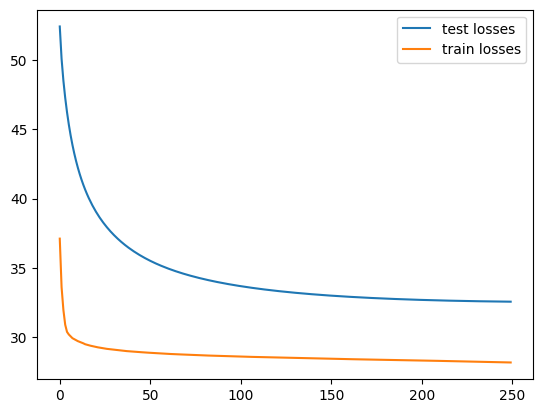

In [81]:
plt.plot(return_list['test_losses'],label = 'test losses')
plt.plot(return_list['train_losses'],label ="train losses")
plt.legend()
plt.show()

In [105]:
return_list['train_losses']

[37.11438548564911,
 33.61253410577774,
 31.96768468618393,
 30.897457122802734,
 30.379434406757355,
 30.18957594037056,
 30.057285457849503,
 29.92431989312172,
 29.853941589593887,
 29.78076535463333,
 29.710231840610504,
 29.65699279308319,
 29.600927025079727,
 29.55380427837372,
 29.488082498311996,
 29.44925957918167,
 29.413716465234756,
 29.379408091306686,
 29.348739594221115,
 29.316740572452545,
 29.28879678249359,
 29.264397710561752,
 29.241141110658646,
 29.21761864423752,
 29.197623640298843,
 29.172746658325195,
 29.153801411390305,
 29.138371109962463,
 29.11859494447708,
 29.103656202554703,
 29.08767631649971,
 29.07443517446518,
 29.059393167495728,
 29.043233811855316,
 29.027827501296997,
 29.016063421964645,
 29.004086524248123,
 28.99012663960457,
 28.979304015636444,
 28.968878388404846,
 28.958170861005783,
 28.94687584042549,
 28.938858300447464,
 28.930037140846252,
 28.92050039768219,
 28.911258816719055,
 28.904148787260056,
 28.894429624080658,
 28.88195

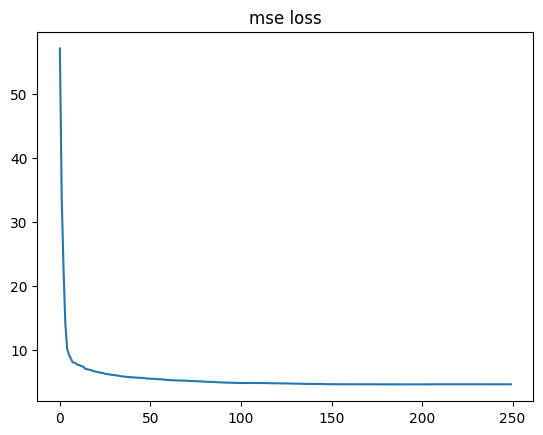

In [79]:
plt.plot(return_list['mse_losses'])
plt.title('mse loss')
plt.show()

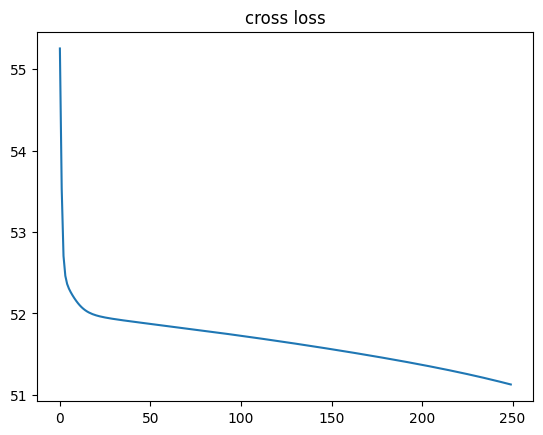

In [80]:
plt.plot(return_list['cross_losses'])
plt.title('cross loss')
plt.show()

In [29]:
# tokenizer = AutoTokenizer.from_pretrained("SALT-NLP/FLANG-BERT")
# model1_1 = AutoModelForMaskedLM.from_pretrained("SALT-NLP/FLANG-BERT")
# device = torch.device('mps')
# model1_1.to(device)
# optimizer = optim.AdamW(model1_1.parameters(), lr=5e-8)
# criterion = nn.CrossEntropyLoss()
# epochs = 10
# mse_lambda = 0.1 
# cross_lambda = 0.5

In [37]:
from sklearn.model_selection import TimeSeriesSplit
import torch

def time_series_cross_validation( dataloader, n_splits, optimizer, tokenizer, criterion, device, epochs, mse_lambda, cross_lambda, digit_predictor):
    dataset = dataloader.dataset
    tscv = TimeSeriesSplit(n_splits=n_splits)
    train_losses_list = []
    test_losses_list = []
    # 데이터셋의 인덱스 생성
    indices = list(range(len(dataset)))
    
    for train_idx, test_idx in tscv.split(indices):
        # 각 인덱스에 해당하는 DataLoader 생성
        train_subset = torch.utils.data.Subset(dataset, train_idx)
        test_subset = torch.utils.data.Subset(dataset, test_idx)

        train_dataloader = torch.utils.data.DataLoader(train_subset, batch_size=dataloader.batch_size, shuffle=False)
        test_dataloader = torch.utils.data.DataLoader(test_subset, batch_size=dataloader.batch_size, shuffle=False)
        
        # 모델 훈련과 평가
        train_losses, test_losses = train(train_dataloader, optimizer, tokenizer, criterion, device, epochs, mse_lambda, cross_lambda,digit_predictor,test_dataloader)
        train_losses_list.append(train_losses)
        test_losses_list.append(test_losses)
    return train_losses_list,test_losses_list

In [31]:
train_losses_list,test_losses_list = time_series_cross_validation(train_dataloader, 10, optimizer, tokenizer, criterion, device, epochs, mse_lambda, cross_lambda, digit_predictor)

Training Epoch 1: 100%|██████████| 8/8 [00:14<00:00,  1.84s/it]


Epoch 1 Train Loss: 3.5528250336647034


Evaluating: 100%|██████████| 8/8 [00:01<00:00,  4.11it/s]


Epoch 1 Test Loss: 0.47139114141464233


Training Epoch 2: 100%|██████████| 8/8 [00:14<00:00,  1.77s/it]


Epoch 2 Train Loss: 3.5551649034023285


Evaluating: 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]


Epoch 2 Test Loss: 0.4670632779598236


Training Epoch 3: 100%|██████████| 8/8 [00:14<00:00,  1.75s/it]


Epoch 3 Train Loss: 3.5458308160305023


Evaluating: 100%|██████████| 8/8 [00:01<00:00,  4.39it/s]


Epoch 3 Test Loss: 0.4625800848007202


Training Epoch 4: 100%|██████████| 8/8 [00:13<00:00,  1.74s/it]


Epoch 4 Train Loss: 3.5359006822109222


Evaluating: 100%|██████████| 8/8 [00:01<00:00,  4.36it/s]


Epoch 4 Test Loss: 0.45814162492752075


Training Epoch 5: 100%|██████████| 8/8 [00:14<00:00,  1.75s/it]


Epoch 5 Train Loss: 3.5230697095394135


Evaluating: 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]


Epoch 5 Test Loss: 0.45380836725234985


Training Epoch 6: 100%|██████████| 8/8 [00:13<00:00,  1.73s/it]


Epoch 6 Train Loss: 3.514227032661438


Evaluating: 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]


Epoch 6 Test Loss: 0.4496041238307953


Training Epoch 7: 100%|██████████| 8/8 [00:13<00:00,  1.73s/it]


Epoch 7 Train Loss: 3.502402275800705


Evaluating: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]


Epoch 7 Test Loss: 0.4455396234989166


Training Epoch 8: 100%|██████████| 8/8 [00:13<00:00,  1.75s/it]


Epoch 8 Train Loss: 3.488166242837906


Evaluating: 100%|██████████| 8/8 [00:01<00:00,  4.19it/s]


Epoch 8 Test Loss: 0.4416208863258362


Training Epoch 9: 100%|██████████| 8/8 [00:13<00:00,  1.75s/it]


Epoch 9 Train Loss: 3.465381383895874


Evaluating: 100%|██████████| 8/8 [00:01<00:00,  4.14it/s]


Epoch 9 Test Loss: 0.4378514289855957


Training Epoch 10: 100%|██████████| 8/8 [00:14<00:00,  1.75s/it]


Epoch 10 Train Loss: 3.4490703642368317


Evaluating: 100%|██████████| 8/8 [00:01<00:00,  4.19it/s]


Epoch 10 Test Loss: 0.4342343211174011


Training Epoch 1: 100%|██████████| 15/15 [00:30<00:00,  2.02s/it]


Epoch 1 Train Loss: 6.629001468420029


Evaluating: 100%|██████████| 8/8 [00:01<00:00,  4.01it/s]


Epoch 1 Test Loss: 0.4571339786052704


Training Epoch 2: 100%|██████████| 15/15 [00:32<00:00,  2.15s/it]


Epoch 2 Train Loss: 6.561948448419571


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.87it/s]


Epoch 2 Test Loss: 0.4487360417842865


Training Epoch 3: 100%|██████████| 15/15 [00:31<00:00,  2.09s/it]


Epoch 3 Train Loss: 6.529651969671249


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.26it/s]


Epoch 3 Test Loss: 0.4399809241294861


Training Epoch 4: 100%|██████████| 15/15 [00:29<00:00,  1.99s/it]


Epoch 4 Train Loss: 6.4870390594005585


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]


Epoch 4 Test Loss: 0.4317467510700226


Training Epoch 5: 100%|██████████| 15/15 [00:36<00:00,  2.40s/it]


Epoch 5 Train Loss: 6.422820419073105


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.97it/s]


Epoch 5 Test Loss: 0.4241690933704376


Training Epoch 6: 100%|██████████| 15/15 [00:29<00:00,  1.99s/it]


Epoch 6 Train Loss: 6.354558318853378


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.28it/s]


Epoch 6 Test Loss: 0.417246013879776


Training Epoch 7: 100%|██████████| 15/15 [00:28<00:00,  1.93s/it]


Epoch 7 Train Loss: 6.29342457652092


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]


Epoch 7 Test Loss: 0.41094836592674255


Training Epoch 8: 100%|██████████| 15/15 [00:29<00:00,  1.94s/it]


Epoch 8 Train Loss: 6.244307190179825


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.96it/s]


Epoch 8 Test Loss: 0.4052373766899109


Training Epoch 9: 100%|██████████| 15/15 [00:29<00:00,  1.98s/it]


Epoch 9 Train Loss: 6.207668781280518


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.26it/s]


Epoch 9 Test Loss: 0.40006256103515625


Training Epoch 10: 100%|██████████| 15/15 [00:28<00:00,  1.92s/it]


Epoch 10 Train Loss: 6.187197595834732


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.80it/s]


Epoch 10 Test Loss: 0.3953699469566345


Training Epoch 1: 100%|██████████| 22/22 [00:45<00:00,  2.09s/it]


Epoch 1 Train Loss: 9.718322306871414


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]


Epoch 1 Test Loss: 0.4368981420993805


Training Epoch 2: 100%|██████████| 22/22 [00:43<00:00,  1.96s/it]


Epoch 2 Train Loss: 9.645158559083939


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.87it/s]


Epoch 2 Test Loss: 0.4247588515281677


Training Epoch 3: 100%|██████████| 22/22 [00:44<00:00,  2.00s/it]


Epoch 3 Train Loss: 9.49684190750122


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.22it/s]


Epoch 3 Test Loss: 0.4138678312301636


Training Epoch 4: 100%|██████████| 22/22 [00:42<00:00,  1.94s/it]


Epoch 4 Train Loss: 9.351046353578568


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]


Epoch 4 Test Loss: 0.4047969579696655


Training Epoch 5: 100%|██████████| 22/22 [00:43<00:00,  1.96s/it]


Epoch 5 Train Loss: 9.225476145744324


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.82it/s]


Epoch 5 Test Loss: 0.39715659618377686


Training Epoch 6: 100%|██████████| 22/22 [00:43<00:00,  2.00s/it]


Epoch 6 Train Loss: 9.118779867887497


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]


Epoch 6 Test Loss: 0.390621542930603


Training Epoch 7: 100%|██████████| 22/22 [00:46<00:00,  2.12s/it]


Epoch 7 Train Loss: 9.055143296718597


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.61it/s]


Epoch 7 Test Loss: 0.3849489986896515


Training Epoch 8: 100%|██████████| 22/22 [00:44<00:00,  2.00s/it]


Epoch 8 Train Loss: 9.011023789644241


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]


Epoch 8 Test Loss: 0.3799557387828827


Training Epoch 9: 100%|██████████| 22/22 [00:48<00:00,  2.20s/it]


Epoch 9 Train Loss: 8.977247834205627


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  2.99it/s]


Epoch 9 Test Loss: 0.3755139112472534


Training Epoch 10: 100%|██████████| 22/22 [00:44<00:00,  2.04s/it]


Epoch 10 Train Loss: 8.950070351362228


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]


Epoch 10 Test Loss: 0.3715302646160126


Training Epoch 1: 100%|██████████| 29/29 [00:59<00:00,  2.06s/it]


Epoch 1 Train Loss: 12.651652306318283


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]


Epoch 1 Test Loss: 0.448381632566452


Training Epoch 2: 100%|██████████| 29/29 [03:00<00:00,  6.22s/it]


Epoch 2 Train Loss: 12.480956137180328


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]


Epoch 2 Test Loss: 0.4301632046699524


Training Epoch 3: 100%|██████████| 29/29 [01:32<00:00,  3.20s/it]


Epoch 3 Train Loss: 12.232303500175476


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]


Epoch 3 Test Loss: 0.41489049792289734


Training Epoch 4: 100%|██████████| 29/29 [01:00<00:00,  2.08s/it]


Epoch 4 Train Loss: 12.024028033018112


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]


Epoch 4 Test Loss: 0.4027511477470398


Training Epoch 5: 100%|██████████| 29/29 [00:58<00:00,  2.03s/it]


Epoch 5 Train Loss: 11.868743926286697


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]


Epoch 5 Test Loss: 0.39283448457717896


Training Epoch 6: 100%|██████████| 29/29 [00:57<00:00,  2.00s/it]


Epoch 6 Train Loss: 11.777744382619858


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]


Epoch 6 Test Loss: 0.38454052805900574


Training Epoch 7: 100%|██████████| 29/29 [00:58<00:00,  2.03s/it]


Epoch 7 Train Loss: 11.720189720392227


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  2.78it/s]


Epoch 7 Test Loss: 0.37746626138687134


Training Epoch 8: 100%|██████████| 29/29 [02:01<00:00,  4.19s/it]


Epoch 8 Train Loss: 11.67744517326355


Evaluating: 100%|██████████| 8/8 [00:03<00:00,  2.57it/s]


Epoch 8 Test Loss: 0.3713354766368866


Training Epoch 9: 100%|██████████| 29/29 [01:47<00:00,  3.69s/it]


Epoch 9 Train Loss: 11.646487176418304


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]


Epoch 9 Test Loss: 0.3659452199935913


Training Epoch 10: 100%|██████████| 29/29 [00:59<00:00,  2.05s/it]


Epoch 10 Train Loss: 11.615415632724762


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.25it/s]


Epoch 10 Test Loss: 0.36114028096199036


Training Epoch 1: 100%|██████████| 36/36 [01:52<00:00,  3.14s/it]


Epoch 1 Train Loss: 15.607511281967163


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]


Epoch 1 Test Loss: 0.46784764528274536


Training Epoch 2: 100%|██████████| 36/36 [02:33<00:00,  4.27s/it]


Epoch 2 Train Loss: 15.349928379058838


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.25it/s]


Epoch 2 Test Loss: 0.45021992921829224


Training Epoch 3: 100%|██████████| 36/36 [01:13<00:00,  2.06s/it]


Epoch 3 Train Loss: 14.954346001148224


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]


Epoch 3 Test Loss: 0.4362841248512268


Training Epoch 4: 100%|██████████| 36/36 [01:47<00:00,  3.00s/it]


Epoch 4 Train Loss: 14.666530430316925


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]


Epoch 4 Test Loss: 0.42551058530807495


Training Epoch 5: 100%|██████████| 36/36 [01:28<00:00,  2.46s/it]


Epoch 5 Train Loss: 14.508784741163254


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.54it/s]


Epoch 5 Test Loss: 0.416853666305542


Training Epoch 6: 100%|██████████| 36/36 [01:23<00:00,  2.31s/it]


Epoch 6 Train Loss: 14.421833515167236


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]


Epoch 6 Test Loss: 0.40973761677742004


Training Epoch 7: 100%|██████████| 36/36 [01:37<00:00,  2.72s/it]


Epoch 7 Train Loss: 14.358180284500122


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]


Epoch 7 Test Loss: 0.4037596583366394


Training Epoch 8: 100%|██████████| 36/36 [01:32<00:00,  2.58s/it]


Epoch 8 Train Loss: 14.309986263513565


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.71it/s]


Epoch 8 Test Loss: 0.3986279368400574


Training Epoch 9: 100%|██████████| 36/36 [01:34<00:00,  2.62s/it]


Epoch 9 Train Loss: 14.267903715372086


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]


Epoch 9 Test Loss: 0.3941435217857361


Training Epoch 10: 100%|██████████| 36/36 [01:13<00:00,  2.05s/it]


Epoch 10 Train Loss: 14.23408517241478


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.28it/s]


Epoch 10 Test Loss: 0.3901713788509369


Training Epoch 1: 100%|██████████| 43/43 [01:59<00:00,  2.77s/it]


Epoch 1 Train Loss: 18.72898444533348


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  2.80it/s]


Epoch 1 Test Loss: 0.42875775694847107


Training Epoch 2: 100%|██████████| 43/43 [02:58<00:00,  4.14s/it]


Epoch 2 Train Loss: 18.346558570861816


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  2.89it/s]


Epoch 2 Test Loss: 0.40529829263687134


Training Epoch 3: 100%|██████████| 43/43 [02:36<00:00,  3.65s/it]


Epoch 3 Train Loss: 17.855437099933624


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  2.88it/s]


Epoch 3 Test Loss: 0.3881620466709137


Training Epoch 4: 100%|██████████| 43/43 [03:19<00:00,  4.64s/it]


Epoch 4 Train Loss: 17.553089201450348


Evaluating: 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]


Epoch 4 Test Loss: 0.37564146518707275


Training Epoch 5: 100%|██████████| 43/43 [02:58<00:00,  4.14s/it]


Epoch 5 Train Loss: 17.410817176103592


Evaluating: 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]


Epoch 5 Test Loss: 0.36606675386428833


Training Epoch 6: 100%|██████████| 43/43 [04:24<00:00,  6.14s/it]


Epoch 6 Train Loss: 17.32296058535576


Evaluating: 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]


Epoch 6 Test Loss: 0.35852253437042236


Training Epoch 7: 100%|██████████| 43/43 [03:28<00:00,  4.85s/it]


Epoch 7 Train Loss: 17.2619426548481


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  2.96it/s]


Epoch 7 Test Loss: 0.3524007499217987


Training Epoch 8: 100%|██████████| 43/43 [03:20<00:00,  4.65s/it]


Epoch 8 Train Loss: 17.20843830704689


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]


Epoch 8 Test Loss: 0.3473009169101715


Training Epoch 9: 100%|██████████| 43/43 [04:34<00:00,  6.38s/it]


Epoch 9 Train Loss: 17.168311715126038


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]


Epoch 9 Test Loss: 0.3429650068283081


Training Epoch 10: 100%|██████████| 43/43 [04:50<00:00,  6.76s/it]


Epoch 10 Train Loss: 17.130050718784332


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]


Epoch 10 Test Loss: 0.33921757340431213


Training Epoch 1: 100%|██████████| 50/50 [05:33<00:00,  6.67s/it]


Epoch 1 Train Loss: 21.602978736162186


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]


Epoch 1 Test Loss: 0.43067875504493713


Training Epoch 2: 100%|██████████| 50/50 [02:23<00:00,  2.86s/it]


Epoch 2 Train Loss: 21.038936376571655


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  2.92it/s]


Epoch 2 Test Loss: 0.40588152408599854


Training Epoch 3: 100%|██████████| 50/50 [03:08<00:00,  3.77s/it]


Epoch 3 Train Loss: 20.3768070936203


Evaluating: 100%|██████████| 8/8 [00:01<00:00,  4.05it/s]


Epoch 3 Test Loss: 0.3891066014766693


Training Epoch 4: 100%|██████████| 50/50 [01:58<00:00,  2.37s/it]


Epoch 4 Train Loss: 20.063192009925842


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]


Epoch 4 Test Loss: 0.3771775960922241


Training Epoch 5: 100%|██████████| 50/50 [02:21<00:00,  2.84s/it]


Epoch 5 Train Loss: 19.92700931429863


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.15it/s]


Epoch 5 Test Loss: 0.3680794835090637


Training Epoch 6: 100%|██████████| 50/50 [01:46<00:00,  2.12s/it]


Epoch 6 Train Loss: 19.83511856198311


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]


Epoch 6 Test Loss: 0.36078646779060364


Training Epoch 7: 100%|██████████| 50/50 [01:49<00:00,  2.20s/it]


Epoch 7 Train Loss: 19.771771550178528


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.91it/s]


Epoch 7 Test Loss: 0.3547218441963196


Training Epoch 8: 100%|██████████| 50/50 [01:56<00:00,  2.33s/it]


Epoch 8 Train Loss: 19.721594840288162


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.62it/s]


Epoch 8 Test Loss: 0.34954071044921875


Training Epoch 9: 100%|██████████| 50/50 [01:49<00:00,  2.19s/it]


Epoch 9 Train Loss: 19.677152454853058


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.80it/s]


Epoch 9 Test Loss: 0.34502553939819336


Training Epoch 10: 100%|██████████| 50/50 [01:55<00:00,  2.31s/it]


Epoch 10 Train Loss: 19.6360744535923


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.56it/s]


Epoch 10 Test Loss: 0.3410310745239258


Training Epoch 1: 100%|██████████| 57/57 [02:54<00:00,  3.06s/it]


Epoch 1 Train Loss: 24.63891440629959


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.28it/s]


Epoch 1 Test Loss: 0.4075915813446045


Training Epoch 2: 100%|██████████| 57/57 [02:38<00:00,  2.78s/it]


Epoch 2 Train Loss: 23.787982553243637


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.20it/s]


Epoch 2 Test Loss: 0.3833243250846863


Training Epoch 3: 100%|██████████| 57/57 [01:59<00:00,  2.10s/it]


Epoch 3 Train Loss: 23.007817327976227


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.11it/s]


Epoch 3 Test Loss: 0.3683232069015503


Training Epoch 4: 100%|██████████| 57/57 [02:50<00:00,  2.99s/it]


Epoch 4 Train Loss: 22.69986265897751


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  2.95it/s]


Epoch 4 Test Loss: 0.3579616844654083


Training Epoch 5: 100%|██████████| 57/57 [02:42<00:00,  2.85s/it]


Epoch 5 Train Loss: 22.55766949057579


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.22it/s]


Epoch 5 Test Loss: 0.3500615060329437


Training Epoch 6: 100%|██████████| 57/57 [03:00<00:00,  3.16s/it]


Epoch 6 Train Loss: 22.461937367916107


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.18it/s]


Epoch 6 Test Loss: 0.34365367889404297


Training Epoch 7: 100%|██████████| 57/57 [05:38<00:00,  5.94s/it]


Epoch 7 Train Loss: 22.392992287874222


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  2.87it/s]


Epoch 7 Test Loss: 0.33824485540390015


Training Epoch 8: 100%|██████████| 57/57 [04:59<00:00,  5.25s/it]


Epoch 8 Train Loss: 22.337498009204865


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  2.90it/s]


Epoch 8 Test Loss: 0.3335590362548828


Training Epoch 9: 100%|██████████| 57/57 [04:33<00:00,  4.80s/it]


Epoch 9 Train Loss: 22.289796084165573


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.15it/s]


Epoch 9 Test Loss: 0.3294258415699005


Training Epoch 10: 100%|██████████| 57/57 [02:48<00:00,  2.96s/it]


Epoch 10 Train Loss: 22.251821875572205


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.20it/s]


Epoch 10 Test Loss: 0.3257312476634979


Training Epoch 1: 100%|██████████| 64/64 [07:49<00:00,  7.33s/it]


Epoch 1 Train Loss: 27.48782753944397


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  2.91it/s]


Epoch 1 Test Loss: 0.4342772960662842


Training Epoch 2: 100%|██████████| 64/64 [04:28<00:00,  4.20s/it]


Epoch 2 Train Loss: 26.39735174179077


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.18it/s]


Epoch 2 Test Loss: 0.4092749059200287


Training Epoch 3: 100%|██████████| 64/64 [03:46<00:00,  3.54s/it]


Epoch 3 Train Loss: 25.51811322569847


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.19it/s]


Epoch 3 Test Loss: 0.3936266601085663


Training Epoch 4: 100%|██████████| 64/64 [03:54<00:00,  3.66s/it]


Epoch 4 Train Loss: 25.223014444112778


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.17it/s]


Epoch 4 Test Loss: 0.3823074698448181


Training Epoch 5: 100%|██████████| 64/64 [02:57<00:00,  2.78s/it]


Epoch 5 Train Loss: 25.071458965539932


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.13it/s]


Epoch 5 Test Loss: 0.37331143021583557


Training Epoch 6: 100%|██████████| 64/64 [03:01<00:00,  2.84s/it]


Epoch 6 Train Loss: 24.972282737493515


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.21it/s]


Epoch 6 Test Loss: 0.36575642228126526


Training Epoch 7: 100%|██████████| 64/64 [02:45<00:00,  2.58s/it]


Epoch 7 Train Loss: 24.90125498175621


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.21it/s]


Epoch 7 Test Loss: 0.35920751094818115


Training Epoch 8: 100%|██████████| 64/64 [02:52<00:00,  2.69s/it]


Epoch 8 Train Loss: 24.8444584608078


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.17it/s]


Epoch 8 Test Loss: 0.353423535823822


Training Epoch 9: 100%|██████████| 64/64 [03:41<00:00,  3.46s/it]


Epoch 9 Train Loss: 24.7856382727623


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.14it/s]


Epoch 9 Test Loss: 0.3482532799243927


Training Epoch 10: 100%|██████████| 64/64 [03:28<00:00,  3.26s/it]


Epoch 10 Train Loss: 24.735065191984177


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.17it/s]


Epoch 10 Test Loss: 0.3435933589935303


Training Epoch 1: 100%|██████████| 71/71 [04:29<00:00,  3.79s/it]


Epoch 1 Train Loss: 30.467022091150284


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.82it/s]


Epoch 1 Test Loss: 0.40673282742500305


Training Epoch 2: 100%|██████████| 71/71 [02:21<00:00,  2.00s/it]


Epoch 2 Train Loss: 29.277537286281586


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.28it/s]


Epoch 2 Test Loss: 0.37659522891044617


Training Epoch 3: 100%|██████████| 71/71 [02:31<00:00,  2.13s/it]


Epoch 3 Train Loss: 28.397390335798264


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.80it/s]


Epoch 3 Test Loss: 0.3586571514606476


Training Epoch 4: 100%|██████████| 71/71 [02:54<00:00,  2.46s/it]


Epoch 4 Train Loss: 28.104728281497955


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.12it/s]


Epoch 4 Test Loss: 0.34619858860969543


Training Epoch 5: 100%|██████████| 71/71 [02:55<00:00,  2.48s/it]


Epoch 5 Train Loss: 27.936676144599915


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.25it/s]


Epoch 5 Test Loss: 0.3366473317146301


Training Epoch 6: 100%|██████████| 71/71 [02:53<00:00,  2.44s/it]


Epoch 6 Train Loss: 27.82586407661438


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.08it/s]


Epoch 6 Test Loss: 0.3289030194282532


Training Epoch 7: 100%|██████████| 71/71 [02:39<00:00,  2.24s/it]


Epoch 7 Train Loss: 27.73910564184189


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.27it/s]


Epoch 7 Test Loss: 0.32240989804267883


Training Epoch 8: 100%|██████████| 71/71 [03:12<00:00,  2.71s/it]


Epoch 8 Train Loss: 27.66488668322563


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]


Epoch 8 Test Loss: 0.3168443739414215


Training Epoch 9: 100%|██████████| 71/71 [02:55<00:00,  2.47s/it]


Epoch 9 Train Loss: 27.593403309583664


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]


Epoch 9 Test Loss: 0.3119974136352539


Training Epoch 10: 100%|██████████| 71/71 [02:42<00:00,  2.29s/it]


Epoch 10 Train Loss: 27.53010818362236


Evaluating: 100%|██████████| 8/8 [00:02<00:00,  3.27it/s]

Epoch 10 Test Loss: 0.3077234923839569


In [52]:
import torch
from sklearn.model_selection import train_test_split

def blocked_cross_validation(model_class, dataloader, n_blocks, optimizer_class, tokenizer, criterion, device, epochs, mse_lambda, cross_lambda, digit_predictor, test_size=0.2):
    dataset = dataloader.dataset
    n_samples = len(dataset)
    block_size = n_samples // n_blocks
    
    train_losses_list = []
    test_losses_list = []

    for i in range(n_blocks):
        start = i * block_size
        end = start + block_size
        if i == n_blocks - 1:
            end = n_samples
        
        # 현재 블록 데이터를 추출
        block_indices = list(range(start, end))
        
        # 블록 내에서 train과 test로 나누기
        block_train_indices, block_test_indices = train_test_split(
            block_indices, test_size=test_size, shuffle=False
        )

        train_subset = torch.utils.data.Subset(dataset, block_train_indices)
        test_subset = torch.utils.data.Subset(dataset, block_test_indices)

        train_dataloader = torch.utils.data.DataLoader(train_subset, batch_size=dataloader.batch_size, shuffle=True)
        test_dataloader = torch.utils.data.DataLoader(test_subset, batch_size=dataloader.batch_size, shuffle=False)

        # 새로운 모델과 옵티마이저 인스턴스 생성
        

        # 훈련 및 평가
        train_losses, test_losses = train(train_dataloader, optimizer, tokenizer, criterion, device, epochs, mse_lambda, cross_lambda, digit_predictor, test_dataloader)
      
        # 결과 저장
        train_losses_list.append(train_losses)
        test_losses_list.append(test_losses)

    return train_losses_list, test_losses_list

In [53]:
train_losses_list_block, test_losses_list_block = blocked_cross_validation(model1_1, train_dataloader, 10,optimizer, tokenizer, criterion, device, epochs, mse_lambda, cross_lambda, digit_predictor)

Training Epoch 1: 100%|██████████| 7/7 [00:48<00:00,  6.91s/it]


Epoch 1 Train Loss: 3.2091680765151978


Evaluating: 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]


Epoch 1 Test Loss: 0.11121267080307007


Training Epoch 2: 100%|██████████| 7/7 [01:02<00:00,  8.89s/it]


Epoch 2 Train Loss: 3.184882313013077


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]


Epoch 2 Test Loss: 0.11030413210391998


Training Epoch 3: 100%|██████████| 7/7 [01:02<00:00,  8.97s/it]


Epoch 3 Train Loss: 3.17048642039299


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]


Epoch 3 Test Loss: 0.1093379482626915


Training Epoch 4: 100%|██████████| 7/7 [01:02<00:00,  8.90s/it]


Epoch 4 Train Loss: 3.15410578250885


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]


Epoch 4 Test Loss: 0.10836472362279892


Training Epoch 5: 100%|██████████| 7/7 [01:00<00:00,  8.61s/it]


Epoch 5 Train Loss: 3.1082435250282288


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]


Epoch 5 Test Loss: 0.10745332390069962


Training Epoch 6: 100%|██████████| 7/7 [00:57<00:00,  8.17s/it]


Epoch 6 Train Loss: 3.1215951442718506


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]


Epoch 6 Test Loss: 0.10656105726957321


Training Epoch 7: 100%|██████████| 7/7 [01:00<00:00,  8.65s/it]


Epoch 7 Train Loss: 3.0751779973506927


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]


Epoch 7 Test Loss: 0.10573946684598923


Training Epoch 8: 100%|██████████| 7/7 [00:57<00:00,  8.14s/it]


Epoch 8 Train Loss: 3.0516436994075775


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]


Epoch 8 Test Loss: 0.1049618348479271


Training Epoch 9: 100%|██████████| 7/7 [01:01<00:00,  8.82s/it]


Epoch 9 Train Loss: 3.043070912361145


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]


Epoch 9 Test Loss: 0.10420568287372589


Training Epoch 10: 100%|██████████| 7/7 [01:06<00:00,  9.44s/it]


Epoch 10 Train Loss: 3.011379212141037


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]


Epoch 10 Test Loss: 0.10350888967514038


Training Epoch 1: 100%|██████████| 7/7 [01:08<00:00,  9.82s/it]


Epoch 1 Train Loss: 2.9776512384414673


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]


Epoch 1 Test Loss: 0.12818294763565063


Training Epoch 2: 100%|██████████| 7/7 [01:15<00:00, 10.73s/it]


Epoch 2 Train Loss: 2.9917185306549072


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]


Epoch 2 Test Loss: 0.12745890021324158


Training Epoch 3: 100%|██████████| 7/7 [01:10<00:00, 10.08s/it]


Epoch 3 Train Loss: 2.9695728421211243


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]


Epoch 3 Test Loss: 0.12649574875831604


Training Epoch 4: 100%|██████████| 7/7 [01:06<00:00,  9.56s/it]


Epoch 4 Train Loss: 2.943202316761017


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]


Epoch 4 Test Loss: 0.12540942430496216


Training Epoch 5: 100%|██████████| 7/7 [01:03<00:00,  9.02s/it]


Epoch 5 Train Loss: 2.957208752632141


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]


Epoch 5 Test Loss: 0.12413173913955688


Training Epoch 6: 100%|██████████| 7/7 [01:02<00:00,  8.90s/it]


Epoch 6 Train Loss: 2.956602990627289


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]


Epoch 6 Test Loss: 0.123072549700737


Training Epoch 7: 100%|██████████| 7/7 [01:14<00:00, 10.61s/it]


Epoch 7 Train Loss: 2.9451969861984253


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]


Epoch 7 Test Loss: 0.12192478030920029


Training Epoch 8: 100%|██████████| 7/7 [01:09<00:00,  9.93s/it]


Epoch 8 Train Loss: 2.905368983745575


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]


Epoch 8 Test Loss: 0.12065847963094711


Training Epoch 9: 100%|██████████| 7/7 [01:12<00:00, 10.42s/it]


Epoch 9 Train Loss: 2.8734822273254395


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]


Epoch 9 Test Loss: 0.11954513192176819


Training Epoch 10: 100%|██████████| 7/7 [01:11<00:00, 10.25s/it]


Epoch 10 Train Loss: 2.844021260738373


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]


Epoch 10 Test Loss: 0.11843680590391159


Training Epoch 1: 100%|██████████| 7/7 [01:11<00:00, 10.25s/it]


Epoch 1 Train Loss: 2.9795148074626923


Evaluating: 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]


Epoch 1 Test Loss: 0.10790934413671494


Training Epoch 2: 100%|██████████| 7/7 [01:06<00:00,  9.55s/it]


Epoch 2 Train Loss: 3.046755403280258


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]


Epoch 2 Test Loss: 0.1069420799612999


Training Epoch 3: 100%|██████████| 7/7 [01:17<00:00, 11.10s/it]


Epoch 3 Train Loss: 3.0129362046718597


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]


Epoch 3 Test Loss: 0.10600617527961731


Training Epoch 4: 100%|██████████| 7/7 [01:24<00:00, 12.05s/it]


Epoch 4 Train Loss: 2.9667921364307404


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]


Epoch 4 Test Loss: 0.1051325649023056


Training Epoch 5: 100%|██████████| 7/7 [01:18<00:00, 11.17s/it]


Epoch 5 Train Loss: 2.9317248165607452


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]


Epoch 5 Test Loss: 0.10433537513017654


Training Epoch 6: 100%|██████████| 7/7 [01:20<00:00, 11.44s/it]


Epoch 6 Train Loss: 2.857587367296219


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]


Epoch 6 Test Loss: 0.10359703004360199


Training Epoch 7: 100%|██████████| 7/7 [01:27<00:00, 12.52s/it]


Epoch 7 Train Loss: 2.877296596765518


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]


Epoch 7 Test Loss: 0.10290703922510147


Training Epoch 8: 100%|██████████| 7/7 [01:23<00:00, 11.87s/it]


Epoch 8 Train Loss: 2.7959116995334625


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]


Epoch 8 Test Loss: 0.10224485397338867


Training Epoch 9: 100%|██████████| 7/7 [01:23<00:00, 11.98s/it]


Epoch 9 Train Loss: 2.80238801240921


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]


Epoch 9 Test Loss: 0.10163577646017075


Training Epoch 10: 100%|██████████| 7/7 [01:25<00:00, 12.28s/it]


Epoch 10 Train Loss: 2.7434476017951965


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]


Epoch 10 Test Loss: 0.10103218257427216


Training Epoch 1: 100%|██████████| 7/7 [01:19<00:00, 11.37s/it]


Epoch 1 Train Loss: 3.031054377555847


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]


Epoch 1 Test Loss: 0.11474940180778503


Training Epoch 2: 100%|██████████| 7/7 [01:08<00:00,  9.77s/it]


Epoch 2 Train Loss: 3.0325278639793396


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]


Epoch 2 Test Loss: 0.11340834200382233


Training Epoch 3: 100%|██████████| 7/7 [01:20<00:00, 11.53s/it]


Epoch 3 Train Loss: 3.040470063686371


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]


Epoch 3 Test Loss: 0.11206972599029541


Training Epoch 4: 100%|██████████| 7/7 [01:21<00:00, 11.61s/it]


Epoch 4 Train Loss: 2.995190352201462


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]


Epoch 4 Test Loss: 0.11081904917955399


Training Epoch 5: 100%|██████████| 7/7 [01:20<00:00, 11.52s/it]


Epoch 5 Train Loss: 2.9253557324409485


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]


Epoch 5 Test Loss: 0.10963552445173264


Training Epoch 6: 100%|██████████| 7/7 [01:16<00:00, 10.92s/it]


Epoch 6 Train Loss: 2.9049013555049896


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]


Epoch 6 Test Loss: 0.10852833092212677


Training Epoch 7: 100%|██████████| 7/7 [01:16<00:00, 10.87s/it]


Epoch 7 Train Loss: 2.8692773580551147


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]


Epoch 7 Test Loss: 0.10748646408319473


Training Epoch 8: 100%|██████████| 7/7 [01:19<00:00, 11.38s/it]


Epoch 8 Train Loss: 2.789777100086212


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]


Epoch 8 Test Loss: 0.10649707168340683


Training Epoch 9: 100%|██████████| 7/7 [01:18<00:00, 11.23s/it]


Epoch 9 Train Loss: 2.8077624440193176


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]


Epoch 9 Test Loss: 0.10557040572166443


Training Epoch 10: 100%|██████████| 7/7 [01:22<00:00, 11.81s/it]


Epoch 10 Train Loss: 2.759253352880478


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]


Epoch 10 Test Loss: 0.10468588769435883


Training Epoch 1: 100%|██████████| 7/7 [01:21<00:00, 11.64s/it]


Epoch 1 Train Loss: 3.024935871362686


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]


Epoch 1 Test Loss: 0.11937353014945984


Training Epoch 2: 100%|██████████| 7/7 [01:08<00:00,  9.80s/it]


Epoch 2 Train Loss: 3.054201602935791


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]


Epoch 2 Test Loss: 0.11854963004589081


Training Epoch 3: 100%|██████████| 7/7 [01:13<00:00, 10.49s/it]


Epoch 3 Train Loss: 2.994007259607315


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]


Epoch 3 Test Loss: 0.11776405572891235


Training Epoch 4: 100%|██████████| 7/7 [01:22<00:00, 11.82s/it]


Epoch 4 Train Loss: 2.999423533678055


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]


Epoch 4 Test Loss: 0.11699960380792618


Training Epoch 5: 100%|██████████| 7/7 [01:19<00:00, 11.32s/it]


Epoch 5 Train Loss: 2.9564183056354523


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]


Epoch 5 Test Loss: 0.11631064862012863


Training Epoch 6: 100%|██████████| 7/7 [01:12<00:00, 10.34s/it]


Epoch 6 Train Loss: 2.8713296949863434


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]


Epoch 6 Test Loss: 0.11565366387367249


Training Epoch 7: 100%|██████████| 7/7 [01:19<00:00, 11.31s/it]


Epoch 7 Train Loss: 2.8764723539352417


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]


Epoch 7 Test Loss: 0.11505315452814102


Training Epoch 8: 100%|██████████| 7/7 [01:22<00:00, 11.83s/it]


Epoch 8 Train Loss: 2.8173916339874268


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]


Epoch 8 Test Loss: 0.11448385566473007


Training Epoch 9: 100%|██████████| 7/7 [01:21<00:00, 11.63s/it]


Epoch 9 Train Loss: 2.8017699122428894


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]


Epoch 9 Test Loss: 0.11395201086997986


Training Epoch 10: 100%|██████████| 7/7 [01:05<00:00,  9.40s/it]


Epoch 10 Train Loss: 2.7565956711769104


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]


Epoch 10 Test Loss: 0.11343972384929657


Training Epoch 1: 100%|██████████| 7/7 [01:22<00:00, 11.77s/it]


Epoch 1 Train Loss: 3.1793166399002075


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]


Epoch 1 Test Loss: 0.11169774830341339


Training Epoch 2: 100%|██████████| 7/7 [01:26<00:00, 12.36s/it]


Epoch 2 Train Loss: 3.180108070373535


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]


Epoch 2 Test Loss: 0.11046618223190308


Training Epoch 3: 100%|██████████| 7/7 [01:28<00:00, 12.60s/it]


Epoch 3 Train Loss: 3.1328257620334625


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]


Epoch 3 Test Loss: 0.10924141108989716


Training Epoch 4: 100%|██████████| 7/7 [01:25<00:00, 12.28s/it]


Epoch 4 Train Loss: 3.0954533517360687


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]


Epoch 4 Test Loss: 0.10806775838136673


Training Epoch 5: 100%|██████████| 7/7 [01:22<00:00, 11.82s/it]


Epoch 5 Train Loss: 3.082463949918747


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]


Epoch 5 Test Loss: 0.10696283727884293


Training Epoch 6: 100%|██████████| 7/7 [01:18<00:00, 11.15s/it]


Epoch 6 Train Loss: 3.053025245666504


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]


Epoch 6 Test Loss: 0.10591369867324829


Training Epoch 7: 100%|██████████| 7/7 [01:11<00:00, 10.25s/it]


Epoch 7 Train Loss: 3.015420436859131


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]


Epoch 7 Test Loss: 0.10492874681949615


Training Epoch 8: 100%|██████████| 7/7 [01:07<00:00,  9.64s/it]


Epoch 8 Train Loss: 3.0126217901706696


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]


Epoch 8 Test Loss: 0.1040075495839119


Training Epoch 9: 100%|██████████| 7/7 [01:07<00:00,  9.58s/it]


Epoch 9 Train Loss: 2.972391813993454


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]


Epoch 9 Test Loss: 0.10312540829181671


Training Epoch 10: 100%|██████████| 7/7 [01:06<00:00,  9.43s/it]


Epoch 10 Train Loss: 2.929801285266876


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]


Epoch 10 Test Loss: 0.10229112952947617


Training Epoch 1: 100%|██████████| 7/7 [01:17<00:00, 11.05s/it]


Epoch 1 Train Loss: 3.044527232646942


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]


Epoch 1 Test Loss: 0.11713223159313202


Training Epoch 2: 100%|██████████| 7/7 [01:25<00:00, 12.25s/it]


Epoch 2 Train Loss: 3.1231662034988403


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]


Epoch 2 Test Loss: 0.11553206294775009


Training Epoch 3: 100%|██████████| 7/7 [01:25<00:00, 12.17s/it]


Epoch 3 Train Loss: 3.1003445386886597


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]


Epoch 3 Test Loss: 0.11390230059623718


Training Epoch 4: 100%|██████████| 7/7 [01:22<00:00, 11.74s/it]


Epoch 4 Train Loss: 3.0733315348625183


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]


Epoch 4 Test Loss: 0.11233927309513092


Training Epoch 5: 100%|██████████| 7/7 [01:14<00:00, 10.71s/it]


Epoch 5 Train Loss: 3.0153788626194


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]


Epoch 5 Test Loss: 0.11087977886199951


Training Epoch 6: 100%|██████████| 7/7 [01:07<00:00,  9.67s/it]


Epoch 6 Train Loss: 2.979719042778015


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]


Epoch 6 Test Loss: 0.10953542590141296


Training Epoch 7: 100%|██████████| 7/7 [01:10<00:00, 10.12s/it]


Epoch 7 Train Loss: 2.9181751906871796


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]


Epoch 7 Test Loss: 0.10826708376407623


Training Epoch 8: 100%|██████████| 7/7 [01:15<00:00, 10.82s/it]


Epoch 8 Train Loss: 2.932396739721298


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]


Epoch 8 Test Loss: 0.10703389346599579


Training Epoch 9: 100%|██████████| 7/7 [01:11<00:00, 10.28s/it]


Epoch 9 Train Loss: 2.9064981341362


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]


Epoch 9 Test Loss: 0.10590268671512604


Training Epoch 10: 100%|██████████| 7/7 [01:06<00:00,  9.45s/it]


Epoch 10 Train Loss: 2.878023386001587


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]


Epoch 10 Test Loss: 0.10485580563545227


Training Epoch 1: 100%|██████████| 7/7 [01:16<00:00, 10.98s/it]


Epoch 1 Train Loss: 3.0077850222587585


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]


Epoch 1 Test Loss: 0.10309948027133942


Training Epoch 2: 100%|██████████| 7/7 [01:10<00:00, 10.11s/it]


Epoch 2 Train Loss: 3.041508734226227


Evaluating: 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]


Epoch 2 Test Loss: 0.10181552171707153


Training Epoch 3: 100%|██████████| 7/7 [01:10<00:00, 10.09s/it]


Epoch 3 Train Loss: 2.991460472345352


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]


Epoch 3 Test Loss: 0.10057695209980011


Training Epoch 4: 100%|██████████| 7/7 [01:09<00:00,  9.99s/it]


Epoch 4 Train Loss: 2.9391923546791077


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]


Epoch 4 Test Loss: 0.0994235947728157


Training Epoch 5: 100%|██████████| 7/7 [01:06<00:00,  9.48s/it]


Epoch 5 Train Loss: 2.87907874584198


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]


Epoch 5 Test Loss: 0.09834960103034973


Training Epoch 6: 100%|██████████| 7/7 [01:12<00:00, 10.33s/it]


Epoch 6 Train Loss: 2.890667200088501


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]


Epoch 6 Test Loss: 0.09734468907117844


Training Epoch 7: 100%|██████████| 7/7 [01:07<00:00,  9.60s/it]


Epoch 7 Train Loss: 2.8585464656352997


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]


Epoch 7 Test Loss: 0.09642267972230911


Training Epoch 8: 100%|██████████| 7/7 [01:02<00:00,  8.99s/it]


Epoch 8 Train Loss: 2.8050733506679535


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]


Epoch 8 Test Loss: 0.0955686941742897


Training Epoch 9: 100%|██████████| 7/7 [01:20<00:00, 11.56s/it]


Epoch 9 Train Loss: 2.8040093779563904


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]


Epoch 9 Test Loss: 0.09477663040161133


Training Epoch 10: 100%|██████████| 7/7 [01:08<00:00,  9.82s/it]


Epoch 10 Train Loss: 2.7578664422035217


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]


Epoch 10 Test Loss: 0.0940399318933487


Training Epoch 1: 100%|██████████| 7/7 [01:10<00:00, 10.05s/it]


Epoch 1 Train Loss: 3.138650804758072


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]


Epoch 1 Test Loss: 0.12664327025413513


Training Epoch 2: 100%|██████████| 7/7 [01:06<00:00,  9.51s/it]


Epoch 2 Train Loss: 3.1557416319847107


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]


Epoch 2 Test Loss: 0.12551838159561157


Training Epoch 3: 100%|██████████| 7/7 [01:02<00:00,  8.94s/it]


Epoch 3 Train Loss: 3.1225343346595764


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]


Epoch 3 Test Loss: 0.12435255944728851


Training Epoch 4: 100%|██████████| 7/7 [01:07<00:00,  9.70s/it]


Epoch 4 Train Loss: 3.09916415810585


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]


Epoch 4 Test Loss: 0.12324777245521545


Training Epoch 5: 100%|██████████| 7/7 [01:12<00:00, 10.37s/it]


Epoch 5 Train Loss: 3.061551958322525


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]


Epoch 5 Test Loss: 0.12221193313598633


Training Epoch 6: 100%|██████████| 7/7 [01:04<00:00,  9.27s/it]


Epoch 6 Train Loss: 3.017602652311325


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]


Epoch 6 Test Loss: 0.12123618274927139


Training Epoch 7: 100%|██████████| 7/7 [01:05<00:00,  9.39s/it]


Epoch 7 Train Loss: 2.9697274267673492


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]


Epoch 7 Test Loss: 0.12033675611019135


Training Epoch 8: 100%|██████████| 7/7 [01:09<00:00,  9.92s/it]


Epoch 8 Train Loss: 2.9533510208129883


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]


Epoch 8 Test Loss: 0.11951509118080139


Training Epoch 9: 100%|██████████| 7/7 [01:11<00:00, 10.18s/it]


Epoch 9 Train Loss: 2.925395131111145


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]


Epoch 9 Test Loss: 0.11874224245548248


Training Epoch 10: 100%|██████████| 7/7 [01:08<00:00,  9.78s/it]


Epoch 10 Train Loss: 2.9677859246730804


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]


Epoch 10 Test Loss: 0.11804625391960144


Training Epoch 1: 100%|██████████| 7/7 [01:15<00:00, 10.77s/it]


Epoch 1 Train Loss: 3.0203830003738403


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]


Epoch 1 Test Loss: 0.10367084294557571


Training Epoch 2: 100%|██████████| 7/7 [01:12<00:00, 10.37s/it]


Epoch 2 Train Loss: 3.0536756217479706


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]


Epoch 2 Test Loss: 0.10217295587062836


Training Epoch 3: 100%|██████████| 7/7 [01:16<00:00, 10.87s/it]


Epoch 3 Train Loss: 2.993732362985611


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]


Epoch 3 Test Loss: 0.1007288247346878


Training Epoch 4: 100%|██████████| 7/7 [01:14<00:00, 10.68s/it]


Epoch 4 Train Loss: 2.971413493156433


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]


Epoch 4 Test Loss: 0.09936323761940002


Training Epoch 5: 100%|██████████| 7/7 [01:16<00:00, 10.89s/it]


Epoch 5 Train Loss: 2.9202525317668915


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]


Epoch 5 Test Loss: 0.09806221723556519


Training Epoch 6: 100%|██████████| 7/7 [01:17<00:00, 11.13s/it]


Epoch 6 Train Loss: 2.9120419919490814


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]


Epoch 6 Test Loss: 0.09684334695339203


Training Epoch 7: 100%|██████████| 7/7 [01:14<00:00, 10.60s/it]


Epoch 7 Train Loss: 2.878130257129669


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]


Epoch 7 Test Loss: 0.09569629281759262


Training Epoch 8: 100%|██████████| 7/7 [01:18<00:00, 11.17s/it]


Epoch 8 Train Loss: 2.8255501687526703


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]


Epoch 8 Test Loss: 0.09461931884288788


Training Epoch 9: 100%|██████████| 7/7 [01:15<00:00, 10.75s/it]


Epoch 9 Train Loss: 2.7855304479599


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]


Epoch 9 Test Loss: 0.09361223876476288


Training Epoch 10: 100%|██████████| 7/7 [01:15<00:00, 10.72s/it]


Epoch 10 Train Loss: 2.760297656059265


Evaluating: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]


Epoch 10 Test Loss: 0.09266039729118347


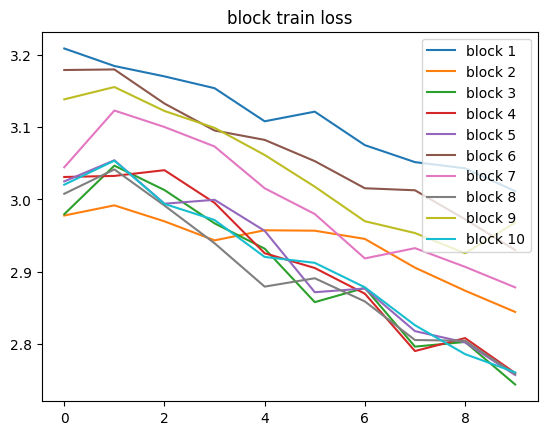

In [80]:
for index,i in enumerate(train_losses_list_block):
    plt.plot(i,label= f"block {index+1}")
plt.title('block train loss')
plt.legend()

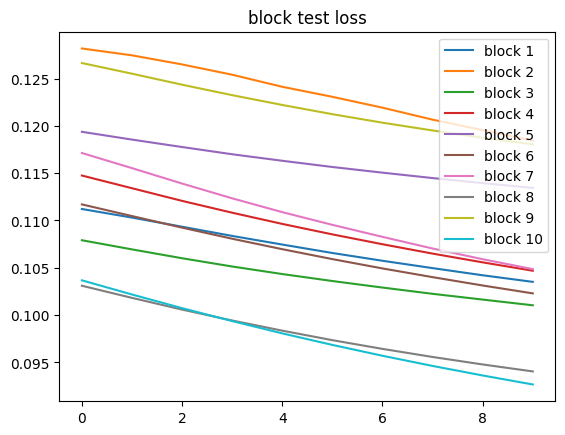

In [78]:
for index,i in enumerate(test_losses_list_block):
    plt.plot(i,label= f"block {index+1}")
plt.title('block test loss')
plt.legend()

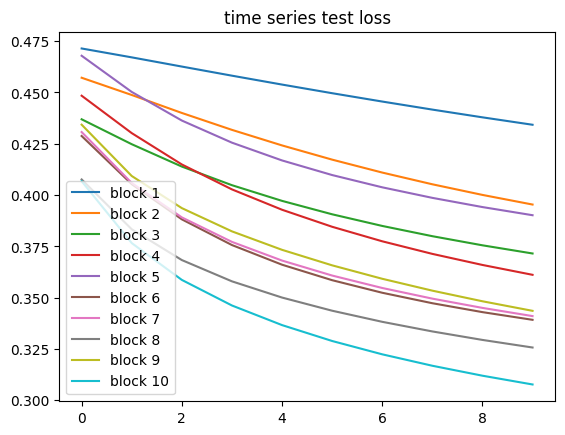

In [69]:
for index,i in enumerate(test_losses_list):
    plt.plot(i,label= f"block {index+1}")
plt.title('time series test loss')
plt.legend()

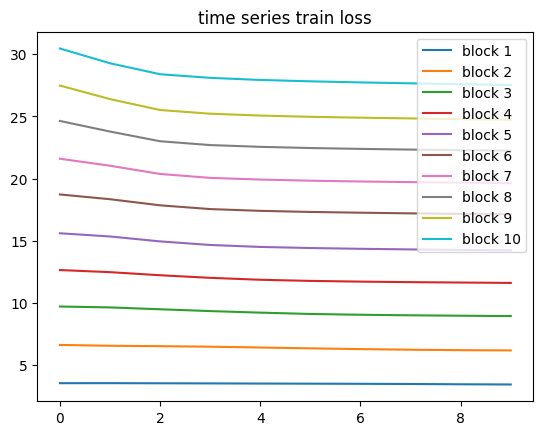

In [68]:
for index,i in enumerate(train_losses_list):
    plt.plot(i,label= f"block {index+1}")
plt.title('time series train loss')
plt.legend()

In [92]:
import itertools
import torch
import torch.nn.functional as F
import numpy as np
from transformers import AutoTokenizer, AutoModelForMaskedLM, AdamW
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tqdm import tqdm

class model_base:
    def __init__(self, model, tokenizer, device='mps'):
        self.model = model
        self.tokenizer = tokenizer
        self.device = device
        self.model.to(device)
    
    def convert_tokens_to_value(self, tokens):
        
        try:
            increase_or_decrease = tokens[0]
            integer_part = int(tokens[1])
            decimal_part = int(tokens[2])
            value = integer_part + decimal_part / 100.0
            if increase_or_decrease == 'negative':
                value = -value
            return value
        except:
            return 100
    def extract_true_value(self, true_label):
        true_label_tokens = true_label.split()
        increase_or_decrease = true_label_tokens[-6]
        integer_part = int(true_label_tokens[-4])
        decimal_part = int(true_label_tokens[-2])
        true_value = integer_part + decimal_part / 100.0
        if increase_or_decrease == 'negative':
            true_value = -true_value
        return true_value

    def calculate_mse(self, predicted_tokens, true_label):
        predicted_value = self.convert_tokens_to_value(predicted_tokens)
        true_value = self.convert_tokens_to_value(true_label)
        # except:
        #     true_value = self.convert_tokens_to_value(true_label)
        mse = mean_squared_error([true_value], [predicted_value])
        return mse, predicted_value, true_value

    def calculate_return(self, data):
        return sum(data) / len(data)

    def calculate_cumulative_returns(self, returns):
        return np.cumsum(returns)

    def predict_masked_token(self, input_ids, attention_mask, top_n=7):
        self.model.eval()

        with torch.no_grad():
            outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits

        mask_token_indices = (input_ids == self.tokenizer.mask_token_id).nonzero(as_tuple=True)[1]

        probabilities = []
        tokens = []
        for idx in mask_token_indices:
            mask_logits = logits[0, idx, :]
            mask_probs = F.softmax(mask_logits, dim=-1)
            top_probs, top_indices = torch.topk(mask_probs, top_n)
            probabilities.append(top_probs.tolist())
            tokens.append(self.tokenizer.convert_ids_to_tokens(top_indices))

        combinations = list(itertools.product(*tokens))
        combination_probs = []

        for combo in combinations:
            prob = 1
            for i, token in enumerate(combo):
                token_idx = tokens[i].index(token)
                prob *= probabilities[i][token_idx]
            combination_probs.append((combo, prob))

        combination_probs.sort(key=lambda x: x[1], reverse=True)

        return combination_probs[:5], list(zip(tokens, probabilities))

    def fill_mask_with_top_combinations(self, input_ids, top_combinations):
        
        mask_token_indices = (input_ids == self.tokenizer.mask_token_id).nonzero(as_tuple=True)[1]
        #mask_token_indices = [i for i, token in enumerate(input_ids) if token == self.tokenizer.mask_token_id]
        filled_sentences = []

        for combination in top_combinations:
            
            tokens = combination[0]
        
            filled_sentence_ids = input_ids[:]
           
            for idx, mask_idx in enumerate(mask_token_indices):
        
                filled_sentence_ids[0,mask_idx] = self.tokenizer.convert_tokens_to_ids(tokens[idx])
            filled_sentence_ids = filled_sentence_ids.tolist()
            filled_sentence = self.tokenizer.decode(filled_sentence_ids[0], skip_special_tokens=True)
            filled_sentences.append(filled_sentence)

        return filled_sentences

    def evaluate(self, test_dataloader,top5):
        mse_total = 0
        start_value_predict = 1
        start_value_true = 1
        predict_value_list = []
        true_value_list = []
        mse_list = []
        top_combinations_list = []
        filled_sentences_list = []
        predict_cum_list = []
        true_cum_list = []
        predict_list = []
        count = 0
        for batch in tqdm(test_dataloader, desc="Evaluating"):
            input_ids, attention_mask, label = [x.to(self.device) for x in batch]
            input_ids_copy = input_ids.clone()

            top_combinations, individual_probs = self.predict_masked_token(input_ids,attention_mask)
            top_combinations_list.append(top_combinations)
            predicted_token = top_combinations[0][0]  # 가장 높은 확률 조합 사용
            
            
            filled_sentences = self.fill_mask_with_top_combinations(input_ids, top_combinations[:5])
            filled_sentences_list.append(filled_sentences)
            
            mask_token_indices = (input_ids_copy == self.tokenizer.mask_token_id).nonzero(as_tuple=True)
            
            count += 1
            label_l= tokenizer.decode(label[mask_token_indices])
            true_label_tokens = label_l.split()
            mse = 0
            predicted_value = 0
            true_value = 0
            if top5:
                for i in range(5):
                    mse_1, predicted_value_1, true_value_1 = self.calculate_mse(top_combinations[i][0] , true_label_tokens)
                    mse +=mse_1
                    predicted_value += predicted_value_1
                    true_value += true_value_1
                mse = mse/5
                predicted_value = predicted_value/5
                true_value = true_value/5
                mse_total += mse *0.01
                start_value_predict *= (1 + predicted_value * 0.01)
                start_value_true *= (1 + true_value * 0.01)
                true_cum_list.append(start_value_true)
                predict_cum_list.append(start_value_predict)
                mse_list.append(mse_total)
                predict_value_list.append(predicted_value)
                true_value_list.append(true_value)
            else:
                mse, predicted_value, true_value = self.calculate_mse(top_combinations[0][0] , true_label_tokens)
                mse_total += mse *0.01
                start_value_predict *= (1 + predicted_value * 0.01)
                start_value_true *= (1 + true_value * 0.01)
                true_cum_list.append(start_value_true)
                predict_cum_list.append(start_value_predict)
                mse_list.append(mse_total)
                predict_value_list.append(predicted_value)
                true_value_list.append(true_value)
        
        return {
            "mse_total": mse_total,
            "true_value_list": true_value_list,
            "predict_value_list": predict_value_list,
            "mse_list": mse_list,
            "top_combinations_list": top_combinations_list,
            "filled_sentences_list": filled_sentences_list,
            "predict_cum_list":predict_cum_list,
            "true_cum_list":true_cum_list,
            'predict_list':predict_list
        }

    def convert_top1_to_value(self, top5_combinations):
        if top5_combinations:
            top1_combination = top5_combinations[0][0]  # 첫 번째 조합의 토큰들
            increase_or_decrease = top1_combination[0]
            integer_part = int(top1_combination[1])
            decimal_part = int(top1_combination[2])
            value = integer_part + decimal_part / 100.0
            if increase_or_decrease == 'decrease':
                value = -value
        return value

    def plot_cumulative_returns(self, true_value_list, predict_value_list, mse_list):
        plt.figure(figsize=(12, 6))
        plt.plot(true_value_list, label='True Cumulative Returns')
        plt.plot(predict_value_list, label='Predicted Cumulative Returns', linestyle='--')
        plt.plot(mse_list, label='Cumulative MSE', linestyle='-.')
        plt.xlabel('Time')
        plt.ylabel('Cumulative Returns')
        plt.title('True vs Predicted Cumulative Returns')
        plt.legend()
        plt.show()

    

# Example usage


In [93]:
import itertools
import torch
import torch.nn.functional as F
import numpy as np
from transformers import AutoTokenizer, AutoModelForMaskedLM, AdamW
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tqdm import tqdm

class model_base_PW:
    def __init__(self, model, tokenizer, device='mps'):
        self.model = model
        self.tokenizer = tokenizer
        self.device = device
        self.model.to(device)
    
    def convert_tokens_to_value(self, tokens):
        
        try:
            increase_or_decrease = tokens[0]
            integer_part = int(tokens[1])
            decimal_part = int(tokens[2])
            value = integer_part + decimal_part / 100.0
            if increase_or_decrease == 'negative':
                value = -value
            return value
        except:
            return 100
    def extract_true_value(self, true_label):
        true_label_tokens = true_label.split()
        increase_or_decrease = true_label_tokens[-6]
        integer_part = int(true_label_tokens[-4])
        decimal_part = int(true_label_tokens[-2])
        true_value = integer_part + decimal_part / 100.0
        if increase_or_decrease == 'negative':
            true_value = -true_value
        return true_value

    def calculate_mse(self, predicted_tokens, true_label):
        predicted_value = self.convert_tokens_to_value(predicted_tokens)
        true_value = self.convert_tokens_to_value(true_label)
        # except:
        #     true_value = self.convert_tokens_to_value(true_label)
        mse = mean_squared_error([true_value], [predicted_value])
        return mse, predicted_value, true_value

    def calculate_return(self, data):
        return sum(data) / len(data)

    def calculate_cumulative_returns(self, returns):
        return np.cumsum(returns)

    def predict_masked_token(self, input_ids, attention_mask, top_n=7):
        self.model.eval()

        with torch.no_grad():
            outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits

        mask_token_indices = (input_ids == self.tokenizer.mask_token_id).nonzero(as_tuple=True)[1]

        probabilities = []
        tokens = []
        for idx in mask_token_indices:
            mask_logits = logits[0, idx, :]
            mask_probs = F.softmax(mask_logits, dim=-1)
            top_probs, top_indices = torch.topk(mask_probs, top_n)
            probabilities.append(top_probs.tolist())
            tokens.append(self.tokenizer.convert_ids_to_tokens(top_indices))

        combinations = list(itertools.product(*tokens))
        combination_probs = []

        for combo in combinations:
            prob = 1
            for i, token in enumerate(combo):
                token_idx = tokens[i].index(token)
                prob *= probabilities[i][token_idx]
            combination_probs.append((combo, prob))

        combination_probs.sort(key=lambda x: x[1], reverse=True)

        return combination_probs[:5], list(zip(tokens, probabilities))

    def fill_mask_with_top_combinations(self, input_ids, top_combinations):
        
        mask_token_indices = (input_ids == self.tokenizer.mask_token_id).nonzero(as_tuple=True)[1]
        #mask_token_indices = [i for i, token in enumerate(input_ids) if token == self.tokenizer.mask_token_id]
        filled_sentences = []

        for combination in top_combinations:
            
            tokens = combination[0]
        
            filled_sentence_ids = input_ids[:]
           
            for idx, mask_idx in enumerate(mask_token_indices):
        
                filled_sentence_ids[0,mask_idx] = self.tokenizer.convert_tokens_to_ids(tokens[idx])
            filled_sentence_ids = filled_sentence_ids.tolist()
            filled_sentence = self.tokenizer.decode(filled_sentence_ids[0], skip_special_tokens=True)
            filled_sentences.append(filled_sentence)

        return filled_sentences

    def evaluate(self, test_dataloader,top5):
        mse_total = 0
        start_value_predict = 1
        start_value_true = 1
        predict_value_list = []
        true_value_list = []
        mse_list = []
        top_combinations_list = []
        filled_sentences_list = []
        predict_cum_list = []
        true_cum_list = []
        predict_list = []
        count = 0
        for batch in tqdm(test_dataloader, desc="Evaluating"):
            input_ids, attention_mask, label = [x.to(self.device) for x in batch]
            input_ids_copy = input_ids.clone()

            top_combinations, individual_probs = self.predict_masked_token(input_ids,attention_mask)
            top_combinations_list.append(top_combinations)
            predicted_token = top_combinations[0][0]  # 가장 높은 확률 조합 사용
        

            filled_sentences = self.fill_mask_with_top_combinations(input_ids, top_combinations[:5])
            filled_sentences_list.append(filled_sentences)
            
            mask_token_indices = (input_ids_copy == self.tokenizer.mask_token_id).nonzero(as_tuple=True)
            
            count += 1
            label_l= tokenizer.decode(label[mask_token_indices])
            true_label_tokens = label_l.split()
            mse = 0
            predicted_value = 0
            true_value = 0
            total_prob = 0
            if top5:
                for i in range(5):
                    mse_1, predicted_value_1, true_value_1 = self.calculate_mse(top_combinations[i][0] , true_label_tokens)
                    mse +=mse_1
                    
                    predicted_value += predicted_value_1*top_combinations[i][1]
                    total_prob += top_combinations[i][1]
                    true_value += true_value_1
                mse = mse/5
                predicted_value = predicted_value/total_prob
                true_value = true_value/5
                mse_total += mse *0.01
                start_value_predict *= (1 + predicted_value * 0.01)
                start_value_true *= (1 + true_value * 0.01)
                true_cum_list.append(start_value_true)
                predict_cum_list.append(start_value_predict)
                mse_list.append(mse_total)
                predict_value_list.append(predicted_value)
                true_value_list.append(true_value)
            else:
                mse, predicted_value, true_value = self.calculate_mse(top_combinations[0][0] , true_label_tokens)
                mse_total += mse *0.01
                start_value_predict *= (1 + predicted_value * 0.01)
                start_value_true *= (1 + true_value * 0.01)
                true_cum_list.append(start_value_true)
                predict_cum_list.append(start_value_predict)
                mse_list.append(mse_total)
                predict_value_list.append(predicted_value)
                true_value_list.append(true_value)
        
        return {
            "mse_total": mse_total,
            "true_value_list": true_value_list,
            "predict_value_list": predict_value_list,
            "mse_list": mse_list,
            "top_combinations_list": top_combinations_list,
            "filled_sentences_list": filled_sentences_list,
            "predict_cum_list":predict_cum_list,
            "true_cum_list":true_cum_list,
            'predict_list':predict_list
        }

    def convert_top1_to_value(self, top5_combinations):
        if top5_combinations:
            top1_combination = top5_combinations[0][0]  # 첫 번째 조합의 토큰들
            increase_or_decrease = top1_combination[0]
            integer_part = int(top1_combination[1])
            decimal_part = int(top1_combination[2])
            value = integer_part + decimal_part / 100.0
            if increase_or_decrease == 'decrease':
                value = -value
        return value

    def plot_cumulative_returns(self, true_value_list, predict_value_list, mse_list):
        plt.figure(figsize=(12, 6))
        plt.plot(true_value_list, label='True Cumulative Returns')
        plt.plot(predict_value_list, label='Predicted Cumulative Returns', linestyle='--')
        plt.plot(mse_list, label='Cumulative MSE', linestyle='-.')
        plt.xlabel('Time')
        plt.ylabel('Cumulative Returns')
        plt.title('True vs Predicted Cumulative Returns')
        plt.legend()
        plt.show()

    

# Example usage


In [94]:
train_dataloader = DataLoader(train_dataset, shuffle=False)

In [95]:
predictor = model_base(model1_1, tokenizer, device)

Evaluating: 100%|██████████| 1169/1169 [00:45<00:00, 25.76it/s]


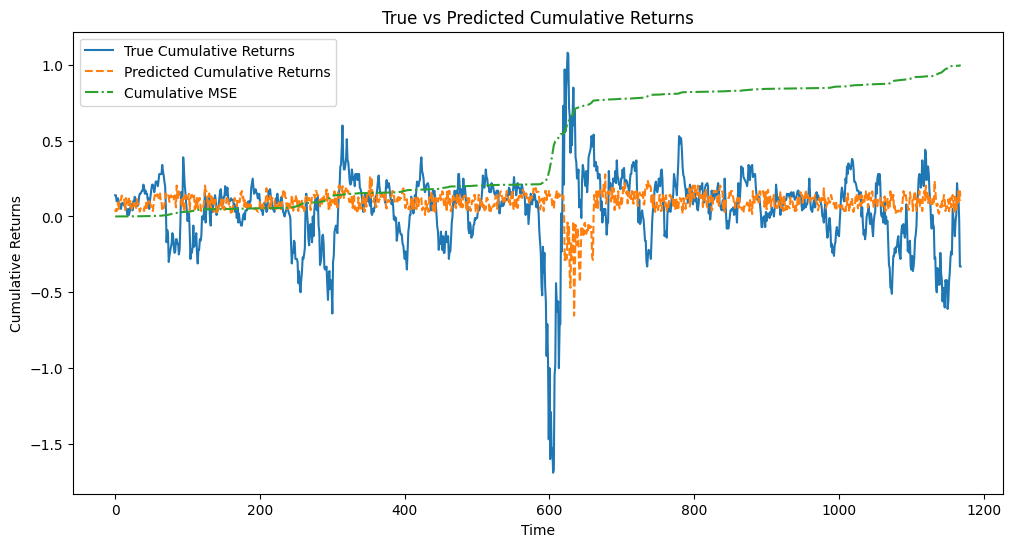

In [96]:
results1_1= predictor.evaluate(test_dataloader,1)
predictor.plot_cumulative_returns(results1_1["true_value_list"], results1_1["predict_value_list"], results1_1["mse_list"])

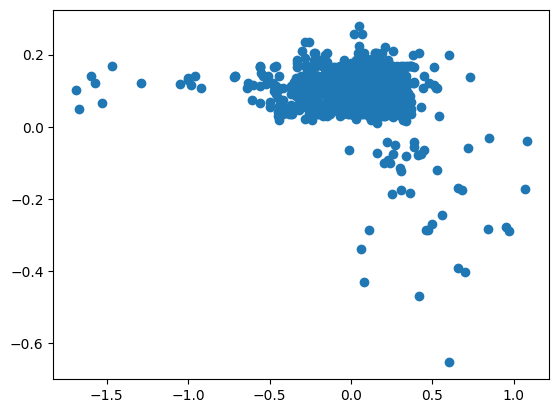

In [97]:
plt.scatter(results1_1["true_value_list"], results1_1["predict_value_list"])

In [98]:
mean_squared_error(results1_1["true_value_list"], results1_1["predict_value_list"])

0.08368628913601368

In [99]:
def convert_plus_minus(list):
    convert_list = []
    for i in list:
        if i >0:
            convert_list.append(1)
        else:
            convert_list.append(0)
    return np.array(convert_list)

def correct_ratio(list1,list2):
    array1= convert_plus_minus(list1)
    array2 = convert_plus_minus(list2)
    ratio = sum((array1-array2) == 0)/len(array1)
    array3 = array1 - array2
    return abs(array3), ratio



(array([359.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 810.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

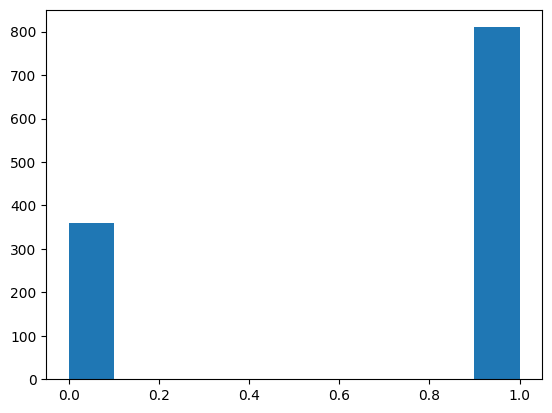

In [100]:
plt.hist(convert_plus_minus(results1_1["true_value_list"]))

In [101]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_true = convert_plus_minus(results1_1["true_value_list"])
confusion_predict = convert_plus_minus(results1_1['predict_value_list'])

In [102]:
conf_matrix = confusion_matrix(confusion_true, confusion_predict)
class_report = classification_report(confusion_true,confusion_predict)

In [103]:
import torch.nn as nn

Confusion Matrix:
[[  1 358]
 [ 39 771]]

Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.00      0.01       359
           1       0.68      0.95      0.80       810

    accuracy                           0.66      1169
   macro avg       0.35      0.48      0.40      1169
weighted avg       0.48      0.66      0.55      1169



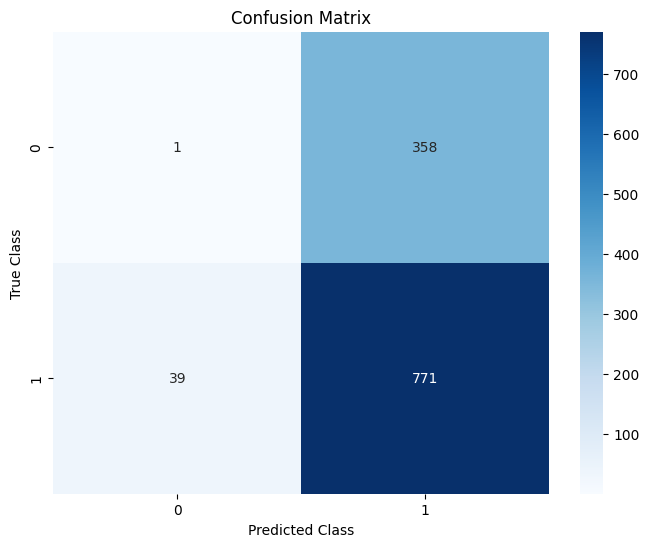

In [104]:
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 시각화 (선택 사항)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

In [50]:
correct, ratio = correct_ratio(results1_1["true_value_list"],results1_1["predict_value_list"])

In [51]:
print(ratio)

0.660393498716852


In [52]:
mean_squared_error([results1_1["true_value_list"]],[results1_1["predict_value_list"]])

0.08384740416834684

Train Data Moments:
Mean: 0.047835757057313945, Variance: 0.0666191826050941, Skewness: -0.03068414333074434, Kurtosis: 0.056896873772447815
Test Data Moments:
Mean: 0.09471301742483092, Variance: 0.005487507865413557, Skewness: -0.0014167023898188108, Kurtosis: 0.0007636062518879104
T-statistic: -5.966173274599365, P-value: 3.0933386479942334e-09


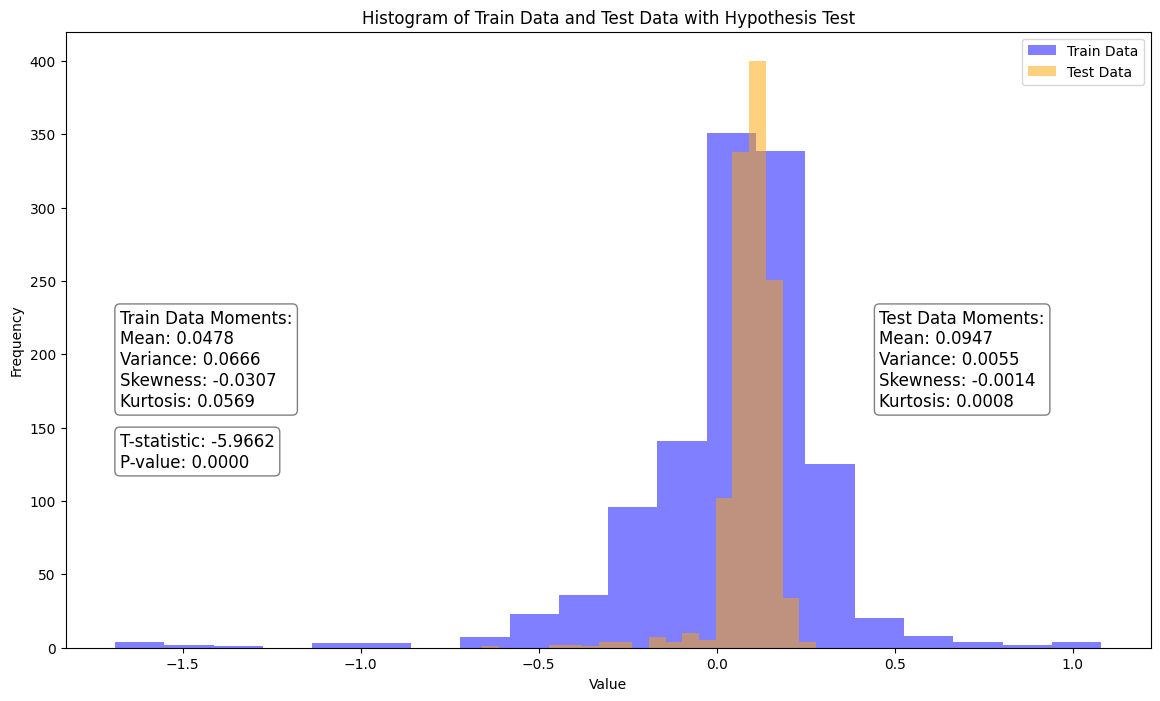

In [53]:
plot_histogram_with_moments_and_ttest(results1_1["true_value_list"],results1_1["predict_value_list"])

In [54]:
torch.save({
    'model_state_dict': model1_1.state_dict(),
    'optimizer_state_dict': optimizer.state_dict()
}, 'model1_stage1_2.pth')

---------

## model 1-stage 2
past 40 days and post 10 days

In [14]:
model_name = "yiyanghkust/finbert-pretrain"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model1_2 = AutoModelForMaskedLM.from_pretrained(model_name)

Some weights of the model checkpoint at yiyanghkust/finbert-pretrain were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [15]:
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
def calculate_moments(predict_list):
    # 평균 계산
    mean_value = np.mean(predict_list)
    
    # 2차, 3차, 4차 적률을 위한 편차 계산
    deviations = [x - mean_value for x in predict_list]
    
    # 각 적률 계산
    first_moment = mean_value
    second_moment = np.mean([d ** 2 for d in deviations])
    third_moment = np.mean([d ** 3 for d in deviations])
    fourth_moment = np.mean([d ** 4 for d in deviations])
    
    return first_moment, second_moment, third_moment, fourth_moment

# 지정된 기간 동안의 수익률 계산
def calculate_return(data):
    return sum(data) / len(data)
def convert_to_text_moment(value):
    sign = "plus" if value >= 0 else "minus"
    value = abs(value)
    integer_part = int(value)
    decimal_part = int((value - integer_part) * 100)  # 소수점 이하 세 자리까지
    text = f"{integer_part} point {decimal_part:02d}"
    return f"{sign} {text}"
# 문장 생성
def generate_sentence(past_data,past_return, future_return):
    increase_or_decrease_past = "increase" if past_return > 0 else "decrease"
    increase_or_decrease_future = "increase" if future_return > 0 else "decrease"
    past_return_mapped = adjust_values(past_return)
    future_return_mapped = adjust_values(future_return)
    
    past_return_text = convert_to_text(abs(round(past_return_mapped, 2)))
    future_return_text = convert_to_text(abs(round(future_return_mapped, 2)))
    first_moment, second_moment, third_moment, fourth_moment = calculate_moments(past_data)
    first_moment = convert_to_text_moment(first_moment)
    second_moment = convert_to_text_moment(second_moment)
    third_moment = convert_to_text_moment(third_moment)
    fourth_moment = convert_to_text_moment(fourth_moment)
    input_sentence = (f'The stock market\'s return over the past 60 days was {increase_or_decrease_past} {past_return_text}. and in this periods'
                 f'The second moment (variance) of past returns is {second_moment}. '
                 f'The third moment (skewness) of past returns is {third_moment}. '
                 f'The fourth moment (kurtosis) of past returns is {fourth_moment}.'
                 f'Considering this, The expected return of the stock market over the next 20 days is [MASK][MASK] point [MASK] percent.')
    label_sentence = (f'The stock market\'s return over the past 60 days was {increase_or_decrease_past} {past_return_text}. and in this periods'
                 f'The second moment (variance) of past returns is {second_moment}. '
                 f'The third moment (skewness) of past returns is {third_moment}. '
                 f'The fourth moment (kurtosis) of past returns is {fourth_moment}.'
                 f'Considering this, The expected return of the stock market over the next 20 days is {increase_or_decrease_future} {future_return_text}. ')
    return input_sentence, label_sentence
    
# 메인 함수
def gen(num_sentences, past, future, data_1):
    inputs = []
    labels = []
    for i in range(num_sentences - future):
        # 과거 7일 + 미래 3일 데이터 생성
        data =data_1['Adj Close'].values
        # 과거 7일 수익률 계산
        past_data = data[i:i + past]
        past_return = calculate_return(past_data)
        
        # 미래 3일 수익률 계산
        future_return = calculate_return(data[i + past:i + past + future])
        
        # 문장 생성 및 저장
        input_sentence, label_sentence = generate_sentence(past_data,past_return, future_return)
        inputs.append(input_sentence)
        labels.append(label_sentence)
        
    return inputs, labels

# 예시 실행 # 예시 데이터 생성
  # 생성할 문장 수
past = 60  # 과거 기간
future = 20  # 미래 기간
num_sentences = len(daily_return) - future-past
inputs, labels = gen(num_sentences, past, future, data_1)

# 결과 출력
inputs_train, inputs_test, labels_train, labels_test = train_test_split(inputs, labels, test_size=0.2, shuffle=False)

In [16]:
from transformers import BertTokenizer, BertForMaskedLM, AdamW
import torch
from torch.utils.data import Dataset, DataLoader

import torch
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

# 모델 및 토크나이저 로드

class StockReturnDataset(Dataset):
    def __init__(self, inputs, labels, tokenizer):
        self.inputs = inputs
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        input_text = self.inputs[idx]
        label_text = self.labels[idx]

        inputs = self.tokenizer(input_text, return_tensors="pt", padding="max_length", max_length=100, truncation=True)
        labels = self.tokenizer(label_text, return_tensors="pt", padding="max_length", max_length=100, truncation=True)

        input_ids = inputs["input_ids"].squeeze()
        attention_mask = inputs["attention_mask"].squeeze()
        label_ids = labels["input_ids"].squeeze()
        
        # Mask token의 위치 찾기
        mask_token_index = (input_ids == self.tokenizer.mask_token_id).nonzero(as_tuple=True)[0]
        
        # [MASK] 토큰 위치를 제외한 나머지 위치에 대해 -100 설정
        labels = torch.full_like(input_ids, -100)
        labels[mask_token_index] = label_ids[mask_token_index]
    
        return input_ids, attention_mask, labels

# Train and test datasets
train_dataset = StockReturnDataset(inputs_train, labels_train, tokenizer)
test_dataset = StockReturnDataset(inputs_test, labels_test, tokenizer)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test_dataset, shuffle=False)


In [18]:
device = torch.device('mps')
model1_2.to(device)

# train_dataloader, test_inputs_sample, test_labels_sample 준비 필요
# train_dataloader = ...  # Your DataLoader for training
# test_inputs_sample = ...  # Your test input samples
# test_labels_sample = ...  # Your test label samples

optimizer = AdamW(model1_2.parameters(), lr=5e-5)

predictor = model_base(model1_2, tokenizer, device)

def convert_tokens_to_value(tokens):
    try:
        increase_or_decrease = tokens[0]
        integer_part = int(tokens[1])
        decimal_part = int(tokens[2])
        value = integer_part + decimal_part / 100.0
        if increase_or_decrease == 'decrease':
            value = -value
        return value
    except:
        return 10
def extract_true_value(true_label):
    true_label_tokens = true_label.split()
    increase_or_decrease = true_label_tokens[-6]
    integer_part = int(true_label_tokens[-4])
    decimal_part = int(true_label_tokens[-2])
    true_value = integer_part + decimal_part / 100.0
    if increase_or_decrease == 'decrease':
        true_value = -true_value
    return true_value

def calculate_mse(predicted_tokens, true_label):
    predicted_value = convert_tokens_to_value(predicted_tokens)
    try:
        true_value = extract_true_value(true_label)
    except:
        true_value = convert_tokens_to_value(true_label)
    mse = mean_squared_error([true_value], [predicted_value])
    return mse, predicted_value, true_value

train_losses = []
test_losses = []
test_mse_list = []
epochs = 250
mse_lambda = 0.001
for epoch in range(epochs):
    # Training
    model1_2.train()
    epoch_train_loss = 0
    for batch in tqdm(train_dataloader, desc=f"Training Epoch {epoch+1}"):
        input_ids, attention_mask, labels = [x.to(device) for x in batch]

        optimizer.zero_grad()

        outputs = model1_2(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        logits = outputs.logits
        total_mse = 0
        for index,i in enumerate(logits):
            mask_token_indices = (input_ids[index] == tokenizer.mask_token_id).nonzero(as_tuple=True)[0]
            predicted_tokens = []
            label_token = []

            for mask_token_index in mask_token_indices:
                mask_token_logits = i[mask_token_index, :]
                top_token_id = torch.argmax(mask_token_logits, dim=-1).item()
                predicted_token = tokenizer.decode([top_token_id])
                label_token_id = labels[index][mask_token_index]
                label_decode = tokenizer.decode([label_token_id])
                predicted_tokens.append(predicted_token)
                label_token.append(label_decode)
            mse, predicted_value, true_value = calculate_mse(predicted_tokens, label_token)
            total_mse += mse
        total_mse = total_mse/len(input_ids)
        loss = outputs.loss + total_mse
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item()

    avg_epoch_train_loss = epoch_train_loss / len(train_dataloader)
    train_losses.append(avg_epoch_train_loss)
    print(f"Epoch {epoch+1} Train Loss: {avg_epoch_train_loss}")

    # Evaluation
    model1_2.eval()
    epoch_test_loss = 0
    mse_total = 0
    with torch.no_grad():
        for batch in tqdm(test_dataloader, desc=f"Evaluating Epoch {epoch+1}"):
            input_ids, attention_mask, labels = [x.to(device) for x in batch]

            outputs = model1_2(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            logits = outputs.logits

            mask_token_indices = (input_ids == tokenizer.mask_token_id).nonzero(as_tuple=True)[1]
            predicted_tokens = []
            label_token = []
            for mask_token_index in mask_token_indices:
                mask_token_logits = logits[0, mask_token_index, :]
                top_token_id = torch.argmax(mask_token_logits, dim=-1).item()
                predicted_token = tokenizer.decode([top_token_id])
                label_token_id = labels[0][mask_token_index]
                label_decode = tokenizer.decode([label_token_id])
                predicted_tokens.append(predicted_token)
                label_token.append(label_decode)
            loss = outputs.loss

            epoch_test_loss += loss.item()

            # MSE 계
            mse, predicted_value, true_value = calculate_mse(predicted_tokens, label_token)
            mse_total += mse
        mse_total = mse_total/len(test_dataloader)
    avg_epoch_train_loss = epoch_test_loss / len(test_dataloader)
    print(f"Epoch {epoch+1} Test Loss: {avg_epoch_train_loss}")
    print(f"Epoch {epoch+1} Test mse: {mse_total}")
    avg_epoch_test_loss = epoch_test_loss / len(test_dataloader)
    test_mse_list.append(mse_total)
    test_losses.append(avg_epoch_test_loss)


/Users/sonhyeongjin/miniforge3/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Training Epoch 1: 100%|██████████| 80/80 [01:09<00:00,  1.16it/s]


Epoch 1 Train Loss: 0.11934591685421765


Evaluating Epoch 1: 100%|██████████| 1265/1265 [00:20<00:00, 62.30it/s]


Epoch 1 Test Loss: 0.04744783669651261
Epoch 1 Test mse: 0.07116822134387361


Training Epoch 2:  60%|██████    | 48/80 [00:41<00:27,  1.14it/s]


KeyboardInterrupt: 

In [ ]:
import itertools
import torch
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

class ReturnPredictor:
    def __init__(self, model, tokenizer, device='mps'):
        self.model = model
        self.tokenizer = tokenizer
        self.device = device
        self.model.to(device)
    
    def convert_tokens_to_value(self, tokens):
        increase_or_decrease = tokens[0]
        integer_part = int(tokens[1])
        decimal_part = int(tokens[2])
        value = integer_part + decimal_part / 100.0
        if increase_or_decrease == 'decrease':
            value = -value
        return value

    def extract_true_value(self, true_label):
        true_label_tokens = true_label.split()
        increase_or_decrease = true_label_tokens[-6]
        integer_part = int(true_label_tokens[-4])
        decimal_part = int(true_label_tokens[-2])
        true_value = integer_part + decimal_part / 100.0
        if increase_or_decrease == 'decrease':
            true_value = -true_value
        return true_value

    def calculate_mse(self, predicted_tokens, true_label):
        predicted_value = self.convert_tokens_to_value(predicted_tokens)
        true_value = self.extract_true_value(true_label)
        mse = mean_squared_error([true_value], [predicted_value])
        return mse, predicted_value, true_value

    def calculate_return(self, data):
        return sum(data) / len(data)

    def calculate_cumulative_returns(self, returns):
        return np.cumsum(returns)

    def predict_masked_token(self, input_text, top_n=5):
        self.model.eval()
        inputs = self.tokenizer(input_text, return_tensors="pt", padding="max_length", max_length=50, truncation=True)
        input_ids = inputs["input_ids"].to(self.device)
        attention_mask = inputs["attention_mask"].to(self.device)

        with torch.no_grad():
            outputs = self.model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

        mask_token_indices = (input_ids == self.tokenizer.mask_token_id).nonzero(as_tuple=True)[1]

        probabilities = []
        tokens = []
        for idx in mask_token_indices:
            mask_logits = logits[0, idx, :]
            mask_probs = F.softmax(mask_logits, dim=-1)
            top_probs, top_indices = torch.topk(mask_probs, top_n)
            probabilities.append(top_probs.tolist())
            tokens.append(self.tokenizer.convert_ids_to_tokens(top_indices))

        combinations = list(itertools.product(*tokens))
        combination_probs = []

        for combo in combinations:
            prob = 1
            for i, token in enumerate(combo):
                token_idx = tokens[i].index(token)
                prob *= probabilities[i][token_idx]
            combination_probs.append((combo, prob))

        combination_probs.sort(key=lambda x: x[1], reverse=True)

        return combination_probs[:5], list(zip(tokens, probabilities))

    def fill_mask_with_top_combinations(self, input_text, top_combinations):
        inputs = self.tokenizer(input_text, return_tensors="pt", padding="max_length", max_length=50, truncation=True)
        input_ids = inputs["input_ids"].squeeze().tolist()

        mask_token_indices = [i for i, token in enumerate(input_ids) if token == self.tokenizer.mask_token_id]
        filled_sentences = []

        for combination in top_combinations:
            tokens = combination[0]
            filled_sentence_ids = input_ids[:]
            for idx, mask_idx in enumerate(mask_token_indices):
                filled_sentence_ids[mask_idx] = self.tokenizer.convert_tokens_to_ids(tokens[idx])
            filled_sentence = self.tokenizer.decode(filled_sentence_ids, skip_special_tokens=True)
            filled_sentences.append(filled_sentence)

        return filled_sentences

    def evaluate(self, test_inputs_sample, test_labels_sample):
        mse_total = 0
        start_value_predict = 1
        start_value_true = 1
        predict_value_list = []
        true_value_list = []
        mse_list = []
        top_combinations_list = []
        filled_sentences_list = []

        for input_text, label in zip(test_inputs_sample, test_labels_sample):
            top_combinations, individual_probs = self.predict_masked_token(input_text)
            top_combinations_list.append(top_combinations)
            predicted_token = top_combinations[0][0]  # 가장 높은 확률 조합 사용
            
            filled_sentences = self.fill_mask_with_top_combinations(input_text, top_combinations[:5])
            filled_sentences_list.append(filled_sentences)
            
            mse, predicted_value, true_value = self.calculate_mse(predicted_token, label)
            mse_total += mse * 0.01
            start_value_predict *= (1 + predicted_value * 0.01)
            start_value_true *= (1 + true_value * 0.01)
            true_value_list.append(start_value_true)
            predict_value_list.append(start_value_predict)
            mse_list.append(mse_total)
        
        return {
            "mse_total": mse_total,
            "true_value_list": true_value_list,
            "predict_value_list": predict_value_list,
            "mse_list": mse_list,
            "top_combinations_list": top_combinations_list,
            "filled_sentences_list": filled_sentences_list
        }

    def convert_top1_to_value(self,top5_combinations):
        
        if top5_combinations:
            top1_combination = top5_combinations[0][0]  # 첫 번째 조합의 토큰들
            increase_or_decrease = top1_combination[0]
            integer_part = int(top1_combination[1])
            decimal_part = int(top1_combination[2])
            value = integer_part + decimal_part / 100.0
            if increase_or_decrease == 'decrease':
                value = -value
            
        return value
    def plot_cumulative_returns(self, true_value_list, predict_value_list, mse_list):
        plt.figure(figsize=(12, 6))
        plt.plot(true_value_list, label='True Cumulative Returns')
        plt.plot(predict_value_list, label='Predicted Cumulative Returns', linestyle='--')
        plt.plot(mse_list, label='Cumulative MSE', linestyle='-.')
        plt.xlabel('Time')
        plt.ylabel('Cumulative Returns')
        plt.title('True vs Predicted Cumulative Returns')
        plt.legend()
        plt.show()

# Usage example:
# predictor = ReturnPredictor(model, tokenizer, device='cuda')
# results = predictor.evaluate(test_inputs_sample, test_labels_sample)
# predictor.plot_cumulative_returns(results["true_value_list"], results["predict_value_list"], results["mse_list"])

In [107]:
predictor1_2 = ReturnPredictor(model1_2, tokenizer)

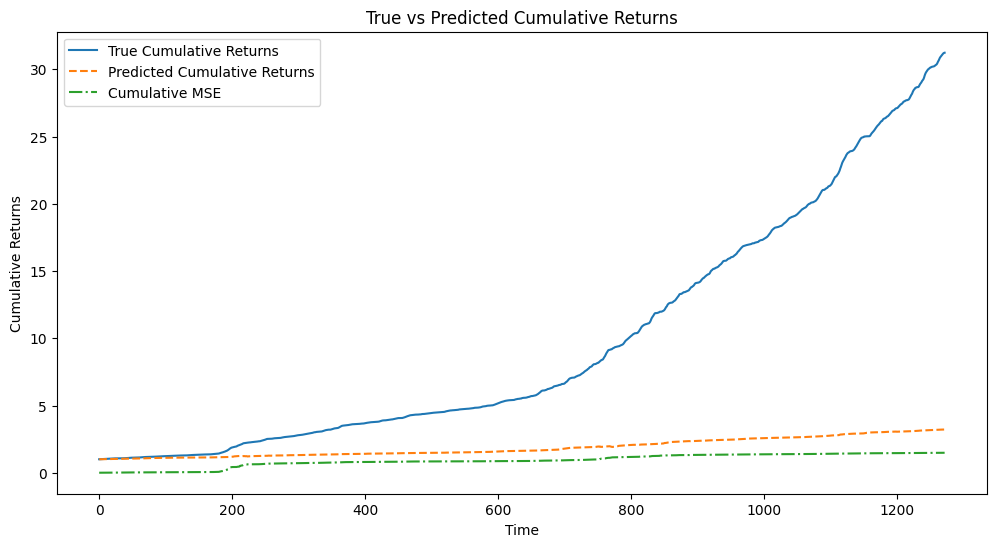

In [109]:
results1_2 = predictor1_2.evaluate(test_inputs_sample, test_labels_sample)
predictor1_2.plot_cumulative_returns(results["true_value_list"], results["predict_value_list"], results["mse_list"])

In [131]:
results

{'mse_total': 1.4838629999999897,
 'true_value_list': [1.0022,
  1.0052066,
  1.0087248231000001,
  1.0124571049454703,
  1.0173168990492085,
  1.0226069469242645,
  1.0266973747119614,
  1.0302908155234534,
  1.0342059206224425,
  1.0369982766081232,
  1.0390722731613393,
  1.040215252661817,
  1.0414635109650112,
  1.0427132671781694,
  1.044694422385808,
  1.047410627884011,
  1.0494007080769905,
  1.0519192697763753,
  1.053181572900107,
  1.054129436315717,
  1.055394391639296,
  1.058138417057558,
  1.0611012046253192,
  1.064284508239195,
  1.066838791058969,
  1.0682256814873456,
  1.0686529717599405,
  1.0686529717599405,
  1.0691872982458204,
  1.0695080544352942,
  1.070470611684286,
  1.0714340352348017,
  1.071541178638325,
  1.0719697951097804,
  1.0721841890688024,
  1.072505844325523,
  1.0726130949099557,
  1.0741147532428297,
  1.075725925372694,
  1.0807818372219458,
  1.0852130427545557,
  1.090096501446951,
  1.0923857040999896,
  1.0962090540643397,
  1.1012516157

In [90]:
predict_list = []
for i in results['top_combinations_list']:
    
    predict_list.append(predictor.convert_top1_to_value(i))

In [94]:
def gen(num_sentences, past, future, data_1):
    labels = []
    for i in range(num_sentences - future):
        # 과거 7일 + 미래 3일 데이터 생성
        data =data_1['Adj Close'].values
        # 과거 7일 수익률 계산
        
        # 미래 3일 수익률 계산
        future_return = calculate_return(data[i + past:i + past + future])
        
        # 문장 생성 및 저장

        labels.append(future_return)
        
    return labels

# 예시 실행 # 예시 데이터 생성
  # 생성할 문장 수
past = 40  # 과거 기간
future = 10  # 미래 기간
num_sentences = len(daily_return) - future-past
true_expected_retrun = gen(num_sentences, past, future, data_1)

In [112]:
import numpy as np

def calculate_moments(predict_list):
    # 평균 계산
    mean_value = np.mean(predict_list)
    
    # 2차, 3차, 4차 적률을 위한 편차 계산
    deviations = [x - mean_value for x in predict_list]
    
    # 각 적률 계산
    first_moment = mean_value
    second_moment = np.mean([d ** 2 for d in deviations])
    third_moment = np.mean([d ** 3 for d in deviations])
    fourth_moment = np.mean([d ** 4 for d in deviations])
    
    return first_moment, second_moment, third_moment, fourth_moment

# Example usage


First Moment (Mean): 0.09190887666928516
Second Moment (Variance): 0.032071218719319436
Third Moment (Skewness): -0.004367903408423
Fourth Moment (Kurtosis): 0.02420363310809958


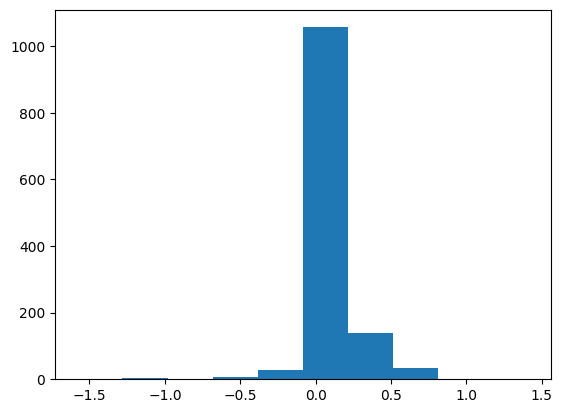

In [113]:
plt.hist(predict_list)
first_moment, second_moment, third_moment, fourth_moment = calculate_moments(predict_list)
print(f"First Moment (Mean): {first_moment}")
print(f"Second Moment (Variance): {second_moment}")
print(f"Third Moment (Skewness): {third_moment}")
print(f"Fourth Moment (Kurtosis): {fourth_moment}")

First Moment (Mean): 0.03675285289318859
Second Moment (Variance): 0.10853567300294988
Third Moment (Skewness): -0.04109535346018109
Fourth Moment (Kurtosis): 0.12255581240842077


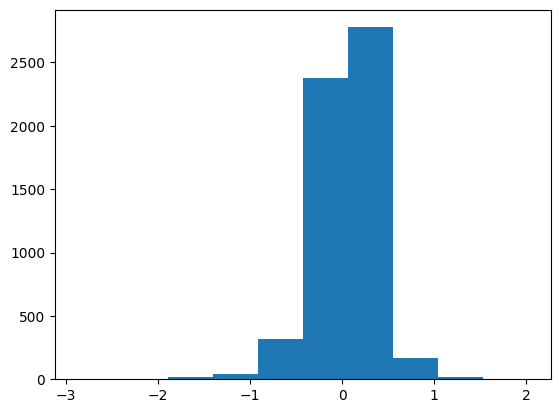

In [152]:
true_list = true_expected_retrun[int(-len(true_expected_retrun)*0.9):]
plt.hist(true_list)
first_moment, second_moment, third_moment, fourth_moment = calculate_moments(true_list)
print(f"First Moment (Mean): {first_moment}")
print(f"Second Moment (Variance): {second_moment}")
print(f"Third Moment (Skewness): {third_moment}")
print(f"Fourth Moment (Kurtosis): {fourth_moment}")

## model2 데이터 셋 만들기

In [141]:
len(results1_1['filled_sentences_list'][:-6])

1273

In [139]:
len(results1_2['filled_sentences_list'])

1273

In [143]:
results1_1['filled_sentences_list'][:-6][0]

["the stock market's return over the past 20 days was decrease 0 point 28 percent. the expected return of the stock market over the next 5 days is decrease 0 point 36 percent.",
 "the stock market's return over the past 20 days was decrease 0 point 28 percent. the expected return of the stock market over the next 5 days is decrease 0 point 27 percent.",
 "the stock market's return over the past 20 days was decrease 0 point 28 percent. the expected return of the stock market over the next 5 days is increase 0 point 36 percent.",
 "the stock market's return over the past 20 days was decrease 0 point 28 percent. the expected return of the stock market over the next 5 days is decrease 0 point 01 percent.",
 "the stock market's return over the past 20 days was decrease 0 point 28 percent. the expected return of the stock market over the next 5 days is decrease 0 point 03 percent."]

In [145]:
import pandas as pd
import numpy as np

# 5x5 데이터 프레임 생성 및 NaN으로 채우기
df = pd.DataFrame(np.nan, index=results1_1['filled_sentences_list'][:-6][0], columns=results1_2['filled_sentences_list'][0])

In [147]:
df

the stock market's return over the past 40 days was increase 0 point 01 percent. the expected return of the stock market over the next 10 days is increase 0 point 02 percent.  \
the stock market's return over the past 20 days...                                                NaN                                                                                                                                
the stock market's return over the past 20 days...                                                NaN                                                                                                                                
the stock market's return over the past 20 days...                                                NaN                                                                                                                                
the stock market's return over the past 20 days...                                                NaN                                                                                                                                
the stock market's return over the past 20 days...                                                NaN                                                                                                                                

                                                    the stock market's return over the past 40 days was increase 0 point 01 percent. the expected return of the stock market over the next 10 days is increase 0 point 01 percent.  \
the stock market's return over the past 20 days...                                                NaN                                                                                                                                
the stock market's return over the past 20 days...                                                NaN                                                                                                                                
the stock market's return over the past 20 days...                                                NaN                                                                                                                                
the stock market's return over the past 20 days...                                                NaN                                                                                                                                
the stock market's return over the past 20 days...                                                NaN                                                                                                                                

                                                    the stock market's return over the past 40 days was increase 0 point 01 percent. the expected return of the stock market over the next 10 days is increase 0 point 06 percent.  \
the stock market's return over the past 20 days...                                                NaN                                                                                                                                
the stock market's return over the past 20 days...                                                NaN                                                                                                                                
the stock market's return over the past 20 days...                                                NaN                                                                                                                                
the stock market's return over the past 20 days...                                                NaN                                                                                                                                
the stock market's return over the past 20 days...                                                NaN                                       

In [148]:
import pickle


In [151]:
with open('model1_stage2_output.pkl', 'wb') as f:
    pickle.dump(results1_2['filled_sentences_list'], f)

print("리스트가 피클 파일로 저장되었습니다.")

리스트가 피클 파일로 저장되었습니다.


# model test

In [24]:
model.eval()
eval_loss = 0
for batch in tqdm(test_dataloader, desc="Evaluating"):
    input_ids, attention_mask, labels = [x.to(device) for x in batch]

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

    eval_loss += loss.item()

avg_eval_loss = eval_loss / len(test_dataloader)
eval_losses.append(avg_eval_loss)
print(f"Epoch {epoch+1} Eval Loss: {avg_eval_loss}")


Evaluating: 100%|██████████| 1279/1279 [00:15<00:00, 84.29it/s]

Epoch 250 Eval Loss: 0.17206695878862216


In [25]:
def convert_tokens_to_value(tokens):
    increase_or_decrease = tokens[0]
    integer_part = int(tokens[1])
    decimal_part = int(tokens[2])
    value = integer_part + decimal_part / 100.0
    if increase_or_decrease == 'decrease':
        value = -value
    return value
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_squared_error

def calculate_mse(predicted_tokens, true_label):
    # 예측된 값 변환
    predicted_value = convert_tokens_to_value(predicted_tokens)
    
    # 실제 값 변환
    true_label_tokens = true_label.split()
    
    increase_or_decrease = true_label_tokens[-6]
    integer_part = int(true_label_tokens[-4])
    decimal_part = int(true_label_tokens[-2])
    true_value = integer_part + decimal_part / 100.0
    
    if increase_or_decrease == 'decrease':
        true_value = -true_value
    
    # MSE 계산
    mse = mean_squared_error([true_value], [predicted_value])
    return mse

In [26]:
from sklearn.metrics import mean_squared_error

# 예측된 토큰을 실제 수익률 값으로 변환하는 함수
def convert_tokens_to_value(tokens):
    increase_or_decrease = tokens[0]
    integer_part = int(tokens[1])
    decimal_part = int(tokens[2])
    value = integer_part + decimal_part / 100.0
    if increase_or_decrease == 'decrease':
        value = -value
    return value

# 실제 라벨에서 수익률 값을 추출하는 함수
def extract_true_value(true_label):
    true_label_tokens = true_label.split()
    increase_or_decrease = true_label_tokens[-6]
    integer_part = int(true_label_tokens[-4])
    decimal_part = int(true_label_tokens[-2])
    true_value = integer_part + decimal_part / 100.0
    if increase_or_decrease == 'decrease':
        true_value = -true_value
    return true_value

# 예측 및 MSE 계산
def calculate_mse(predicted_tokens, true_label):
    predicted_value = convert_tokens_to_value(predicted_tokens)
    true_value = extract_true_value(true_label)
    mse = mean_squared_error([true_value], [predicted_value])
    return mse, predicted_value, true_value
def calculate_return(data):
    return sum(data) / len(data)

# 누적 수익률 계산
def calculate_cumulative_returns(returns):
    return np.cumsum(returns)

In [27]:
# 테스트 데이터에서 10개의 입력 문장 추출
test_inputs_sample = inputs_test
test_labels_sample = labels_test
list_1= []
# 예측 함수 정의
def predict_masked_token(input_text):
    model.eval()
    predict_list = []
    inputs = tokenizer(input_text, return_tensors="pt", padding="max_length", max_length=50, truncation=True)
    input_ids = inputs["input_ids"].to(device)
    attention_mask = inputs["attention_mask"].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    # [MASK] 토큰의 위치 찾기
    mask_token_index = (input_ids == tokenizer.mask_token_id).nonzero(as_tuple=True)[1]

    # [MASK] 토큰의 예측값 추출
    mask_token_logits = logits[0, mask_token_index, :]
    for i in mask_token_logits:
        predicted_token_id = torch.argmax(i).item()
        predicted_token = tokenizer.decode([predicted_token_id])
        predict_list.append(predicted_token)
    
    return predict_list
mse_total = 0
# 예측 결과 출력
start_value_predict = 1
start_value_true = 1
predict_value_list = []
true_value_list = []
mse_list = []
for input_text, label in zip(test_inputs_sample, test_labels_sample):
    predicted_token = predict_masked_token(input_text)
    mse, predicted_value, true_value = calculate_mse(predicted_token, label)
    mse_total += mse*0.01
    start_value_predict *= (1+predicted_value*0.01)
    start_value_true *= (1+true_value*0.01)
    true_value_list.append(start_value_true)
    predict_value_list.append(start_value_predict)
    mse_list.append(mse_total)
    print(f'MSE: {mse}')
    print(f"Input: {input_text}")
    print(f"Predicted: {predicted_token}")
    print(f"True Label: {label}")
    print('-'*50)

MSE: 1.5129
Input: The stock market's return over the past 20 days was decrease 0 point 28 percent. The expected return of the stock market over the next 5 days is [MASK][MASK] point [MASK] percent.
Predicted: ['decrease', '0', '36']
True Label: The stock market's return over the past 20 days was decrease 0 point 28 percent. The expected return of the stock market over the next 5 days is increase 0 point 87 percent.
--------------------------------------------------
MSE: 0.11559999999999998
Input: The stock market's return over the past 20 days was decrease 0 point 35 percent. The expected return of the stock market over the next 5 days is [MASK][MASK] point [MASK] percent.
Predicted: ['increase', '0', '68']
True Label: The stock market's return over the past 20 days was decrease 0 point 35 percent. The expected return of the stock market over the next 5 days is increase 1 point 02 percent.
--------------------------------------------------
MSE: 0.2703999999999999
Input: The stock mark

In [28]:
def predict_masked_token(input_text):
    model.eval()
    predict_list = []
    inputs = tokenizer(input_text, return_tensors="pt", padding="max_length", max_length=50, truncation=True)
    input_ids = inputs["input_ids"].to(device)
    attention_mask = inputs["attention_mask"].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    # [MASK] 토큰의 위치 찾기
    mask_token_index = (input_ids == tokenizer.mask_token_id).nonzero(as_tuple=True)[1]

    # [MASK] 토큰의 예측값 추출
    mask_token_logits = logits[0, mask_token_index, :]
    for logit in mask_token_logits:
        top_5_values, top_5_indices = torch.topk(logit, 5)
        top_5_tokens = tokenizer.decode(top_5_indices)
        predict_list.append(top_5_tokens)
    
    return predict_list

In [29]:
for input_text, label in zip(test_inputs_sample, test_labels_sample):
    predicted_tokens = predict_masked_token(input_text)
    print(f"Input: {input_text}")
    print(f"Top 5 predictions for each mask: {predicted_tokens}")
    print(f"True Label: {label}")
    print('-'*50)

Input: The stock market's return over the past 20 days was decrease 0 point 28 percent. The expected return of the stock market over the next 5 days is [MASK][MASK] point [MASK] percent.
Top 5 predictions for each mask: ['decrease increase 0 1 11', '0 1 3 2 increase', '36 27 01 03 12']
True Label: The stock market's return over the past 20 days was decrease 0 point 28 percent. The expected return of the stock market over the next 5 days is increase 0 point 87 percent.
--------------------------------------------------
Input: The stock market's return over the past 20 days was decrease 0 point 35 percent. The expected return of the stock market over the next 5 days is [MASK][MASK] point [MASK] percent.
Top 5 predictions for each mask: ['increase decrease 0 1 43', '0 1 2 3 increase', '68 69 81 54 47']
True Label: The stock market's return over the past 20 days was decrease 0 point 35 percent. The expected return of the stock market over the next 5 days is increase 1 point 02 percent.
---

In [30]:
import itertools
import torch.nn.functional as F

def predict_masked_token(input_text, top_n=5):
    model.eval()
    inputs = tokenizer(input_text, return_tensors="pt", padding="max_length", max_length=50, truncation=True)
    input_ids = inputs["input_ids"].to(device)
    attention_mask = inputs["attention_mask"].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    # [MASK] 토큰의 위치 찾기
    mask_token_indices = (input_ids == tokenizer.mask_token_id).nonzero(as_tuple=True)[1]

    # 각 마스크 위치에 대한 확률 계산
    probabilities = []
    tokens = []
    for idx in mask_token_indices:
        mask_logits = logits[0, idx, :]
        mask_probs = F.softmax(mask_logits, dim=-1)
        top_probs, top_indices = torch.topk(mask_probs, top_n)
        probabilities.append(top_probs.tolist())
        tokens.append(tokenizer.convert_ids_to_tokens(top_indices))

    # 모든 가능한 조합 생성
    combinations = list(itertools.product(*tokens))
    combination_probs = []

    for combo in combinations:
        prob = 1
        for i, token in enumerate(combo):
            token_idx = tokens[i].index(token)
            prob *= probabilities[i][token_idx]
        combination_probs.append((combo, prob))

    # 확률에 따라 정렬
    combination_probs.sort(key=lambda x: x[1], reverse=True)

    return combination_probs[:5], list(zip(tokens, probabilities))

# 예측 결과 출력
for input_text, label in zip(test_inputs_sample, test_labels_sample):
    top_combinations, individual_probs = predict_masked_token(input_text)
    print(f"Input: {input_text}")
    print("Top 5 combinations:")
    for i, (combo, prob) in enumerate(top_combinations, 1):
        print(f"{i}. Tokens: {combo}, Probability: {prob:.6f}")
    print("\nIndividual token probabilities for each mask:")
    for i, (tokens, probs) in enumerate(individual_probs, 1):
        print(f"Mask {i}:")
        for token, prob in zip(tokens, probs):
            print(f"  {token}: {prob:.6f}")
    print(f"\nTrue Label: {label}")
    print('-'*50)

Input: The stock market's return over the past 20 days was decrease 0 point 28 percent. The expected return of the stock market over the next 5 days is [MASK][MASK] point [MASK] percent.
Top 5 combinations:
1. Tokens: ('decrease', '0', '36'), Probability: 0.029447
2. Tokens: ('decrease', '0', '27'), Probability: 0.023794
3. Tokens: ('increase', '0', '36'), Probability: 0.022908
4. Tokens: ('decrease', '0', '01'), Probability: 0.022058
5. Tokens: ('decrease', '0', '03'), Probability: 0.021391

Individual token probabilities for each mask:
Mask 1:
  decrease: 0.562417
  increase: 0.437525
  0: 0.000007
  1: 0.000003
  11: 0.000001
Mask 2:
  0: 0.883413
  1: 0.116114
  3: 0.000111
  2: 0.000109
  increase: 0.000026
Mask 3:
  36: 0.059268
  27: 0.047889
  01: 0.044396
  03: 0.043054
  12: 0.039658

True Label: The stock market's return over the past 20 days was decrease 0 point 28 percent. The expected return of the stock market over the next 5 days is increase 0 point 87 percent.
--------

In [31]:
print(mse_total)

3.0726620000000024


In [32]:
labels_test[-2]

"The stock market's return over the past 20 days was increase 0 point 20 percent. The expected return of the stock market over the next 5 days is increase 0 point 31 percent."

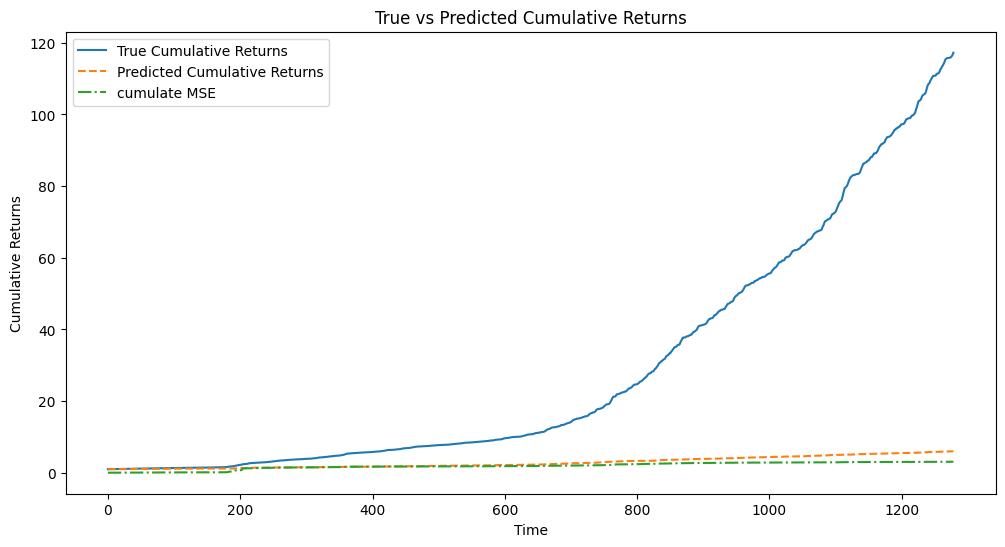

In [33]:
import matplotlib.pyplot as plt

# 누적 수익률 플롯팅
plt.figure(figsize=(12, 6))
plt.plot(true_value_list, label='True Cumulative Returns')
plt.plot(predict_value_list, label='Predicted Cumulative Returns', linestyle='--')
plt.plot(mse_list,label = 'cumulate MSE',linestyle = '-.')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.title('True vs Predicted Cumulative Returns')
plt.legend()
plt.show()

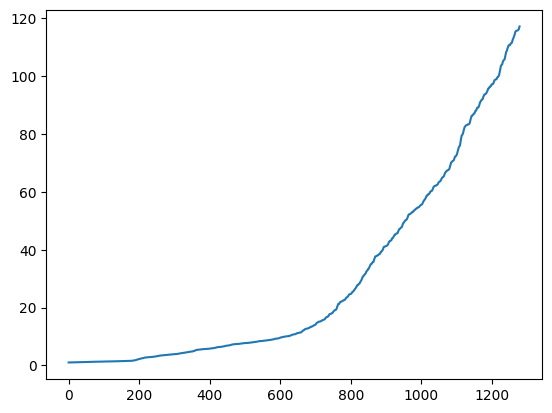

In [34]:
plt.plot(true_value_list, label='True Cumulative Returns')

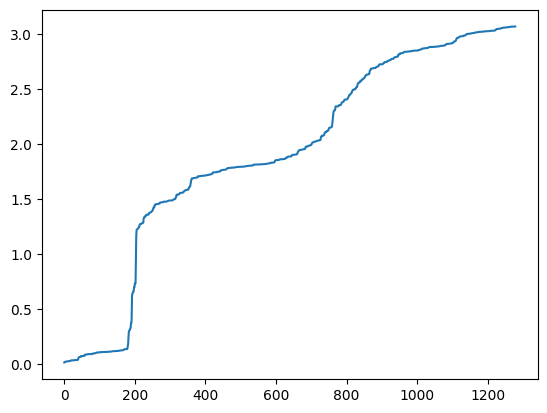

In [35]:
plt.plot(mse_list)

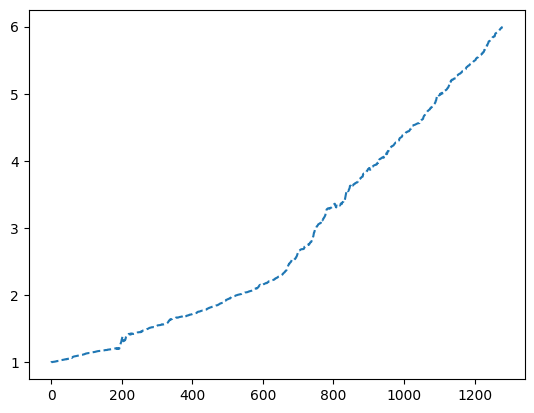

In [36]:
plt.plot(predict_value_list, label='Predicted Cumulative Returns', linestyle='--')

In [654]:
len(mse_list)

1282

In [635]:
start_value_predict

0.06855317613462529

In [624]:
mse_total

3.7907

In [628]:
# 예측된 토큰 예시
predicted_tokens = ['increase', '0', '89']
# 실제 레이블 예시
true_label = "The stock market's return over the past 7 days was decrease 0 point 56 percent. The expected return of the stock market over the next 3 days is increase 1 point 18 percent."

# 예측 및 MSE 계산
mse, predicted_value, true_value = calculate_mse(predicted_tokens, true_label)
print(f'MSE: {mse}')

# 누적 수익률 계산
predicted_returns = [predicted_value for _ in range(len(data_1) - 7)]
true_returns = [true_value for _ in range(len(data_1) - 7)]

predicted_cumulative_returns = calculate_cumulative_returns(predicted_returns)
true_cumulative_returns = calculate_cumulative_returns(true_returns)

MSE: 0.08409999999999995


In [631]:
predicted_value,true_value

(0.89, 1.18)

In [601]:
input_text,label

("The stock market's return over the past 7 days was increase 0 point 31 percent. The expected return of the stock market over the next 3 days is [MASK][MASK] point [MASK] percent.",
 "The stock market's return over the past 7 days was increase 0 point 31 percent. The expected return of the stock market over the next 3 days is increase 0 point 45 percent.")

In [316]:
torch.max(list_1[0][0])

tensor(18.0912, device='mps:0')

In [320]:
list_1[3][0]

tensor([-6.2031, -5.1979, 13.7924,  ...,  0.2840,  1.2092, -0.1048],
       device='mps:0')

In [315]:
model.vocab_size

30973

In [324]:
30873 - len(percent_changes)

30672

In [318]:
tokenizer

BertTokenizerFast(name_or_path='yiyanghkust/finbert-pretrain', vocab_size=30873, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	5: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1633: AddedToken("1.5", rstrip=False, lstrip=False, single_word=False, normalized=True, special=F

------

In [100]:
import random
from datetime import datetime, timedelta
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성 함수들
def calculate_return(data):
    return sum(data) / len(data)

def generate_sentence(past_return, future_return):
    return f'The stock market\'s return over the past 7 days was {past_return:.5f}%. The expected return of the stock market over the next 3 days is [MASK]%.', f'{future_return:.5f}'

def gen(num_sentences, past, future, daily_return):
    inputs = []
    labels = []
    for i in range(num_sentences - future):
        data = daily_return * 100
        past_return = calculate_return(data[i:i + past])
        future_return = calculate_return(data[i + past:i + past + future])
        input_sentence, label_sentence = generate_sentence(past_return, future_return)
        inputs.append(input_sentence)
        labels.append(label_sentence)
    return inputs, labels

# 커스텀 데이터셋
class StockReturnDataset(Dataset):
    def __init__(self, tokenizer, inputs, labels):
        self.tokenizer = tokenizer
        self.inputs = inputs
        self.labels = labels

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        input_text = self.inputs[idx]
        label = float(self.labels[idx])

        encoding = self.tokenizer.encode_plus(
            input_text,
            add_special_tokens=True,
            max_length=128,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.float)
        }

# 모델 정의
class StockReturnPredictor(nn.Module):
    def __init__(self, base_model):
        super(StockReturnPredictor, self).__init__()
        self.base_model = base_model
        self.regressor = nn.Linear(base_model.config.hidden_size, 1)
        nn.init.xavier_uniform_(self.regressor.weight)

    def forward(self, input_ids, attention_mask):
        outputs = self.base_model(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        return self.regressor(pooled_output)

# 학습 함수
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0
        for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                loss = criterion(outputs.squeeze(), labels)
                total_val_loss += loss.item()

        avg_val_loss = total_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

    return train_losses, val_losses

# 메인 실행 코드
if __name__ == "__main__":
    # 데이터 생성 (실제 데이터로 대체 필요)
    
  # 1000일의 일별 수익률 생성
    
    past = 7
    future = 3
    num_sentences = len(daily_return) - future - past
    inputs, labels = gen(num_sentences, past, future, daily_return)

    # 토크나이저 및 기본 모델 로드
    model_name = "yiyanghkust/finbert-pretrain"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    base_model = AutoModel.from_pretrained(model_name)

    # 데이터셋 및 데이터로더 생성
    dataset = StockReturnDataset(tokenizer, inputs, labels)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    # 모델, 손실 함수, 옵티마이저 초기화
    device = torch.device("mps")
    model = StockReturnPredictor(base_model).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-5)

    # 모델 학습
    num_epochs = 40
    train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device)

    # 학습 결과 시각화
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    # 모델 저장
    torch.save(model.state_dict(), 'stock_return_predictor.pth')

    print("Training completed and model saved.")

Epoch 1/40: 100%|██████████| 161/161 [00:55<00:00,  2.92it/s]


Epoch [1/40], Train Loss: 0.4555, Val Loss: 0.4477


Epoch 2/40: 100%|██████████| 161/161 [00:54<00:00,  2.94it/s]


Epoch [2/40], Train Loss: 0.4468, Val Loss: 0.4367


Epoch 3/40: 100%|██████████| 161/161 [00:54<00:00,  2.95it/s]


Epoch [3/40], Train Loss: 0.4377, Val Loss: 0.4411


Epoch 4/40: 100%|██████████| 161/161 [00:54<00:00,  2.97it/s]


Epoch [4/40], Train Loss: 0.4377, Val Loss: 0.4423


Epoch 5/40: 100%|██████████| 161/161 [00:54<00:00,  2.95it/s]


Epoch [5/40], Train Loss: 0.4294, Val Loss: 0.4512


Epoch 6/40: 100%|██████████| 161/161 [00:54<00:00,  2.96it/s]


Epoch [6/40], Train Loss: 0.4256, Val Loss: 0.4555


Epoch 7/40: 100%|██████████| 161/161 [00:54<00:00,  2.95it/s]


Epoch [7/40], Train Loss: 0.4138, Val Loss: 0.4802


Epoch 8/40: 100%|██████████| 161/161 [00:54<00:00,  2.95it/s]


Epoch [8/40], Train Loss: 0.4045, Val Loss: 0.4969


Epoch 9/40: 100%|██████████| 161/161 [00:54<00:00,  2.97it/s]


Epoch [9/40], Train Loss: 0.3863, Val Loss: 0.4980


Epoch 10/40: 100%|██████████| 161/161 [00:53<00:00,  3.00it/s]


Epoch [10/40], Train Loss: 0.3687, Val Loss: 0.5349


Epoch 11/40: 100%|██████████| 161/161 [00:54<00:00,  2.96it/s]


Epoch [11/40], Train Loss: 0.3483, Val Loss: 0.5272


Epoch 12/40: 100%|██████████| 161/161 [00:54<00:00,  2.96it/s]


Epoch [12/40], Train Loss: 0.3383, Val Loss: 0.5049


Epoch 13/40: 100%|██████████| 161/161 [00:54<00:00,  2.95it/s]


Epoch [13/40], Train Loss: 0.3205, Val Loss: 0.5195


Epoch 14/40: 100%|██████████| 161/161 [00:54<00:00,  2.95it/s]


Epoch [14/40], Train Loss: 0.3135, Val Loss: 0.5250


Epoch 15/40: 100%|██████████| 161/161 [00:54<00:00,  2.95it/s]


Epoch [15/40], Train Loss: 0.2977, Val Loss: 0.5318


Epoch 16/40: 100%|██████████| 161/161 [00:54<00:00,  2.95it/s]


Epoch [16/40], Train Loss: 0.2785, Val Loss: 0.5394


Epoch 17/40: 100%|██████████| 161/161 [00:54<00:00,  2.95it/s]


Epoch [17/40], Train Loss: 0.2701, Val Loss: 0.6085


Epoch 18/40: 100%|██████████| 161/161 [00:54<00:00,  2.95it/s]


Epoch [18/40], Train Loss: 0.2545, Val Loss: 0.5952


Epoch 19/40: 100%|██████████| 161/161 [00:54<00:00,  2.94it/s]


Epoch [19/40], Train Loss: 0.2424, Val Loss: 0.5866


Epoch 20/40: 100%|██████████| 161/161 [00:54<00:00,  2.95it/s]


Epoch [20/40], Train Loss: 0.2305, Val Loss: 0.5921


Epoch 21/40: 100%|██████████| 161/161 [00:54<00:00,  2.95it/s]


Epoch [21/40], Train Loss: 0.2216, Val Loss: 0.6524


Epoch 22/40: 100%|██████████| 161/161 [00:54<00:00,  2.95it/s]


Epoch [22/40], Train Loss: 0.2079, Val Loss: 0.6672


Epoch 23/40: 100%|██████████| 161/161 [00:54<00:00,  2.94it/s]


Epoch [23/40], Train Loss: 0.1891, Val Loss: 0.6505


Epoch 24/40: 100%|██████████| 161/161 [00:54<00:00,  2.95it/s]


Epoch [24/40], Train Loss: 0.1792, Val Loss: 0.6658


Epoch 25/40: 100%|██████████| 161/161 [00:54<00:00,  2.95it/s]


Epoch [25/40], Train Loss: 0.1690, Val Loss: 0.7054


Epoch 26/40: 100%|██████████| 161/161 [00:54<00:00,  2.95it/s]


Epoch [26/40], Train Loss: 0.1582, Val Loss: 0.7537


Epoch 27/40: 100%|██████████| 161/161 [00:54<00:00,  2.95it/s]


Epoch [27/40], Train Loss: 0.1463, Val Loss: 0.7208


Epoch 28/40: 100%|██████████| 161/161 [00:54<00:00,  2.95it/s]


Epoch [28/40], Train Loss: 0.1411, Val Loss: 0.7501


Epoch 29/40: 100%|██████████| 161/161 [00:54<00:00,  2.95it/s]


Epoch [29/40], Train Loss: 0.1318, Val Loss: 0.7817


Epoch 30/40: 100%|██████████| 161/161 [00:54<00:00,  2.95it/s]


Epoch [30/40], Train Loss: 0.1236, Val Loss: 0.7703


Epoch 31/40: 100%|██████████| 161/161 [00:54<00:00,  2.95it/s]


Epoch [31/40], Train Loss: 0.1212, Val Loss: 0.7364


Epoch 32/40: 100%|██████████| 161/161 [00:54<00:00,  2.95it/s]


Epoch [32/40], Train Loss: 0.1183, Val Loss: 0.7144


Epoch 33/40: 100%|██████████| 161/161 [00:54<00:00,  2.94it/s]


Epoch [33/40], Train Loss: 0.1131, Val Loss: 0.7191


Epoch 34/40:  22%|██▏       | 36/161 [00:12<00:43,  2.85it/s]


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (32,) and (0,)

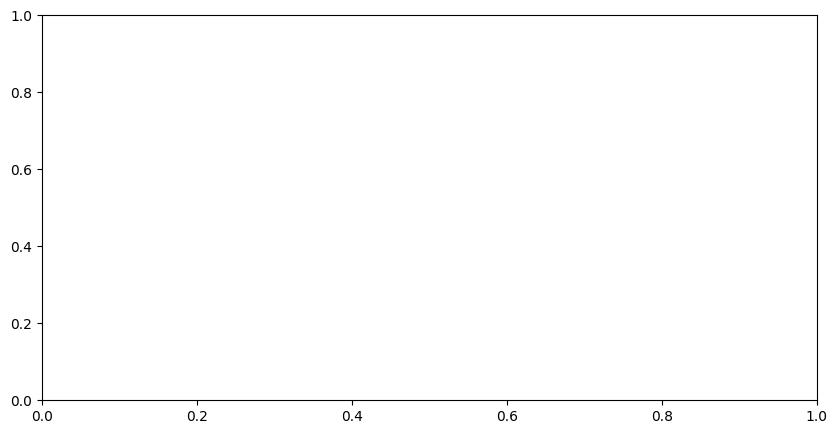

In [102]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 32+1), train_losses, label='Train Loss')
plt.plot(range(1, 32+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [103]:
train_losses

[]

-----

# 그냥 각 자산을 코퍼스 셋으로 정의하자

In [112]:
# 자산 리스트
assets = ["S&P500", "GLOD", "WTI"]
# 상승 및 하락률 범위 (-10% ~ 10%)
percent_changes = [round(x * 0.1, 1) for x in range(-100, 101)]

# 문장 생성 함수
def generate_sentences(assets, percent_changes):
    sentences = []
    for asset in assets:
        for change in percent_changes:
            sentence = f"{asset} increased by {change}%"
            sentences.append(sentence)
    return sentences

# 문장 생성
sentences = generate_sentences(assets, percent_changes)

# 결과 출력
for sentence in sentences:
    print(sentence)

S&P500 increased by -10.0%
S&P500 increased by -9.9%
S&P500 increased by -9.8%
S&P500 increased by -9.7%
S&P500 increased by -9.6%
S&P500 increased by -9.5%
S&P500 increased by -9.4%
S&P500 increased by -9.3%
S&P500 increased by -9.2%
S&P500 increased by -9.1%
S&P500 increased by -9.0%
S&P500 increased by -8.9%
S&P500 increased by -8.8%
S&P500 increased by -8.7%
S&P500 increased by -8.6%
S&P500 increased by -8.5%
S&P500 increased by -8.4%
S&P500 increased by -8.3%
S&P500 increased by -8.2%
S&P500 increased by -8.1%
S&P500 increased by -8.0%
S&P500 increased by -7.9%
S&P500 increased by -7.8%
S&P500 increased by -7.7%
S&P500 increased by -7.6%
S&P500 increased by -7.5%
S&P500 increased by -7.4%
S&P500 increased by -7.3%
S&P500 increased by -7.2%
S&P500 increased by -7.1%
S&P500 increased by -7.0%
S&P500 increased by -6.9%
S&P500 increased by -6.8%
S&P500 increased by -6.7%
S&P500 increased by -6.6%
S&P500 increased by -6.5%
S&P500 increased by -6.4%
S&P500 increased by -6.3%
S&P500 incr

In [109]:
import torch
from torch.utils.data import DataLoader, Dataset, random_split
from transformers import AutoTokenizer, AutoModelForMaskedLM, AdamW, get_linear_schedule_with_warmup
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import ast

# 모델 및 토크나이저 로드
model_name = "yiyanghkust/finbert-pretrain"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMaskedLM.from_pretrained(model_name)

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: c89c8b92-ee5d-4ae3-9150-f2e14090ef63)')' thrown while requesting HEAD https://huggingface.co/yiyanghkust/finbert-pretrain/resolve/main/tokenizer_config.json
Some weights of the model checkpoint at yiyanghkust/finbert-pretrain were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [110]:
tokenizer.add_tokens(sentences)
model.resize_token_embeddings(len(sentences))

Embedding(603, 768)

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset, random_split
from transformers import AutoTokenizer, AutoModelForMaskedLM, AdamW, get_linear_schedule_with_warmup
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import ast

# 모델 및 토크나이저 로드
model_name = "yiyanghkust/finbert-pretrain"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMaskedLM.from_pretrained(model_name)

# 데이터 준비
train_data = sentences



class CustomTextDataset(Dataset):
    def __init__(self, tokenizer, data, max_length=128):
        self.tokenizer = tokenizer
        self.data = [ast.literal_eval(item) for item in data]  # 문자열을 튜플로 변환
        self.max_length = max_length
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        input_text, target_word = self.data[idx]
        inputs = self.tokenizer(input_text, return_tensors="pt", max_length=self.max_length, padding="max_length", truncation=True)
        
        input_ids = inputs['input_ids'].squeeze()
        attention_mask = inputs['attention_mask'].squeeze()
        
        mask_token_index = (input_ids == self.tokenizer.mask_token_id).nonzero(as_tuple=True)[0]
        target_token_ids = self.tokenizer.encode(target_word, add_special_tokens=False)
        
        if len(target_token_ids) != 1:
            raise ValueError(f"Target word '{target_word}' tokenized into multiple tokens {target_token_ids}")
        
        labels = torch.full_like(input_ids, -100)
        labels[mask_token_index] = target_token_ids[0]
        
        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': labels
        }

# 데이터셋 및 데이터로더 생성
full_dataset = CustomTextDataset(tokenizer, train_data)
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# 모델 파인튜닝 준비
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = AdamW(model.parameters(), lr=5e-5)
num_epochs = 3
num_training_steps = len(train_dataloader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# 학습 루프
model.train()
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    total_loss = 0
    progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch + 1}/{num_epochs}")
    for batch in progress_bar:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        
        optimizer.zero_grad()
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        
        loss = outputs.loss
        total_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({"Loss": f"{loss.item():.4f}"})
    
    avg_train_loss = total_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)
    
    # 테스트 셋에 대한 평가
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for batch in test_dataloader:
            input_ids, attention_mask, labels = [b.to(device) for b in batch]
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            test_loss += outputs.loss.item()
    
    avg_test_loss = test_loss / len(test_dataloader)
    test_losses.append(avg_test_loss)
    model.train()
    
    print(f"Epoch {epoch + 1}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

# Loss 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

# 모델 평가 및 테스트
def evaluate_model(model, dataloader):
    model.eval()
    total_correct = 0
    total_samples = 0
    
    with torch.no_grad():
        for batch in dataloader:
            input_ids, attention_mask, labels = [b.to(device) for b in batch]
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            
            mask_token_index = (input_ids == tokenizer.mask_token_id).nonzero(as_tuple=True)
            predicted_token_ids = outputs.logits[mask_token_index].argmax(dim=-1)
            
            correct = (predicted_token_ids == labels[mask_token_index]).sum().item()
            total_correct += correct
            total_samples += len(mask_token_index[0])
    
    accuracy = total_correct / total_samples
    return accuracy

train_accuracy = evaluate_model(model, train_dataloader)
test_accuracy = evaluate_model(model, test_dataloader)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# 예시 문장으로 테스트

In [114]:
import random
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForMaskedLM, AdamW

# MPS 디바이스 설정
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 사전 훈련된 BERT 모델과 토크나이저 불러오기
pretrained_model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(pretrained_model_name)
model = BertForMaskedLM.from_pretrained(pretrained_model_name).to(device)

# 자산 리스트와 변동률 범위
assets = ["A", "B", "C"]
percent_changes = [round(x * 0.1, 1) for x in range(-100, 101)]

# 무작위 변동률 생성 함수
def generate_random_changes(assets, percent_changes):
    changes = [random.choice(percent_changes) for _ in assets]
    random.shuffle(changes)  # 순서를 무작위로 섞음
    return changes

# 마스크된 문장 생성 함수
def generate_masked_sentence():
    return f"이후 일주일 동안 자산들이 [MASK]%, [MASK]%, [MASK]% 만큼 바뀌었다."

# 데이터셋 생성
inputs = []
labels = []

for _ in range(1000):  # 1000개의 데이터 샘플 생성
    random_changes = generate_random_changes(assets, percent_changes)
    masked_sentence = generate_masked_sentence()
    label_sentence = f"{random_changes[0]}%, {random_changes[1]}%, {random_changes[2]}%"

    inputs.append(masked_sentence)
    labels.append(label_sentence)

# 데이터셋 정의
class MaskedAssetDataset(Dataset):
    def __init__(self, inputs, labels, tokenizer):
        self.inputs = inputs
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        input_text = self.inputs[idx]
        label_text = self.labels[idx]

        inputs = self.tokenizer(input_text, return_tensors="pt", padding="max_length", max_length=50, truncation=True)
        label_ids = self.tokenizer.encode(label_text, add_special_tokens=False, return_tensors="pt").squeeze()

        input_ids = inputs["input_ids"].squeeze()
        attention_mask = inputs["attention_mask"].squeeze()

        # [MASK] 토큰의 위치만 손실 계산에 사용하도록 설정
        mask_token_index = (input_ids == tokenizer.mask_token_id).nonzero(as_tuple=True)[0]

        return input_ids, attention_mask, label_ids, mask_token_index

dataset = MaskedAssetDataset(inputs, labels, tokenizer)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# 손실 함수 및 옵티마이저 설정
optimizer = AdamW(model.parameters(), lr=5e-5)
cross_entropy_loss = torch.nn.CrossEntropyLoss()

# 사용자 정의 크로스 엔트로피 손실 함수
def custom_loss(mask_logits, labels, mask_token_index):
    total_loss = 0
    batch_size = mask_logits.shape[0]
    for i in range(batch_size):
        label_ids = labels[i, mask_token_index[i]].unsqueeze(0)
        mask_logit = mask_logits[i].unsqueeze(0)

        # 각 [MASK] 토큰에 대한 크로스 엔트로피 손실 계산
        loss = cross_entropy_loss(mask_logit, label_ids)
        total_loss += loss.item()
    return total_loss / batch_size

# 모델 학습
model.train()
for epoch in range(5):  # 5 에포크 동안 학습
    total_loss = 0
    for input_ids, attention_mask, label_ids, mask_token_index in dataloader:
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        label_ids = label_ids.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        
        mask_logits = logits[range(logits.shape[0]), mask_token_index]

        # 사용자 정의 크로스 엔트로피 손실 계산
        loss = custom_loss(mask_logits, label_ids, mask_token_index)
        total_loss += loss
        
        loss.backward()
        optimizer.step()
    
    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(dataloader)}")

# 모델 평가
model.eval()
with torch.no_grad():
    for input_ids, attention_mask, label_ids, mask_token_index in dataloader:
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        label_ids = label_ids.to(device)
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        
        mask_logits = logits[range(logits.shape[0]), mask_token_index]
        predictions = torch.argmax(mask_logits, dim=-1)
        
        predicted_tokens = [tokenizer.convert_ids_to_tokens(pred) for pred in predictions]
        label_tokens = [tokenizer.convert_ids_to_tokens(label[mask_token_index]) for label in label_ids]
        
        for predicted, label in zip(predicted_tokens, label_tokens):
            print(f"Predicted: {predicted}, Actual: {label}")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


RuntimeError: stack expects each tensor to be equal size, but got [14] at entry 0 and [15] at entry 1

이후 일주일 동안 자산들이 <   > <   ><   > 만큼 바뀌었다. (포트폴리오 3개로 가정) => 각 레이블에 맞게 만들기 근데 한 코퍼스 셋에서 추출하